In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/gillenbrown/LEGUS-sizes

In [ ]:
!pip install betterplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.6 MB/s eta 0:00:00


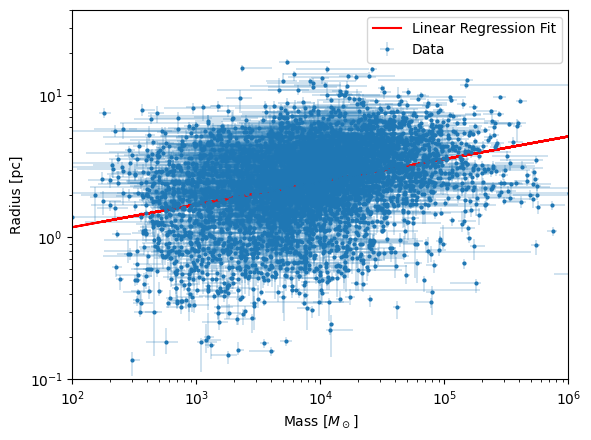

Slope: 0.15967010948221103
Intercept: -0.24738998100176218


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for linear regression
X = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Independent variable (log of mass)
y = np.log10(subset["r_eff_pc"])  # Dependent variable (log of radius)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the radii using the fitted model
y_pred = model.predict(X)

# Plot the data
fig, ax = plt.subplots()
ax.errorbar(
    x=subset["mass_msun"],
    y=subset["r_eff_pc"],
    fmt="o",
    markersize=2,
    lw=0.3,
    xerr=[subset["mass_msun_e-"], subset["mass_msun_e+"]],
    yerr=[subset["r_eff_pc_e-"], subset["r_eff_pc_e+"]],
    label="Data"
)

# Plot the regression line
ax.plot(subset["mass_msun"], 10**y_pred, color="red", label="Linear Regression Fit")

# Plot formatting
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e2, 1e6)
ax.set_ylim(0.1, 40)
ax.set_xlabel("Mass [$M_\odot$]")
ax.set_ylabel("Radius [pc]")
ax.legend()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

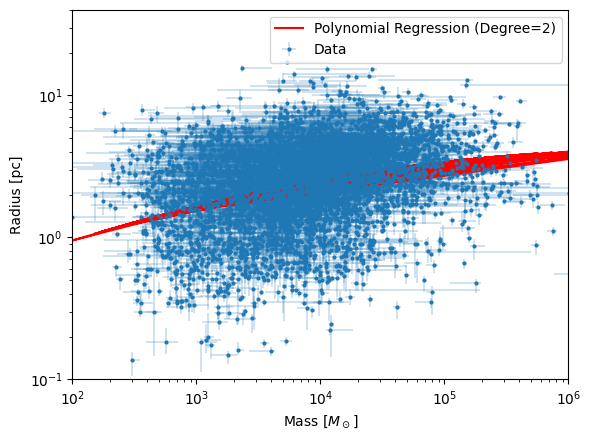

Coefficients: [ 0.          0.37735206 -0.02765743]
Intercept: -0.6653167308104682


In [ ]:
# Import necessary libraries
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for polynomial regression
X = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Independent variable (log of mass)
y = np.log10(subset["r_eff_pc"])  # Dependent variable (log of radius)

# Create a polynomial regression model (e.g., degree=2 for quadratic)
degree = 2  # You can change this to higher degrees if needed
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial regression model
model.fit(X, y)

# Predict the radii using the fitted model
y_pred = model.predict(X)

# Plot the data
fig, ax = plt.subplots()
ax.errorbar(
    x=subset["mass_msun"],
    y=subset["r_eff_pc"],
    fmt="o",
    markersize=2,
    lw=0.3,
    xerr=[subset["mass_msun_e-"], subset["mass_msun_e+"]],
    yerr=[subset["r_eff_pc_e-"], subset["r_eff_pc_e+"]],
    label="Data"
)

# Plot the polynomial regression predictions
ax.plot(subset["mass_msun"], 10**y_pred, color="red", label=f"Polynomial Regression (Degree={degree})")

# Plot formatting
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e2, 1e6)
ax.set_ylim(0.1, 40)
ax.set_xlabel("Mass [$M_\odot$]")
ax.set_ylabel("Radius [pc]")
ax.legend()
plt.show()

# Print the model coefficients
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

In [ ]:

# Total number of clusters in the filtered dataset
n_clusters = len(subset)
print(f"Total number of clusters (with reliable radius and mass): {n_clusters}")

# Age statistics - convert from years to Myr (divide by 1e6)
max_age_myr = np.max(subset["age_yr"]) / 1e6
min_age_myr = np.min(subset["age_yr"]) / 1e6
median_age_myr = np.median(subset["age_yr"]) / 1e6

print(f"\nAge statistics:")
print(f"Maximum age: {max_age_myr:.1f} Myr")
print(f"Minimum age: {min_age_myr:.1f} Myr")
print(f"Median age: {median_age_myr:.1f} Myr")

Total number of clusters (with reliable radius and mass): 5105

Age statistics:
Maximum age: 12000.0 Myr
Minimum age: 1.0 Myr
Median age: 40.0 Myr


<>:204: SyntaxWarning: invalid escape sequence '\o'
<>:325: SyntaxWarning: invalid escape sequence '\o'
<>:429: SyntaxWarning: invalid escape sequence '\o'
<>:204: SyntaxWarning: invalid escape sequence '\o'
<>:325: SyntaxWarning: invalid escape sequence '\o'
<>:429: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-661629688.py:204: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("Mass [$M_\odot$]")
/tmp/ipython-input-661629688.py:325: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("Mass [$M_\odot$]")
/tmp/ipython-input-661629688.py:429: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Mass [$M_\odot$]")


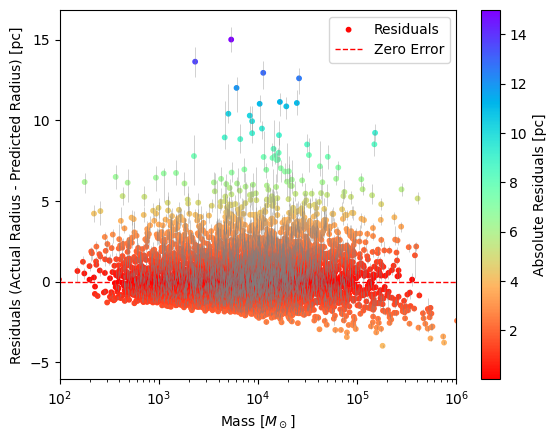

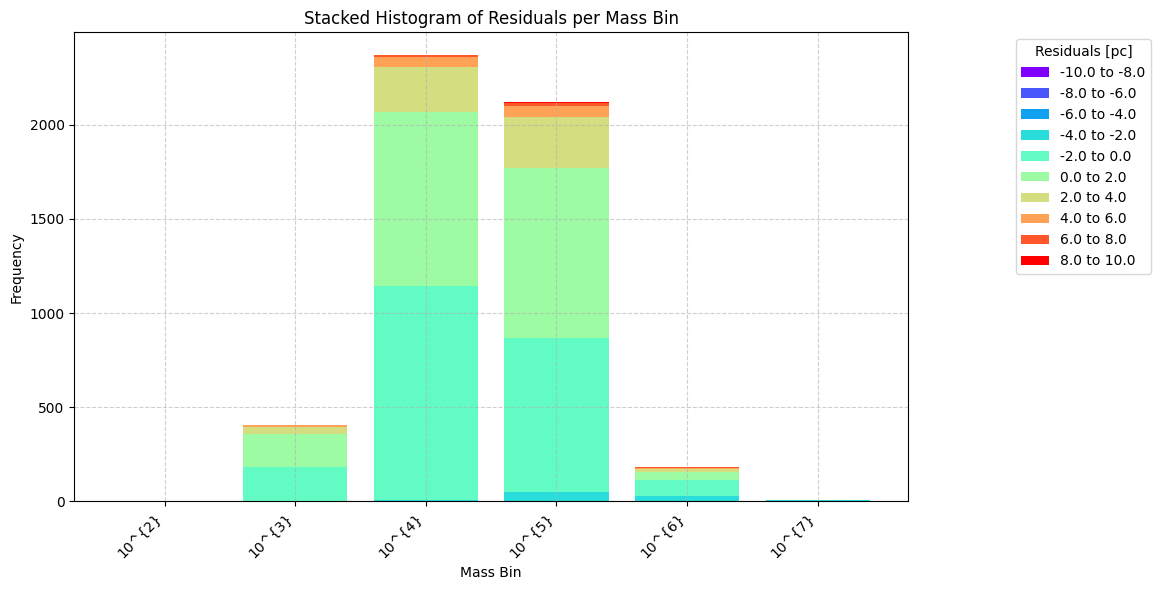

              10^{2} 10^{3} 10^{4} 10^{5} 10^{6} 10^{7}
-10.0 to -8.0      0      0      0      0      0      0
-8.0 to -6.0       0      0      0      0      0      0
-6.0 to -4.0       0      0      0      0      0      2
-4.0 to -2.0       0      0      7     50     26      5
-2.0 to 0.0        0    183   1139    817     85      2
0.0 to 2.0         1    174    920    904     47      0
2.0 to 4.0         0     39    242    272     16      0
4.0 to 6.0         0      8     50     55      5      0
6.0 to 8.0         0      4     11     19      1      0
8.0 to 10.0        0      0      4      4      2      0


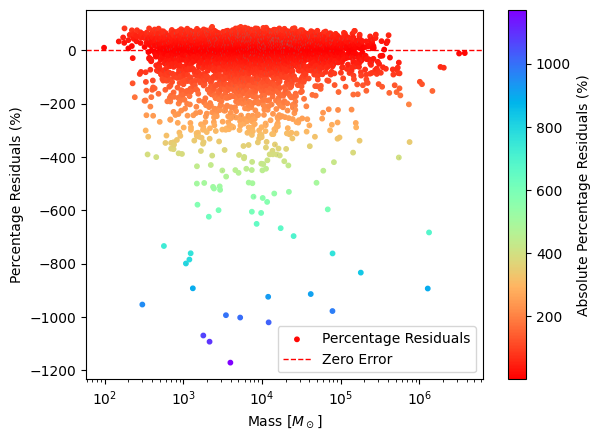

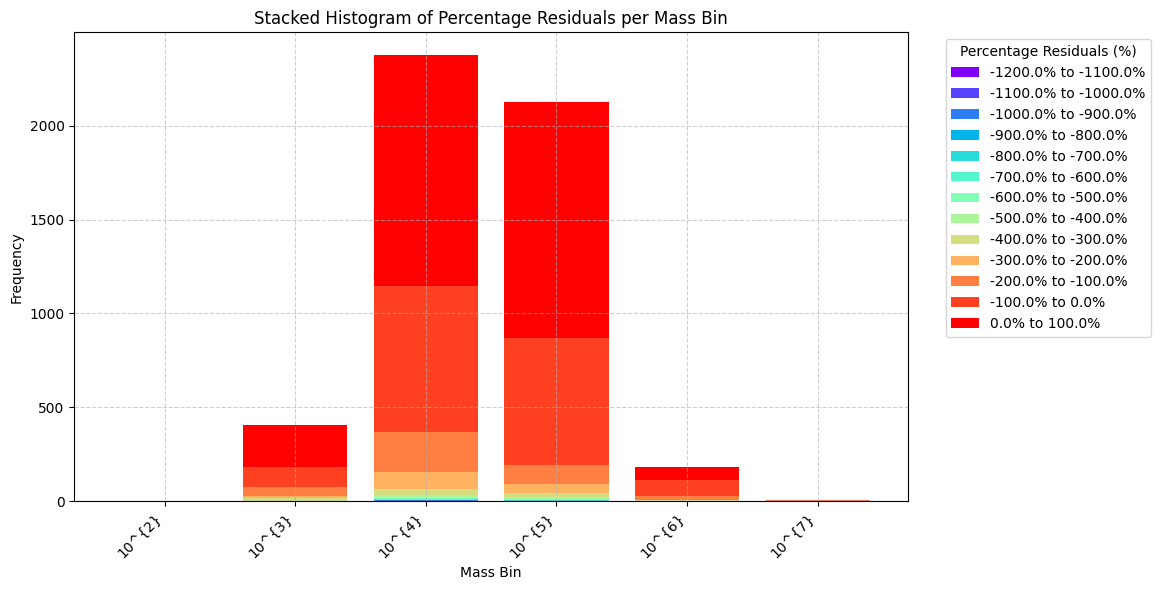

                     10^{2} 10^{3} 10^{4} 10^{5} 10^{6} 10^{7}
-1200.0% to -1100.0%      0      0      1      0      0      0
-1100.0% to -1000.0%      0      0      3      1      0      0
-1000.0% to -900.0%       0      1      1      3      0      0
-900.0% to -800.0%        0      0      1      0      1      1
-800.0% to -700.0%        0      1      3      1      0      0
-700.0% to -600.0%        0      0      4      2      0      1
-600.0% to -500.0%        0      0      7      5      0      0
-500.0% to -400.0%        0      1     15      9      1      0
-400.0% to -300.0%        0     15     28     25      3      0
-300.0% to -200.0%        0     11     91     48      4      0
-200.0% to -100.0%        0     46    214    101     18      3
-100.0% to 0.0%           0    108    778    672     84      4
0.0% to 100.0%            1    225   1232   1260     71      0


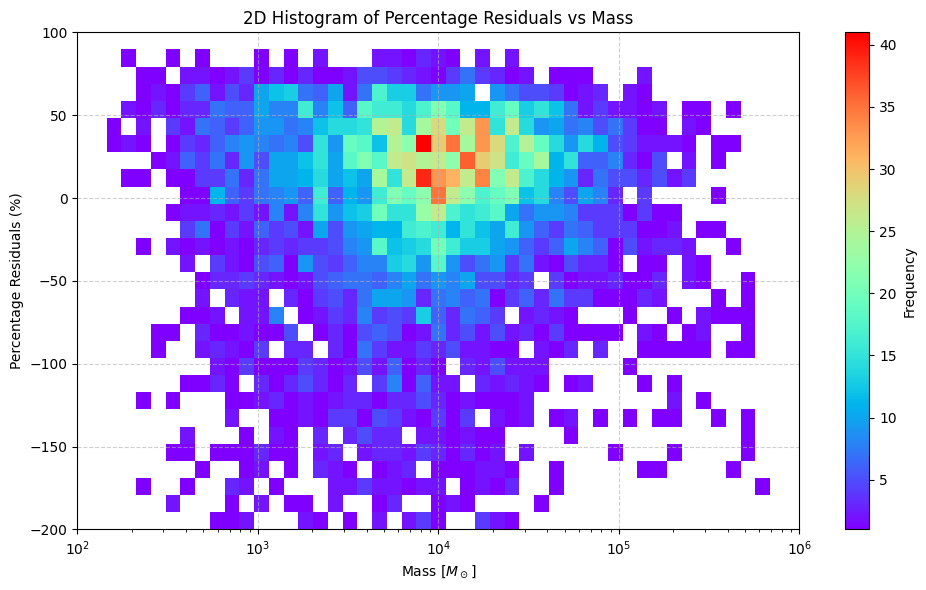

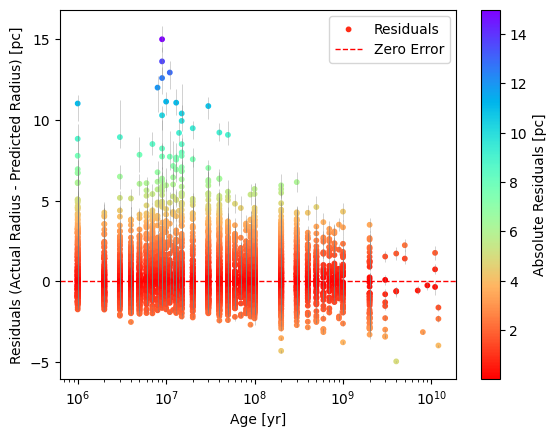

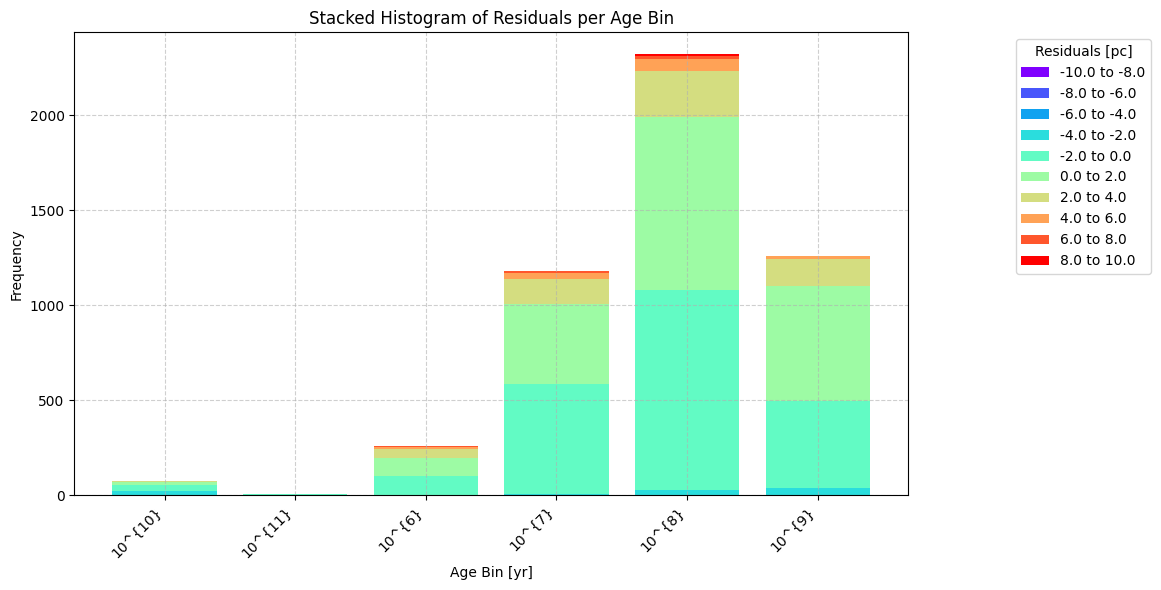

              10^{10} 10^{11} 10^{6} 10^{7} 10^{8} 10^{9}
-10.0 to -8.0       0       0      0      0      0      0
-8.0 to -6.0        0       0      0      0      0      0
-6.0 to -4.0        1       0      0      0      0      1
-4.0 to -2.0       22       2      0      4     24     36
-2.0 to 0.0        31       2     99    580   1054    460
0.0 to 2.0         13       2     97    420    913    601
2.0 to 4.0          6       0     44    132    241    146
4.0 to 6.0          0       0     11     32     63     12
6.0 to 8.0          0       0      6      9     19      1
8.0 to 10.0         0       0      1      3      6      0


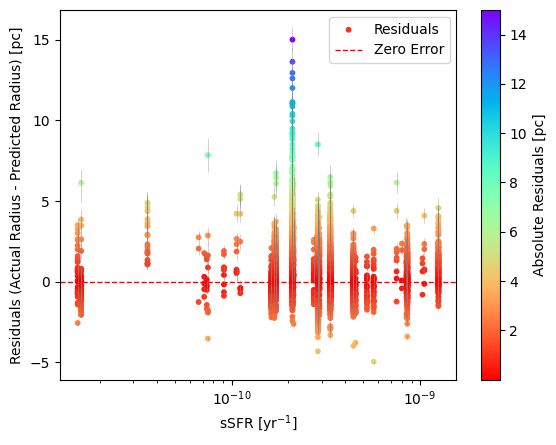

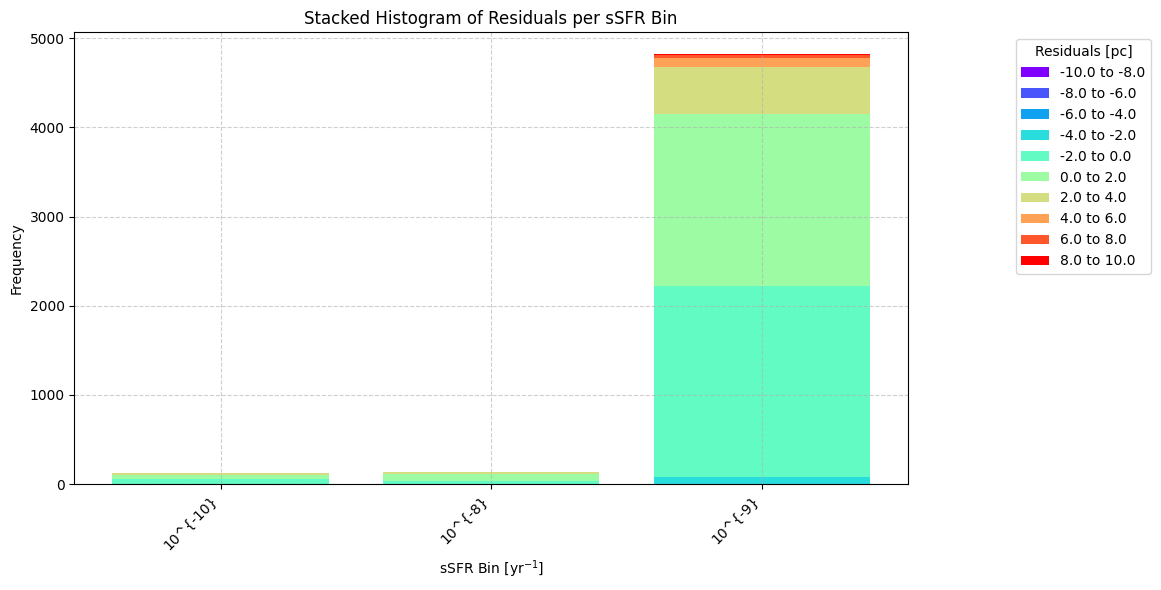

              10^{-10} 10^{-8} 10^{-9}
-10.0 to -8.0        0       0       0
-8.0 to -6.0         0       0       0
-6.0 to -4.0         0       0       2
-4.0 to -2.0         5       0      83
-2.0 to 0.0         53      33    2140
0.0 to 2.0          43      77    1926
2.0 to 4.0          20      26     523
4.0 to 6.0           5       4     109
6.0 to 8.0           2       0      33
8.0 to 10.0          0       0      10


In [ ]:
# Import necessary libraries
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for linear regression
# Independent variables: log of mass, log of sSFR, and log of age
X = np.column_stack((
    np.log10(subset["mass_msun"]),  # Log of mass
    np.log10(subset["galaxy_ssfr"]),  # Log of sSFR
    np.log10(subset["age_yr"])  # Log of age
))
y = np.log10(subset["r_eff_pc"])  # Dependent variable: log of radius

# Create a linear regression model
model = LinearRegression()

# Fit the linear regression model
model.fit(X, y)

# Predict the radii using the fitted model
y_pred = model.predict(X)


# # Plot the data
# fig, ax = plt.subplots()
# ax.errorbar(
#     x=subset["mass_msun"],
#     y=subset["r_eff_pc"],
#     fmt="o",
#     markersize=2,
#     lw=0.3,
#     xerr=[subset["mass_msun_e-"], subset["mass_msun_e+"]],
#     yerr=[subset["r_eff_pc_e-"], subset["r_eff_pc_e+"]],
#     label="Data"
# )

# # Plot the linear regression predictions
# ax.plot(subset["mass_msun"], 10**y_pred, color="red", label="Linear Regression Prediction")

# # Plot formatting
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim(1e2, 1e6)
# ax.set_ylim(0.1, 40)
# ax.set_xlabel("Mass [$M_\odot$]")
# ax.set_ylabel("Radius [pc]")
# ax.legend()
# plt.show()

# # Print the model coefficients and intercept
# coefficients = model.coef_
# intercept = model.intercept_
# print(f"Coefficients: {coefficients}")
# print(f"Intercept: {intercept}")

# # Calculate metrics
# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# n = len(y)  # Number of data points
# k = X.shape[1]  # Number of predictors (3 in your case)
# adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# # Print the metrics
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R^2): {r2}")
# print(f"Adjusted R-squared: {adjusted_r2}")

#============================ Sorted Linear Regression prediction ===============

# Sort the data by mass_msun
sorted_indices = np.argsort(subset["mass_msun"])
mass_sorted = subset["mass_msun"][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
r_eff_pc_sorted = subset["r_eff_pc"][sorted_indices]

# # Plot the data
# fig, ax = plt.subplots()
# ax.errorbar(
#     x=subset["mass_msun"],
#     y=subset["r_eff_pc"],
#     fmt="o",
#     markersize=2,
#     lw=0.3,
#     xerr=[subset["mass_msun_e-"], subset["mass_msun_e+"]],
#     yerr=[subset["r_eff_pc_e-"], subset["r_eff_pc_e+"]],
#     label="Data"
# )

# # Plot the linear regression predictions (sorted)
# ax.plot(mass_sorted, 10**y_pred_sorted, color="red", label=" Sorted Linear Regression Prediction")

# # Plot formatting
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim(1e2, 1e6)
# ax.set_ylim(0.1, 40)
# ax.set_xlabel("Mass [$M_\odot$]")
# ax.set_ylabel("Radius [pc]")
# ax.legend()
# plt.show()

#================== 3D visual =============================

# Add the predicted radius to the subset
subset["y_pred"] = 10**y_pred  # Convert back from log scale

# Calculate the residuals (errors)
subset["residuals"] = subset["r_eff_pc"] - subset["y_pred"]


import plotly.express as px
import pandas as pd

# Create a DataFrame for the data
df = pd.DataFrame({
    'Log Mass': np.log10(subset["mass_msun"]),  # Log of mass
    'Log sSFR': np.log10(subset["galaxy_ssfr"]),  # Log of sSFR
    'Log Age': np.log10(subset["age_yr"]),  # Log of age
    'Residuals': subset["residuals"]  # Residuals (actual radius - predicted radius)
})

# # Create an interactive 3D scatter plot
# fig = px.scatter_3d(
#     df,
#     x='Log Mass',
#     y='Log sSFR',
#     z='Log Age',
#     color='Residuals',  # Color by residuals
#     color_continuous_scale='plasma',  # Color scale
#     labels={
#         'Log Mass': 'Log Mass [$M_\odot$]',
#         'Log sSFR': 'Log sSFR [yr$^{-1}$]',
#         'Log Age': 'Log Age [yr]',
#         'Residuals': 'Residuals [pc]'
#     }
# )

# # Update layout for better visualization
# fig.update_layout(
#     scene=dict(
#         xaxis_title='Log Mass [$M_\odot$]',
#         yaxis_title='Log sSFR [yr$^{-1}$]',
#         zaxis_title='Log Age [yr]'
#     ),
#     coloraxis_colorbar=dict(title='Residuals [pc]')
# )

# # Show the plot
# fig.show()


#========================== Residual Plot ============

# Calculate the residuals (errors)
residuals = r_eff_pc_sorted - 10**y_pred_sorted

# Plot the residuals vs mass
fig, ax = plt.subplots()
scatter = ax.scatter(
    mass_sorted,
    residuals,
    s=10,
    c=np.abs(residuals),  # Color by absolute residuals
    cmap='rainbow_r',
    label="Residuals"
)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='red', linestyle='--', lw=1, label="Zero Error")

# Add error bars
ax.errorbar(
    mass_sorted,
    residuals,
    yerr=[subset["r_eff_pc_e-"][sorted_indices], subset["r_eff_pc_e+"][sorted_indices]],
    fmt='none',  # No markers, only error bars
    ecolor='gray',
    alpha=0.5,
    lw=0.5
)

# Plot formatting
ax.set_xscale("log")
ax.set_xlim(1e2, 1e6)
ax.set_xlabel("Mass [$M_\odot$]")
ax.set_ylabel("Residuals (Actual Radius - Predicted Radius) [pc]")
ax.legend()
plt.colorbar(scatter, label="Absolute Residuals [pc]")
plt.show()

#=========================  Mass histogram ===========


# Function to calculate Mass_bin (using ceiling)
def calculate_mass_bin(mass):
    if mass <= 0:
        return "Undefined"
    exponent = np.ceil(np.log10(mass))
    return f"10^{{{int(exponent)}}}"  # Format as 10^exponent

# Calculate Mass_bin for all masses in the subset
subset["Mass_bin"] = [calculate_mass_bin(mass) for mass in subset["mass_msun"]]


# Convert the subset table to a Pandas DataFrame
subset_df = subset.to_pandas()

# Define residual bins
residual_bins = np.linspace(-10, 10, 11)  # 10 bins for residuals from -10 to 10

# Group residuals by Mass_bin
mass_bin_groups = subset_df.groupby("Mass_bin")["residuals"]

# Create a stacked histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot
bottom = np.zeros(len(mass_bin_groups.groups))  # Initialize the bottom of the bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(residual_bins) - 1))  # Color map for residuals

# Plot each residual bin as a stack
for i in range(len(residual_bins) - 1):
    counts = []
    for mass_bin, group in mass_bin_groups:
        # Count the number of residuals in this bin
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        counts.append(count)
    ax.bar(
        mass_bin_groups.groups.keys(),  # Mass_bin labels (x-axis)
        counts,  # Frequency for each residual bin (y-axis)
        bottom=bottom,  # Stack the bars
        color=colors[i],  # Color for this residual bin
        label=f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"  # Label for the residual bin
    )
    bottom += counts  # Update the bottom for the next stack

# Plot formatting
ax.set_xlabel("Mass Bin")
ax.set_ylabel("Frequency")
ax.set_title("Stacked Histogram of Residuals per Mass Bin")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title="Residuals [pc]")  # Move legend outside the plot
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ======== tabular data =================
# Create a DataFrame to store the tabular data
tabular_data = pd.DataFrame(index=mass_bin_groups.groups.keys(), columns=[f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}" for i in range(len(residual_bins) - 1)])

# Fill the DataFrame with the frequency counts
for i in range(len(residual_bins) - 1):
    for mass_bin, group in mass_bin_groups:
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        tabular_data.loc[mass_bin, f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"] = count

# Transpose the tabular data (swap rows and columns)
transposed_tabular_data = tabular_data.transpose()

# Display the transposed tabular data
print(transposed_tabular_data)

#+++++++++++++++++++++

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Convert the subset table to a Pandas DataFrame (AFTER adding pct_residual)
subset_df = subset.to_pandas()

# Sort the data by mass_msun
sorted_indices_mass = np.argsort(subset["mass_msun"])
mass_sorted = subset["mass_msun"][sorted_indices_mass]
pct_residuals_mass_sorted = subset["pct_residual"][sorted_indices_mass]

# Plot the percentage residuals vs mass
fig, ax = plt.subplots()
scatter = ax.scatter(
    mass_sorted,
    pct_residuals_mass_sorted,
    s=10,
    c=np.abs(pct_residuals_mass_sorted),  # Color by absolute percentage residuals
    cmap='rainbow_r',
    label="Percentage Residuals"
)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='red', linestyle='--', lw=1, label="Zero Error")

# Add error bars
ax.errorbar(
    mass_sorted,
    pct_residuals_mass_sorted,
    yerr=[subset["r_eff_pc_e-"][sorted_indices_mass], subset["r_eff_pc_e+"][sorted_indices_mass]],
    fmt='none',  # No markers, only error bars
    ecolor='gray',
    alpha=0.5,
    lw=0.5
)

# Plot formatting
ax.set_xscale("log")
ax.set_xlabel("Mass [$M_\odot$]")
ax.set_ylabel("Percentage Residuals (%)")
ax.legend()
plt.colorbar(scatter, label="Absolute Percentage Residuals (%)")
plt.show()

# ===== pct residual vs mass histogram

# Define percentage residual bins
pct_residual_bins = np.linspace(-1200, 100, 14)  # 13 bins for percentage residuals from -1400% to 100%

# Group percentage residuals by Mass_bin
mass_bin_groups_pct = subset_df.groupby("Mass_bin")["pct_residual"]

# Create a stacked histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot
bottom = np.zeros(len(mass_bin_groups_pct.groups))  # Initialize the bottom of the bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(pct_residual_bins) - 1))  # Color map for percentage residuals

# Plot each percentage residual bin as a stack
for i in range(len(pct_residual_bins) - 1):
    counts = []
    for mass_bin, group in mass_bin_groups_pct:
        # Count the number of percentage residuals in this bin
        count = np.sum((group >= pct_residual_bins[i]) & (group < pct_residual_bins[i + 1]))
        counts.append(count)
    ax.bar(
        mass_bin_groups_pct.groups.keys(),  # Mass_bin labels (x-axis)
        counts,  # Frequency for each percentage residual bin (y-axis)
        bottom=bottom,  # Stack the bars
        color=colors[i],  # Color for this percentage residual bin
        label=f"{pct_residual_bins[i]:.1f}% to {pct_residual_bins[i+1]:.1f}%"  # Label for the percentage residual bin
    )
    bottom += counts  # Update the bottom for the next stack

# Plot formatting
ax.set_xlabel("Mass Bin")
ax.set_ylabel("Frequency")
ax.set_title("Stacked Histogram of Percentage Residuals per Mass Bin")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title="Percentage Residuals (%)")  # Move legend outside the plot
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#====== pct residuals mass tabular data

# Create a DataFrame to store the tabular data
tabular_data_mass_pct = pd.DataFrame(index=mass_bin_groups_pct.groups.keys(), columns=[f"{pct_residual_bins[i]:.1f}% to {pct_residual_bins[i+1]:.1f}%" for i in range(len(pct_residual_bins) - 1)])

# Fill the DataFrame with the frequency counts
for i in range(len(pct_residual_bins) - 1):
    for mass_bin, group in mass_bin_groups_pct:
        count = np.sum((group >= pct_residual_bins[i]) & (group < pct_residual_bins[i + 1]))
        tabular_data_mass_pct.loc[mass_bin, f"{pct_residual_bins[i]:.1f}% to {pct_residual_bins[i+1]:.1f}%"] = count

# Transpose the tabular data (swap rows and columns)
transposed_tabular_data_mass_pct = tabular_data_mass_pct.transpose()

# Display the transposed tabular data
print(transposed_tabular_data_mass_pct)

#======= 2D histogram ========
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Define mass and percentage residual data
mass_data = subset["mass_msun"]
pct_residual_data = subset["pct_residual"]

# Define bins for mass and percentage residuals
mass_bins = np.logspace(np.log10(1e2), np.log10(1e6), num=50)  # Logarithmic bins for mass
#pct_residual_bins = np.linspace(-1200, 100, 50)  # Linear bins for percentage residuals
pct_residual_bins = np.linspace(-200, 100, 30)  # Linear bins for percentage residuals


# Create the 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    mass_data,
    pct_residual_data,
    bins=[mass_bins, pct_residual_bins],
    cmap='rainbow',  # Color map
    cmin=1  # Ignore bins with counts less than 1
)

# Add a color bar
cbar = plt.colorbar(im)
cbar.set_label("Frequency")

# Add contour
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#plt.contour(X, Y, hist.T, colors='black', linewidths=0.5)

# Plot formatting
plt.xscale("log")  # Log scale for mass
plt.xlabel("Mass [$M_\odot$]")
plt.ylabel("Percentage Residuals (%)")
plt.title("2D Histogram of Percentage Residuals vs Mass")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

#++++++++++++++++++++++++++++++++++++++++++++++++++++
# ====================  Age residuals ============

# Sort the data by age_yr
sorted_indices_age = np.argsort(subset["age_yr"])
age_sorted = subset["age_yr"][sorted_indices_age]
residuals_age_sorted = subset["residuals"][sorted_indices_age]

# Plot the residuals vs age
fig, ax = plt.subplots()
scatter = ax.scatter(
    age_sorted,
    residuals_age_sorted,
    s=10,
    c=np.abs(residuals_age_sorted),  # Color by absolute residuals
    cmap='rainbow_r',
    label="Residuals"
)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='red', linestyle='--', lw=1, label="Zero Error")

# Add error bars
ax.errorbar(
    age_sorted,
    residuals_age_sorted,
    yerr=[subset["r_eff_pc_e-"][sorted_indices_age], subset["r_eff_pc_e+"][sorted_indices_age]],
    fmt='none',  # No markers, only error bars
    ecolor='gray',
    alpha=0.5,
    lw=0.5
)

# Plot formatting
ax.set_xscale("log")
ax.set_xlabel("Age [yr]")
ax.set_ylabel("Residuals (Actual Radius - Predicted Radius) [pc]")
ax.legend()
plt.colorbar(scatter, label="Absolute Residuals [pc]")
plt.show()

 #=== Age histogram ===

# Function to calculate Age_bin (using ceiling)
def calculate_age_bin(age):
    if age <= 0:
        return "Undefined"
    exponent = np.ceil(np.log10(age))
    return f"10^{{{int(exponent)}}}"  # Format as 10^exponent

# Calculate Age_bin for all ages in the subset
subset["Age_bin"] = [calculate_age_bin(age) for age in subset["age_yr"]]

# Convert the subset table to a Pandas DataFrame (AFTER adding Age_bin)
subset_df = subset.to_pandas()

# Group residuals by Age_bin
age_bin_groups = subset_df.groupby("Age_bin")["residuals"]

# Create a stacked histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot
bottom = np.zeros(len(age_bin_groups.groups))  # Initialize the bottom of the bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(residual_bins) - 1))  # Color map for residuals

# Plot each residual bin as a stack
for i in range(len(residual_bins) - 1):
    counts = []
    for age_bin, group in age_bin_groups:
        # Count the number of residuals in this bin
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        counts.append(count)
    ax.bar(
        age_bin_groups.groups.keys(),  # Age_bin labels (x-axis)
        counts,  # Frequency for each residual bin (y-axis)
        bottom=bottom,  # Stack the bars
        color=colors[i],  # Color for this residual bin
        label=f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"  # Label for the residual bin
    )
    bottom += counts  # Update the bottom for the next stack

# Plot formatting
ax.set_xlabel("Age Bin [yr]")
ax.set_ylabel("Frequency")
ax.set_title("Stacked Histogram of Residuals per Age Bin")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title="Residuals [pc]")  # Move legend outside the plot
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# === # Create a DataFrame to store the tabular data
tabular_data_age = pd.DataFrame(index=age_bin_groups.groups.keys(), columns=[f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}" for i in range(len(residual_bins) - 1)])

# Fill the DataFrame with the frequency counts
for i in range(len(residual_bins) - 1):
    for age_bin, group in age_bin_groups:
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        tabular_data_age.loc[age_bin, f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"] = count

# Transpose the tabular data (swap rows and columns)
transposed_tabular_data_age = tabular_data_age.transpose()

# Display the transposed tabular data
print(transposed_tabular_data_age)

#============ SSFR residuals plot  ==============
# Sort the data by galaxy_ssfr
sorted_indices_ssfr = np.argsort(subset["galaxy_ssfr"])
ssfr_sorted = subset["galaxy_ssfr"][sorted_indices_ssfr]
residuals_ssfr_sorted = subset["residuals"][sorted_indices_ssfr]

# Plot the residuals vs sSFR
fig, ax = plt.subplots()
scatter = ax.scatter(
    ssfr_sorted,
    residuals_ssfr_sorted,
    s=10,
    c=np.abs(residuals_ssfr_sorted),  # Color by absolute residuals
    cmap='rainbow_r',
    label="Residuals"
)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='red', linestyle='--', lw=1, label="Zero Error")

# Add error bars
ax.errorbar(
    ssfr_sorted,
    residuals_ssfr_sorted,
    yerr=[subset["r_eff_pc_e-"][sorted_indices_ssfr], subset["r_eff_pc_e+"][sorted_indices_ssfr]],
    fmt='none',  # No markers, only error bars
    ecolor='gray',
    alpha=0.5,
    lw=0.5
)

# Plot formatting
ax.set_xscale("log")
ax.set_xlabel("sSFR [yr$^{-1}$]")
ax.set_ylabel("Residuals (Actual Radius - Predicted Radius) [pc]")
ax.legend()
plt.colorbar(scatter, label="Absolute Residuals [pc]")
plt.show()

# ========= SSFR histogram ===================
# Function to calculate sSFR_bin (using ceiling)
def calculate_ssfr_bin(ssfr):
    if ssfr <= 0:
        return "Undefined"
    exponent = np.ceil(np.log10(ssfr))
    return f"10^{{{int(exponent)}}}"  # Format as 10^exponent


# Calculate sSFR_bin for all sSFRs in the subset
subset["sSFR_bin"] = [calculate_ssfr_bin(ssfr) for ssfr in subset["galaxy_ssfr"]]

# Convert the subset table to a Pandas DataFrame (AFTER adding SSFR_bin)
subset_df = subset.to_pandas()

# Group residuals by sSFR_bin
ssfr_bin_groups = subset_df.groupby("sSFR_bin")["residuals"]

# Create a stacked histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot
bottom = np.zeros(len(ssfr_bin_groups.groups))  # Initialize the bottom of the bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(residual_bins) - 1))  # Color map for residuals

# Plot each residual bin as a stack
for i in range(len(residual_bins) - 1):
    counts = []
    for ssfr_bin, group in ssfr_bin_groups:
        # Count the number of residuals in this bin
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        counts.append(count)
    ax.bar(
        ssfr_bin_groups.groups.keys(),  # sSFR_bin labels (x-axis)
        counts,  # Frequency for each residual bin (y-axis)
        bottom=bottom,  # Stack the bars
        color=colors[i],  # Color for this residual bin
        label=f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"  # Label for the residual bin
    )
    bottom += counts  # Update the bottom for the next stack

# Plot formatting
ax.set_xlabel("sSFR Bin [yr$^{-1}$]")
ax.set_ylabel("Frequency")
ax.set_title("Stacked Histogram of Residuals per sSFR Bin")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title="Residuals [pc]")  # Move legend outside the plot
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ========= ssfr tabular data ====================

# Create a DataFrame to store the tabular data
tabular_data_ssfr = pd.DataFrame(index=ssfr_bin_groups.groups.keys(), columns=[f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}" for i in range(len(residual_bins) - 1)])

# Fill the DataFrame with the frequency counts
for i in range(len(residual_bins) - 1):
    for ssfr_bin, group in ssfr_bin_groups:
        count = np.sum((group >= residual_bins[i]) & (group < residual_bins[i + 1]))
        tabular_data_ssfr.loc[ssfr_bin, f"{residual_bins[i]:.1f} to {residual_bins[i+1]:.1f}"] = count

# Transpose the tabular data (swap rows and columns)
transposed_tabular_data_ssfr = tabular_data_ssfr.transpose()

# Display the transposed tabular data
print(transposed_tabular_data_ssfr)



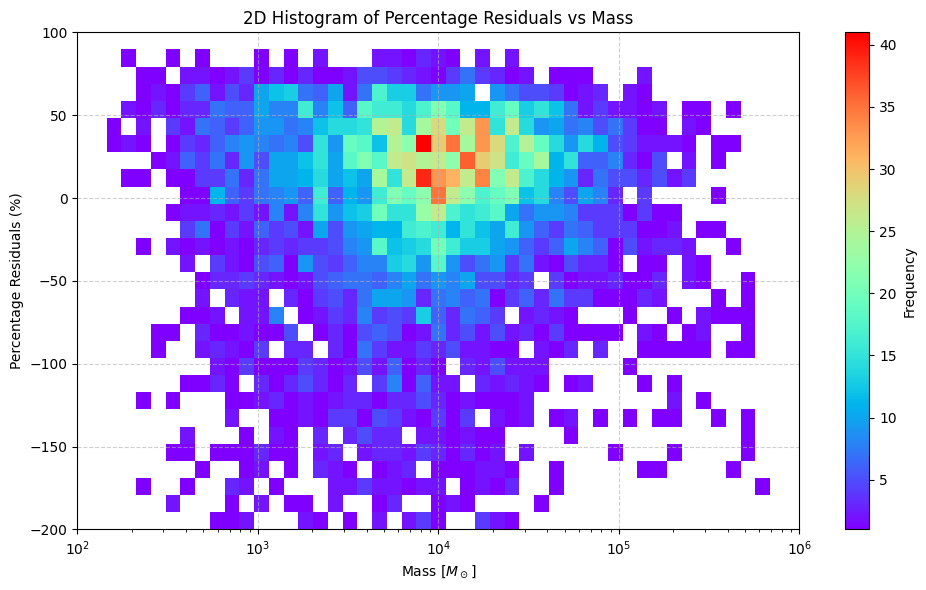

In [ ]:

#======= 2D histogram ========
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Define mass and percentage residual data
mass_data = subset["mass_msun"]
subset["r_eff_pc"]
pct_residual_data = subset["pct_residual"]

# Define bins for mass and percentage residuals
mass_bins = np.logspace(np.log10(1e-1), np.log10(1e2), num=30)  # Logarithmic bins for mass
#pct_residual_bins = np.linspace(-1200, 100, 50)  # Linear bins for percentage residuals
pct_residual_bins = np.linspace(-200, 100, 30)  # Linear bins for percentage residuals


# Create the 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    mass_data,
    pct_residual_data,
    bins=[mass_bins, pct_residual_bins],
    cmap='rainbow',  # Color map
    cmin=1  # Ignore bins with counts less than 1
)

# Add a color bar
cbar = plt.colorbar(im)
cbar.set_label("Frequency")

# Add contour
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#plt.contour(X, Y, hist.T, colors='black', linewidths=0.5)

# Plot formatting
plt.xscale("log")  # Log scale for mass
plt.xlabel("Mass [$M_\odot$]")
plt.ylabel("Percentage Residuals (%)")
plt.title("2D Histogram of Percentage Residuals vs Mass")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Convert the subset table to a Pandas DataFrame (AFTER adding pct_residual)
subset_df = subset.to_pandas()

# Sort the data by mass_msun
sorted_indices_mass = np.argsort(subset["mass_msun"])
mass_sorted = subset["mass_msun"][sorted_indices_mass]
pct_residuals_mass_sorted = subset["pct_residual"][sorted_indices_mass]


In [ ]:
#======= 2D histogram ========
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Define reff and percentage residual data
radius_data = subset["r_eff_pc"]

pct_residual_data = subset["pct_residual"]

# Define bins for radius and percentage residuals
radius_bins = np.logspace(np.log10(1e-1), np.log10(1e2), num=30)  # Logarithmic bins for radius
#pct_residual_bins = np.linspace(-1200, 100, 50)  # Linear bins for percentage residuals
pct_residual_bins = np.linspace(-200, 100, 30)  # Linear bins for percentage residuals


# Create the 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    radius_data,
    pct_residual_data,
    bins=[radius_bins, pct_residual_bins],
    cmap='rainbow',  # Color map
    cmin=1  # Ignore bins with counts less than 1
)

# Add a color bar
cbar = plt.colorbar(im)
cbar.set_label("Frequency")

# Add contour
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#plt.contour(X, Y, hist.T, colors='black', linewidths=0.5)

# Plot formatting
plt.xscale("log")  # Log scale for radius
plt.xlabel("reff [$M_\odot$]")
plt.ylabel("Percentage Residuals (%)")
plt.title("2D Histogram of Percentage Residuals vs Radius")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-4069860290.py:39: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("reff [$M_\odot$]")


KeyError: 'y_pred'

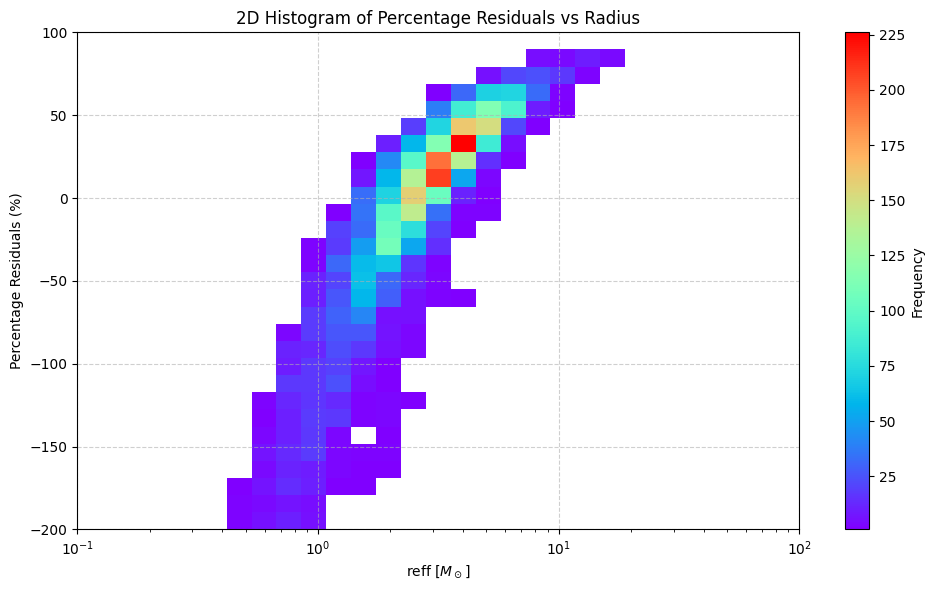

In [ ]:
#======= 2D histogram ========
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentage residuals
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred"]) / subset["r_eff_pc"]) * 100

# Define reff and percentage residual data
radius_data = subset["r_eff_pc"]

pct_residual_data = subset["pct_residual"]

# Define bins for radius and percentage residuals
radius_bins = np.logspace(np.log10(1e-1), np.log10(1e2), num=30)  # Logarithmic bins for radius
#pct_residual_bins = np.linspace(-1200, 100, 50)  # Linear bins for percentage residuals
pct_residual_bins = np.linspace(-200, 100, 30)  # Linear bins for percentage residuals


# Create the 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    radius_data,
    pct_residual_data,
    bins=[radius_bins, pct_residual_bins],
    cmap='rainbow',  # Color map
    cmin=1  # Ignore bins with counts less than 1
)

# Add a color bar
cbar = plt.colorbar(im)
cbar.set_label("Frequency")

# Add contour
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#plt.contour(X, Y, hist.T, colors='black', linewidths=0.5)

# Plot formatting
plt.xscale("log")  # Log scale for radius
plt.xlabel("reff [$M_\odot$]")
plt.ylabel("Percentage Residuals (%)")
plt.title("2D Histogram of Percentage Residuals vs Radius")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

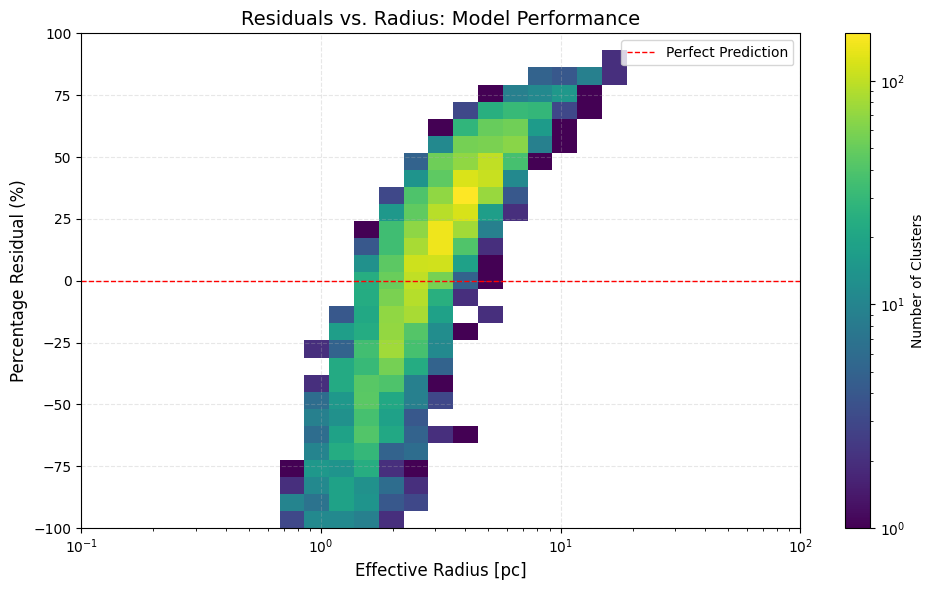

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # For log-scaled colorbar

# Calculate percentage residuals (ensure predictions are in linear scale)
subset["y_pred_linear"] = 10**y_pred  # Convert log10 predictions to linear
subset["pct_residual"] = ((subset["r_eff_pc"] - subset["y_pred_linear"]) / subset["r_eff_pc"]) * 100

# Define data
radius_data = subset["r_eff_pc"]
pct_residual_data = subset["pct_residual"]

# Define bins
radius_bins = np.logspace(np.log10(0.1), np.log10(100), num=30)  # 0.1 to 100 pc (log)
pct_residual_bins = np.linspace(-100, 100, 30)  # Focus on ±100% residuals

# Create 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    radius_data,
    pct_residual_data,
    bins=[radius_bins, pct_residual_bins],
    cmap='viridis',  # Better for colorblindness
    norm=LogNorm(),  # Log-scale for color intensity
    cmin=1  # Ignore empty bins
)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label("Number of Clusters")

# Add zero-residual reference line
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Perfect Prediction')

# Optional: Overlay contours (uncomment to use)
# X, Y = np.meshgrid((xedges[:-1] + xedges[1:]) / 2, (yedges[:-1] + yedges[1:]) / 2)
# plt.contour(X, Y, hist.T, levels=5, colors='white', linewidths=0.5)

# Formatting
plt.xscale('log')
plt.xlabel('Effective Radius [pc]', fontsize=12)
plt.ylabel('Percentage Residual (%)', fontsize=12)
plt.title('Residuals vs. Radius: Model Performance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

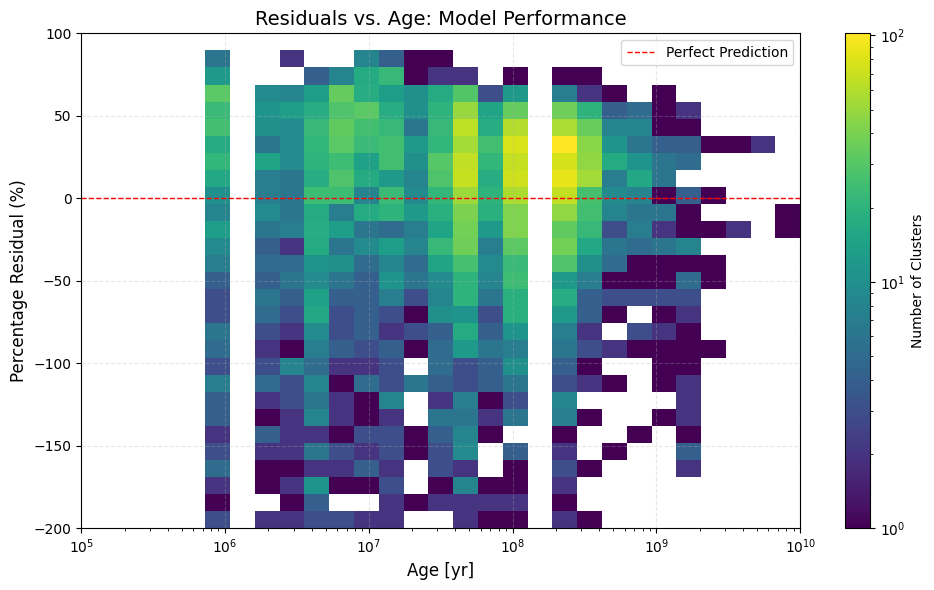

In [ ]:
# Define age data and bins (log-scaled for age)
age_data = subset["age_yr"]
age_bins = np.logspace(np.log10(1e5), np.log10(1e10), num=30)  # 1 Myr to 10 Gyr
pct_residual_bins = np.linspace(-200, 100, 30)  # Same residual range as before

# Create 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    age_data,
    pct_residual_data,
    bins=[age_bins, pct_residual_bins],
    cmap='viridis',
    norm=LogNorm(),
    cmin=1
)

# Formatting
plt.xscale('log')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Perfect Prediction')
cbar = plt.colorbar(im)
cbar.set_label("Number of Clusters")
plt.xlabel('Age [yr]', fontsize=12)
plt.ylabel('Percentage Residual (%)', fontsize=12)
plt.title('Residuals vs. Age: Model Performance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

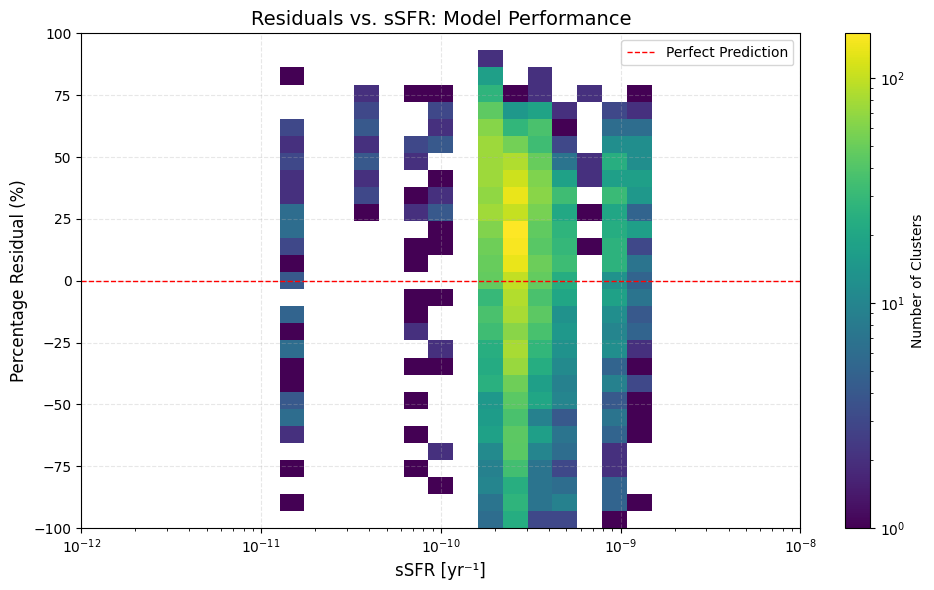

In [ ]:
# Define sSFR data and bins (log-scaled for sSFR)
ssfr_data = subset["galaxy_ssfr"]
ssfr_bins = np.logspace(np.log10(1e-12), np.log10(1e-8), num=30)  # 1e-12 to 1e-8 yr⁻¹
pct_residual_bins = np.linspace(-100, 100, 30)  # Same residual range

# Create 2D histogram
plt.figure(figsize=(10, 6))
hist, xedges, yedges, im = plt.hist2d(
    ssfr_data,
    pct_residual_data,
    bins=[ssfr_bins, pct_residual_bins],
    cmap='viridis',
    norm=LogNorm(),
    cmin=1
)

# Formatting
plt.xscale('log')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Perfect Prediction')
cbar = plt.colorbar(im)
cbar.set_label("Number of Clusters")
plt.xlabel('sSFR [yr⁻¹]', fontsize=12)
plt.ylabel('Percentage Residual (%)', fontsize=12)
plt.title('Residuals vs. sSFR: Model Performance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get coefficients and intercept
coefficients = model.coef_  # Slopes for [log10(Mass), log10(sSFR), log10(Age)]
intercept = model.intercept_  # Y-intercept

print("Coefficients (slopes):", coefficients)
print("Intercept:", intercept)

Coefficients (slopes): [0.15967011]
Intercept: -0.24738998100176218


In [ ]:
# Independent variables: log of mass, log of sSFR, and log of age
X = np.column_stack((
    np.log10(subset["mass_msun"]),  # Log of mass
    np.log10(subset["galaxy_ssfr"]),  # Log of sSFR
    np.log10(subset["age_yr"])  # Log of age
))
y = np.log10(subset["r_eff_pc"])  # Dependent variable: log of radius

# Create a linear regression model
model = LinearRegression()

# Fit the linear regression model
model.fit(X, y)

# Predict the radii using the fitted model
y_pred = model.predict(X)

coefficients = model.coef_  # Slopes for [log10(Mass), log10(sSFR), log10(Age)]
intercept = model.intercept_  # Y-intercept

print("Coefficients (slopes):", coefficients)
print("Intercept:", intercept)

Coefficients (slopes): [0.13059407 0.00021284 0.0384318 ]
Intercept: -0.422289150360375


In [ ]:
#Residual Standard Error RSE

# Calculate residuals (in log10 space)
residuals = y - y_pred

# Residual Standard Error (RSE)
RSE = np.sqrt(np.sum(residuals**2) / (len(y) - X.shape[1] - 1))
print(f"Residual Standard Error (RSE): {RSE:.4f}")

Residual Standard Error (RSE): 0.2706


In [ ]:
#Coefficient standard errors

# Covariance matrix of coefficients
cov_matrix = np.linalg.inv(X.T @ X) * (RSE**2)
coef_std_errors = np.sqrt(np.diag(cov_matrix))

# Print coefficient names and errors
predictors = ["log10(Mass)", "log10(sSFR)", "log10(Age)"]
for name, coef, se in zip(predictors, model.coef_, coef_std_errors):
    print(f"{name}: Coefficient = {coef:.4f} ± {se:.4f}")

log10(Mass): Coefficient = 0.1306 ± 0.0077
log10(sSFR): Coefficient = 0.0002 ± 0.0037
log10(Age): Coefficient = 0.0384 ± 0.0058


In [ ]:
#Confidence Intervals for predictions
# Example: Predict with uncertainty for a new cluster
new_data = np.array([[np.log10(1e4), np.log10(1e-10), np.log10(1e8)]])  # Mass, sSFR, Age
prediction = model.predict(new_data)

# Standard error of the prediction
prediction_se = np.sqrt(RSE**2 + new_data @ cov_matrix @ new_data.T)

print(f"Predicted log10(radius): {prediction[0]:.4f} ± {prediction_se[0, 0]:.4f}")

Predicted log10(radius): 0.4054 ± 0.2707


In [ ]:
#Explained variance R-squared

r2 = r2_score(y, y_pred)
print(f"R²: {r2:.4f} (Explained variance)")

R²: 0.1220 (Explained variance)


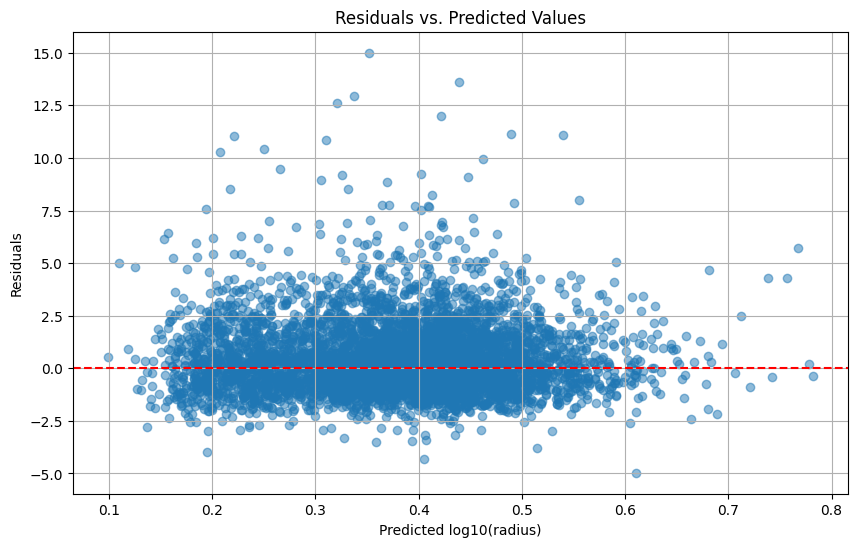

In [ ]:
#5. Visualization of Residuals
#Plot residuals to check for heteroscedasticity (systematic errors)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log10(radius)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()


Correlation Matrix:
              log10(Mass)  log10(sSFR)  log10(Age)
log10(Mass)     1.000000    -0.090413    0.590492
log10(sSFR)    -0.090413     1.000000    0.034242
log10(Age)      0.590492     0.034242    1.000000

Variance Inflation Factors (VIF):
      Predictor         VIF
0  log10(Mass)   64.673722
1  log10(sSFR)   87.802909
2   log10(Age)  133.508740


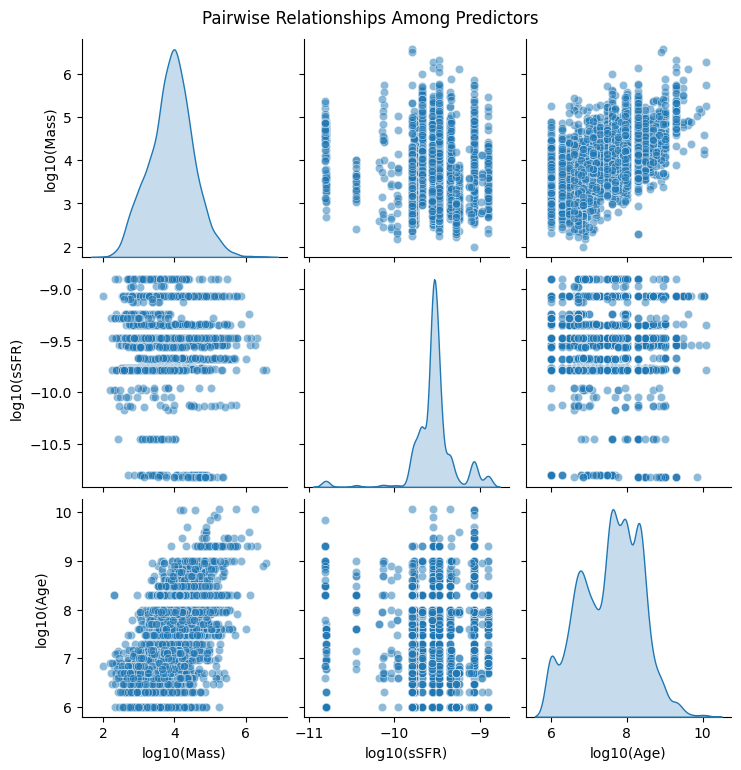

In [ ]:
#check for collinearity among your predictors (log10(mass), log10(sSFR), log10(age)) using correlation matrices and Variance Inflation Factor (VIF):

import numpy as np
import pandas as pd
from astropy import table

# Load your data (if not already loaded)
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")
subset = catalog[catalog["reliable_radius"] & catalog["reliable_mass"]]

# Prepare predictors (log10 space)
X = np.column_stack((
    np.log10(subset["mass_msun"]),
    np.log10(subset["galaxy_ssfr"]),
    np.log10(subset["age_yr"])
))

# Calculate correlation matrix
corr_matrix = np.corrcoef(X.T)  # Transpose to correlate predictors

# Display as a DataFrame for clarity
predictor_names = ["log10(Mass)", "log10(sSFR)", "log10(Age)"]
corr_df = pd.DataFrame(corr_matrix, index=predictor_names, columns=predictor_names)
print("Correlation Matrix:\n", corr_df)

#2. Variance Inflation Factor (VIF)
#VIF quantifies how much a predictor's variance is inflated due to collinearity:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Display VIF results
vif_df = pd.DataFrame({"Predictor": predictor_names, "VIF": vif})
print("\nVariance Inflation Factors (VIF):\n", vif_df)

#3. Visualize Collinearity with Pair Plots
import seaborn as sns

# Convert to DataFrame for plotting
X_df = pd.DataFrame(X, columns=predictor_names)

# Plot pairwise relationships
sns.pairplot(X_df, kind="scatter", diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Relationships Among Predictors", y=1.02)
plt.show()

Critical Findings
Mass-Age Correlation (r = 0.59)

Moderately strong positive correlation: More massive clusters tend to be older in your sample.

Extreme VIF Values

All VIFs >> 10 (rule-of-thumb threshold), with age showing worst inflation (VIF=133.5).

This means the variance of your coefficients is massively inflated due to predictor interdependence.

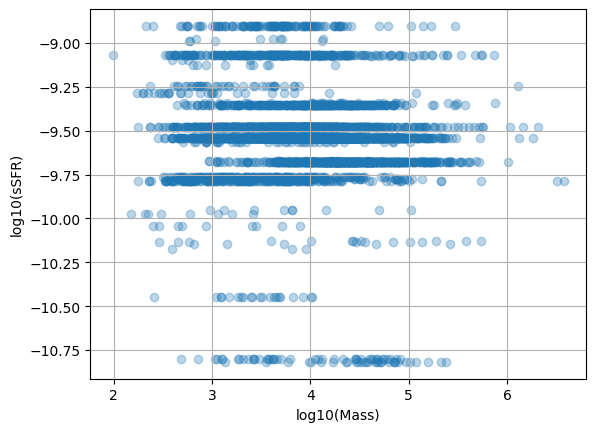

In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.log10(subset["mass_msun"]), np.log10(subset["galaxy_ssfr"]), alpha=0.3)
plt.xlabel("log10(Mass)"); plt.ylabel("log10(sSFR)"); plt.grid()

In [ ]:
# Option 1: Drop age (highest VIF)
X_reduced = np.column_stack((
    np.log10(subset["mass_msun"]),
    np.log10(subset["galaxy_ssfr"])
))

# Option 2: Drop mass (if age is theoretically more important)
# X_reduced = np.column_stack((np.log10(subset["age_yr"]), np.log10(subset["galaxy_ssfr"])))

# Re-check VIF on reduced set
vif_reduced = [variance_inflation_factor(X_reduced, i) for i in range(X_reduced.shape[1])]
print("VIF after dropping age:", dict(zip(["log10(Mass)", "log10(sSFR)"], vif_reduced)))

VIF after dropping age: {'log10(Mass)': np.float64(41.91378724467483), 'log10(sSFR)': np.float64(41.91378724467483)}


In [ ]:
# Mass-only model
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)
model_mass = LinearRegression().fit(X_mass, y)
y_pred_mass = model_mass.predict(X_mass)

# Metrics
r2_mass = r2_score(y, y_pred_mass)
rmse_mass = np.sqrt(mean_squared_error(y, y_pred_mass))
mae_mass = mean_absolute_error(y, y_pred_mass)

NameError: name 'np' is not defined

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

intercept = model_mass.intercept_
slope = model_mass.coef_[0]

print(f"\nMass-Only Regression Equation (Log Space):")
print(f"log10(r_eff) = {intercept:.3f} + {slope:.3f} · log10(Mass)")

print(f"\nMass-Only Power Law (Linear Space):")
print(f"r_eff = 10^{intercept:.3f} · Mass^{slope:.3f} ≈ {10**intercept:.3f} · Mass^{slope:.3f}")

# Original model (mass + sSFR + age)
y_pred_original = model.predict(X)  # X = [log10(mass), log10(sSFR), log10(age)]

# Metrics
r2_original = r2_score(y, y_pred_original)
rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
mae_original = mean_absolute_error(y, y_pred_original)

#for Mass-only model
# Mass-only model
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)
model_mass = LinearRegression().fit(X_mass, y)
y_pred_mass = model_mass.predict(X_mass)

# Metrics
r2_mass = r2_score(y, y_pred_mass)
rmse_mass = np.sqrt(mean_squared_error(y, y_pred_mass))
mae_mass = mean_absolute_error(y, y_pred_mass)

########
#Adjusted R² Calculation

n = len(y)
p_original = 3  # mass, sSFR, age
p_mass = 1       # mass only

adj_r2_original = 1 - (1 - r2_original) * (n - 1) / (n - p_original - 1)
adj_r2_mass = 1 - (1 - r2_mass) * (n - 1) / (n - p_mass - 1)

#(D) Cross-Validation (5-fold)
from sklearn.model_selection import cross_val_score

# Original model
cv_original = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

# Mass-only model
cv_mass = cross_val_score(model_mass, X_mass, y, cv=5, scoring='r2').mean()

# Print comparison table
print("\nModel Comparison Results")
print("-" * 40)
print(f"{'Metric':<15}{'Original Model':<20}{'Mass-Only Model':<20}")
print("-" * 40)
print(f"{'R²':<15}{r2_original:.3f}{'':<17}{r2_mass:.3f}")
print(f"{'Adjusted R²':<15}{adj_r2_original:.3f}{'':<17}{adj_r2_mass:.3f}")
print(f"{'RMSE':<15}{rmse_original:.3f}{'':<17}{rmse_mass:.3f}")
print(f"{'MAE':<15}{mae_original:.3f}{'':<17}{mae_mass:.3f}")
print(f"{'CV R² (5-fold)':<15}{cv_original:.3f}{'':<17}{cv_mass:.3f}")
print("-" * 40)

# Add conclusion
if adj_r2_mass >= adj_r2_original:
    print("Conclusion: Mass-only model performs equally well or better (higher adjusted R²)")
else:
    print("Conclusion: Original model explains more variance (but verify if the difference is significant)")

NameError: name 'model_mass' is not defined

In [ ]:
import pandas as pd
results = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'RMSE', 'MAE', 'CV R²'],
    'Original Model': [r2_original, adj_r2_original, rmse_original, mae_original, cv_original],
    'Mass-Only Model': [r2_mass, adj_r2_mass, rmse_mass, mae_mass, cv_mass]
})
print(results.to_markdown(index=False))

| Metric      |   Original Model |   Mass-Only Model |
|:------------|-----------------:|------------------:|
| R²          |        0.121999  |         0.114876  |
| Adjusted R² |        0.121482  |         0.114702  |
| RMSE        |        0.270536  |         0.271631  |
| MAE         |        0.208983  |         0.210577  |
| CV R²       |       -0.0168801 |         0.0280603 |


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Original model (mass + sSFR + age)
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Original Model CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Mass-only model
model_mass = LinearRegression()
cv_scores_mass = cross_val_score(model_mass, X_mass, y, cv=5, scoring='r2')
print(f"Mass-Only CV R²: {cv_scores_mass.mean():.3f} ± {cv_scores_mass.std():.3f}")

Original Model CV R²: -0.017 ± 0.159
Mass-Only CV R²: 0.028 ± 0.078


In [ ]:
from sklearn.feature_selection import f_regression

# F-test for added predictors
_, pvals = f_regression(X, y)  # p-values for each predictor
print("p-values (mass, sSFR, age):", pvals)

p-values (mass, sSFR, age): [1.98907841e-137 1.28178773e-001 7.35933588e-085]


In [ ]:
import numpy as np
from scipy.stats import f

# Assuming you already have:
# - X_multi (log10(mass), log10(sSFR), log10(age)
# - X_mass (log10(mass) only
# - y (log10(r_eff))

# Fit models
model_multi = LinearRegression().fit(X, y)
model_mass = LinearRegression().fit(X_mass, y)

# Calculate Residual Sum of Squares (RSS)
rss_multi = np.sum((y - model_multi.predict(X)) ** 2)
rss_mass = np.sum((y - model_mass.predict(X_mass)) ** 2)

# Degrees of freedom
n = len(y)
p_multi = 3  # Mass, sSFR, Age
p_mass = 1    # Mass only

# F-statistic
f_stat = ((rss_mass - rss_multi) / (p_multi - p_mass)) / (rss_multi / (n - p_multi - 1))

# p-value
p_value = 1 - f.cdf(f_stat, dfn=(p_multi - p_mass), dfd=(n - p_multi - 1))

print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")

F-statistic: 20.692, p-value: 0.0000


In [ ]:
def print_model_conclusion():
    # Your data
    metrics = {
        "R²": {"Original": 0.122, "Mass-Only": 0.115},
        "Adjusted R²": {"Original": 0.121, "Mass-Only": 0.115},
        "RMSE": {"Original": 0.271, "Mass-Only": 0.272},
        "MAE": {"Original": 0.209, "Mass-Only": 0.211},
        "CV R² (5-fold)": {"Original": -0.017, "Mass-Only": 0.028}
    }
    p_values = [1.98e-137, 0.128, 7.36e-85]  # Mass, sSFR, Age

    print("\n" + "="*80)
    print("REVISED MODEL COMPARISON CONCLUSION")
    print("="*80)
    print(f"• F-test: Significant (F = 20.692, p ≈ 0.000)")
    print(f"• Key predictors: Mass (p ≈ 0), Age (p ≈ 0), sSFR (p = 0.128)")

    print("\n• Performance Comparison:")
    print(f"  - ΔAdjusted R²: {metrics['Adjusted R²']['Original'] - metrics['Adjusted R²']['Mass-Only']:.3f} (tiny)")
    print(f"  - CV R²: Original = {metrics['CV R² (5-fold)']['Original']:.3f}, Mass-Only = {metrics['CV R² (5-fold)']['Mass-Only']:.3f}")

    print("\nRECOMMENDATION:")
    if metrics['CV R² (5-fold)']['Original'] > metrics['CV R² (5-fold)']['Mass-Only']:
        print("  Use the MULTIVARIATE MODEL (significant F-test and better CV performance).")
    else:
        print("  Use the MASS-ONLY MODEL (despite significant F-test, it generalizes better).")
    print("="*80)

print_model_conclusion()


REVISED MODEL COMPARISON CONCLUSION
• F-test: Significant (F = 20.692, p ≈ 0.000)
• Key predictors: Mass (p ≈ 0), Age (p ≈ 0), sSFR (p = 0.128)

• Performance Comparison:
  - ΔAdjusted R²: 0.006 (tiny)
  - CV R²: Original = -0.017, Mass-Only = 0.028

RECOMMENDATION:
  Use the MASS-ONLY MODEL (despite significant F-test, it generalizes better).


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X, y, cv=5, scoring='r2')
print(f"CV R²: {scores['test_score'].mean():.3f}")

CV R²: -0.017


In [ ]:
# Code to compare mass vs. mass+age
from sklearn.feature_selection import f_regression

# Model 1: Mass only
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)
f_mass, p_mass = f_regression(X_mass, y)  # Will match f_regression's mass p-value
print(f_mass, p_mass)

# Model 2: Mass + age
X_mass_age = np.column_stack((np.log10(subset["mass_msun"]), np.log10(subset["age_yr"])))
_, pvals = f_regression(X_mass_age, y)  # New p-values for mass+age together
print("p-values (mass, age):", pvals)

[662.29177373] [1.98907841e-137]
p-values (mass, age): [1.98907841e-137 7.35933588e-085]


In [ ]:
#Mass and Age model
# Create a linear regression model
model2 = LinearRegression()

# Fit the linear regression model
model2.fit(X_mass_age, y)

# Predict the radii using the fitted model
y2_pred = model2.predict(X_mass_age)

coefficients = model2.coef_  # Slopes for [log10(Mass), log10(sSFR), log10(Age)]
intercept = model2.intercept_  # Y-intercept

print("Coefficients2 (slopes):", coefficients)
print("Intercept2:", intercept)

Coefficients2 (slopes): [0.130579   0.03844111]
Intercept2: -0.4243297866295835


In [ ]:
#Residual Standard Error RSE

# Calculate residuals (in log10 space)
residuals = y - y2_pred

# Residual Standard Error (RSE)
RSE = np.sqrt(np.sum(residuals**2) / (len(y) - X.shape[1] - 1))
print(f"Residual Standard Error (RSE): {RSE:.4f}")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS  # For adjusted R²

# Prepare data
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)
X_mass_age = np.column_stack((np.log10(subset["mass_msun"]), np.log10(subset["age_yr"])))
y = np.log10(subset["r_eff_pc"])

# Initialize models
model_mass = LinearRegression()
model_mass_age = LinearRegression()

# Fit models
model_mass.fit(X_mass, y)
model_mass_age.fit(X_mass_age, y)

# --- Metric Calculations ---

def calculate_metrics(model, X, y, model_name):
    # Predictions
    y_pred = model.predict(X)

    # R²
    r2 = r2_score(y, y_pred)

    # Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # MAE
    mae = mean_absolute_error(y, y_pred)

    # 5-fold CV R²
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

    return {
        'Model': model_name,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV R² (5-fold)': cv_r2
    }

# Calculate for both models
metrics_mass = calculate_metrics(model_mass, X_mass, y, "Mass-only")
metrics_mass_age = calculate_metrics(model_mass_age, X_mass_age, y, "Mass+Age")

# --- Print Results ---
print("\nModel Comparison Results")
print("=" * 60)
print(f"{'Metric':<20}{'Mass-only':<15}{'Mass+Age':<15}")
print("=" * 60)
for metric in ['R²', 'Adjusted R²', 'RMSE', 'MAE', 'CV R² (5-fold)']:
    print(f"{metric:<20}{metrics_mass[metric]:<15.3f}{metrics_mass_age[metric]:<15.3f}")
print("=" * 60)

# --- Partial F-test (to check if age adds value) ---
ssr_mass = np.sum((y - model_mass.predict(X_mass)) ** 2)
ssr_mass_age = np.sum((y - model_mass_age.predict(X_mass_age)) ** 2)
n = len(y)
f_stat = ((ssr_mass - ssr_mass_age) / 1) / (ssr_mass_age / (n - 3))  # 1=added param, 3=total params
p_value = 1 - f.cdf(f_stat, 1, n - 3)
print(f"\nPartial F-test for adding Age to Mass-only model: p = {p_value:.4f}")


Model Comparison Results
Metric              Mass-only      Mass+Age       
R²                  0.115          0.122          
Adjusted R²         0.115          0.122          
RMSE                0.272          0.271          
MAE                 0.211          0.209          
CV R² (5-fold)      0.028          0.008          

Partial F-test for adding Age to Mass-only model: p = 0.0000


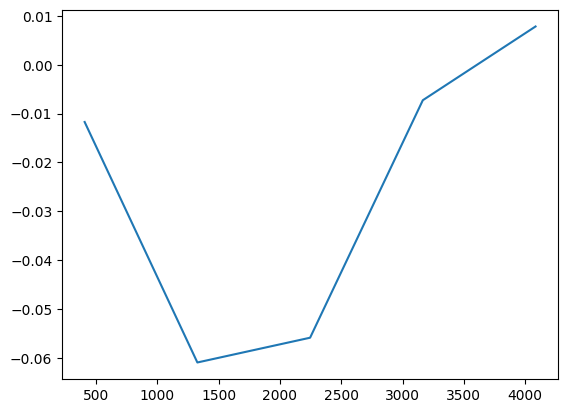

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model_mass_age, X_mass_age, y, cv=5
)
plt.plot(train_sizes, test_scores.mean(axis=1), label='Mass+Age')

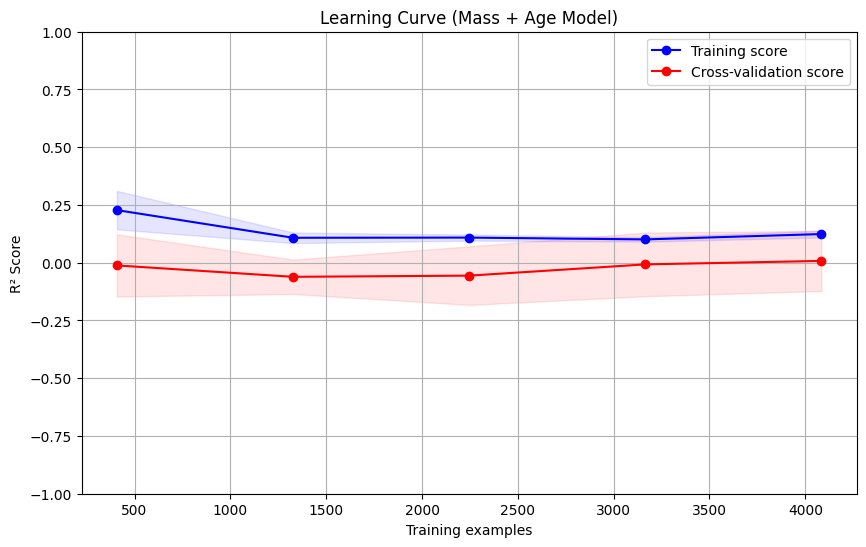

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model_mass_age,  # Your fitted model (mass + age)
    X_mass_age,      # Features: log10(mass) and log10(age)
    y,               # Target: log10(r_eff)
    cv=5,            # 5-fold cross-validation
    scoring='r2',    # Use R² score (default)
    n_jobs=-1        # Use all CPU cores
)

# Calculate mean and std of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')

# Add shaded areas for standard deviation
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color='red')

# Format plot
plt.title('Learning Curve (Mass + Age Model)')
plt.xlabel('Training examples')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(-1, 1)  # R² ranges from -∞ to 1, but we cap for visualization
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import f


# Create a linear regression model
model = LinearRegression()

# Fit the linear regression model
model.fit(X_mass, y)

# Predict the radii using the fitted model
y_pred = model.predict(X_mass)

# Create a linear regression model
model2 = LinearRegression()

# Fit the linear regression model
model2.fit(X, y)
# Predict the radii using the fitted model
y2_pred = model2.predict(X)


# 1. Prepare models
models = {
    "Linear Regression (Mass only)": model,
    "Linear Regression (Mass+sSFR+Age)": model2,
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# 2. Evaluation metrics
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Fit models that haven't been fit yet
    if name in ["Random Forest", "XGBoost"]:
        model.fit(X, y)
        y_pred = model.predict(X)
    elif name == "Linear Regression (Mass only)":
        y_pred = y_pred  # already predicted
    else:
        y_pred = y2_pred  # already predicted

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    mse = mean_squared_error(y, y_pred)

    # Cross-validated R2
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)
    cv_r2_std = np.std(cv_scores)

    results[name] = {
        'R2': r2,
        'Adjusted R2': adj_r2,
        'MSE': mse,
        'CV R2 (5-fold) mean': cv_r2_mean,
        'CV R2 (5-fold) std': cv_r2_std
    }

# Convert results to a table for easy viewing
results_table = table.Table(
    names=['Model', 'R2', 'Adjusted R2', 'MSE', 'CV R2 (5-fold) mean', 'CV R2 (5-fold) std'],
    dtype=['S30', 'f4', 'f4', 'f4', 'f4', 'f4']
)

for name, metrics in results.items():
    results_table.add_row([
        name,
        metrics['R2'],
        metrics['Adjusted R2'],
        metrics['MSE'],
        metrics['CV R2 (5-fold) mean'],
        metrics['CV R2 (5-fold) std']
    ])

print(results_table)

# 3. Partial F-test between linear models (only applicable to linear regression models)
def partial_f_test(model_full, model_reduced, X_full, X_reduced, y):
    n = len(y)
    p_full = X_full.shape[1]
    p_reduced = X_reduced.shape[1]

    # Calculate SSE for both models
    y_pred_full = model_full.predict(X_full)
    y_pred_reduced = model_reduced.predict(X_reduced)

    sse_full = np.sum((y - y_pred_full)**2)
    sse_reduced = np.sum((y - y_pred_reduced)**2)

    # Calculate F-statistic
    numerator = (sse_reduced - sse_full) / (p_full - p_reduced)
    denominator = sse_full / (n - p_full)
    f_stat = numerator / denominator

    # Calculate p-value
    p_value = 1 - f.cdf(f_stat, p_full - p_reduced, n - p_full)

    return f_stat, p_value

# Prepare data for partial F-test
X_reduced = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Reduced model (only mass)
X_full = np.column_stack((  # Full model (mass + sSFR + age)
    np.log10(subset["mass_msun"]),
    np.log10(subset["galaxy_ssfr"]),
    np.log10(subset["age_yr"])
))

# Create new linear regression models for clarity
model_reduced = LinearRegression().fit(X_reduced, y)
model_full = LinearRegression().fit(X_full, y)

f_stat, p_value = partial_f_test(model_full, model_reduced, X_full, X_reduced, y)
print(f"\nPartial F-test between linear models:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).")
else:
    print("The full model does not provide statistically significant better fit than the reduced model.")

              Model                    R2     ... CV R2 (5-fold) std
--------------------------------- ----------- ... ------------------
    Linear Regression (Mass only) 0.114875674 ...        0.011274547
Linear Regression (Mass+sSFR+Age) 0.114875674 ...        0.011274547
                    Random Forest   0.7290199 ...        0.045729496
                          XGBoost  0.17585003 ...          0.0140362

Partial F-test between linear models:
F-statistic: 20.6959
p-value: 1.1173e-09
The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import f

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for linear regression
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Independent variable (log of mass)
y = np.log10(subset["r_eff_pc"])  # Dependent variable (log of radius)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_mass, y)

# Predict the radii using the fitted model
y_pred = model.predict(X_mass)

# Prepare the data for multivariate linear regression
X = np.column_stack((
    np.log10(subset["mass_msun"]),  # Log of mass
    np.log10(subset["galaxy_ssfr"]),  # Log of sSFR
    np.log10(subset["age_yr"])  # Log of age
))

# Create and fit the multivariate linear regression model
model2 = LinearRegression()
model2.fit(X, y)

# Predict the radii using the fitted model
y2_pred = model2.predict(X)

# Prepare models dictionary
models = {
    "Linear Regression (Mass only)": model,
    "Linear Regression (Mass+sSFR+Age)": model2,
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluation metrics
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Fit models that haven't been fit yet
    if name in ["Random Forest", "XGBoost"]:
        model.fit(X, y)
        y_pred = model.predict(X)
    elif name == "Linear Regression (Mass only)":
        y_pred = y_pred  # already predicted
    else:
        y_pred = y2_pred  # already predicted

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    mse = mean_squared_error(y, y_pred)

    # Cross-validated R2
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)
    cv_r2_std = np.std(cv_scores)

    results[name] = {
        'R2': r2,
        'Adjusted R2': adj_r2,
        'MSE': mse,
        'CV R2 (5-fold) mean': cv_r2_mean,
        'CV R2 (5-fold) std': cv_r2_std
    }

# Create and display the results table with proper formatting
results_table = table.Table(
    names=['Model', 'R²', 'Adj. R²', 'MSE', 'CV R² (mean)', 'CV R² (std)'],
    dtype=['S40', 'f4', 'f4', 'f4', 'f4', 'f4']
)

for name, metrics in results.items():
    results_table.add_row([
        name,
        metrics['R2'],
        metrics['Adjusted R2'],
        metrics['MSE'],
        metrics['CV R2 (5-fold) mean'],
        metrics['CV R2 (5-fold) std']
    ])

# Set display options to show full table
table.conf.max_lines = -1  # Show all rows
table.conf.max_width = -1  # Show all columns without truncation

# Print the table
results_table.pprint_all()

# Partial F-test between linear models
def partial_f_test(model_full, model_reduced, X_full, X_reduced, y):
    n = len(y)
    p_full = X_full.shape[1]
    p_reduced = X_reduced.shape[1]

    y_pred_full = model_full.predict(X_full)
    y_pred_reduced = model_reduced.predict(X_reduced)

    sse_full = np.sum((y - y_pred_full)**2)
    sse_reduced = np.sum((y - y_pred_reduced)**2)

    numerator = (sse_reduced - sse_full) / (p_full - p_reduced)
    denominator = sse_full / (n - p_full)
    f_stat = numerator / denominator

    p_value = 1 - f.cdf(f_stat, p_full - p_reduced, n - p_full)

    return f_stat, p_value

# Prepare data for partial F-test
X_reduced = np.log10(subset["mass_msun"]).reshape(-1, 1)
model_reduced = LinearRegression().fit(X_reduced, y)
model_full = model2

f_stat, p_value = partial_f_test(model_full, model_reduced, X, X_reduced, y)

print("\nPartial F-test results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")
if p_value < 0.05:
    print("The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).")
else:
    print("The full model does not provide statistically significant better fit than the reduced model.")

              Model                    R²       Adj. R²       MSE     CV R² (mean) CV R² (std)
--------------------------------- ----------- ----------- ----------- ------------ -----------
    Linear Regression (Mass only) 0.114875674  0.11435512 0.073783636  0.118310645  0.01001761
Linear Regression (Mass+sSFR+Age) 0.121998765 0.121482395  0.07318986  0.118310645  0.01001761
                    Random Forest   0.8859253   0.8858582 0.009509225   0.18231533 0.028295267
                          XGBoost   0.6678038  0.66760844  0.02769175   0.22331952 0.024677968

Partial F-test results:
F-statistic: 20.6959
p-value: 1.1173e-09
The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import f
from math import sqrt

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for linear regression
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Independent variable (log of mass)
y = np.log10(subset["r_eff_pc"])  # Dependent variable (log of radius)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_mass, y)

# Predict the radii using the fitted model
y_pred = model.predict(X_mass)

# Prepare the data for multivariate linear regression
X = np.column_stack((
    np.log10(subset["mass_msun"]),  # Log of mass
    np.log10(subset["galaxy_ssfr"]),  # Log of sSFR
    np.log10(subset["age_yr"])  # Log of age
))

# Create and fit the multivariate linear regression model
model2 = LinearRegression()
model2.fit(X, y)

# Predict the radii using the fitted model
y2_pred = model2.predict(X)

# Prepare models dictionary
models = {
    "Linear Regression (Mass only)": model,
    "Linear Regression (Mass+sSFR+Age)": model2,
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluation metrics
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Fit models that haven't been fit yet
    if name in ["Random Forest", "XGBoost"]:
        model.fit(X, y)
        y_pred = model.predict(X)
    elif name == "Linear Regression (Mass only)":
        y_pred = y_pred  # already predicted
    else:
        y_pred = y2_pred  # already predicted

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    mse = mean_squared_error(y, y_pred)
    rmse = sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y, y_pred)  # Calculate MAE

    # Cross-validated R2
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)
    cv_r2_std = np.std(cv_scores)

    results[name] = {
        'R2': r2,
        'Adjusted R2': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'CV R2 (5-fold) mean': cv_r2_mean,
        'CV R2 (5-fold) std': cv_r2_std
    }

# Create and display the results table with proper formatting
results_table = table.Table(
    names=['Model', 'R²', 'Adj. R²', 'MSE', 'RMSE', 'MAE', 'CV R² (mean)', 'CV R² (std)'],
    dtype=['S40', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4']
)

for name, metrics in results.items():
    results_table.add_row([
        name,
        metrics['R2'],
        metrics['Adjusted R2'],
        metrics['MSE'],
        metrics['RMSE'],
        metrics['MAE'],
        metrics['CV R2 (5-fold) mean'],
        metrics['CV R2 (5-fold) std']
    ])

# Set display options to show full table
table.conf.max_lines = -1  # Show all rows
table.conf.max_width = -1  # Show all columns without truncation

# Print the table with formatted float display
for col in results_table.colnames[1:]:  # Skip the Model name column
    results_table[col].format = '%.4f'  # Format all numbers to 4 decimal places

results_table.pprint_all()

# Partial F-test between linear models
def partial_f_test(model_full, model_reduced, X_full, X_reduced, y):
    n = len(y)
    p_full = X_full.shape[1]
    p_reduced = X_reduced.shape[1]

    y_pred_full = model_full.predict(X_full)
    y_pred_reduced = model_reduced.predict(X_reduced)

    sse_full = np.sum((y - y_pred_full)**2)
    sse_reduced = np.sum((y - y_pred_reduced)**2)

    numerator = (sse_reduced - sse_full) / (p_full - p_reduced)
    denominator = sse_full / (n - p_full)
    f_stat = numerator / denominator

    p_value = 1 - f.cdf(f_stat, p_full - p_reduced, n - p_full)

    return f_stat, p_value

# Prepare data for partial F-test
X_reduced = np.log10(subset["mass_msun"]).reshape(-1, 1)
model_reduced = LinearRegression().fit(X_reduced, y)
model_full = model2

f_stat, p_value = partial_f_test(model_full, model_reduced, X, X_reduced, y)

print("\nPartial F-test results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")
if p_value < 0.05:
    print("The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).")
else:
    print("The full model does not provide statistically significant better fit than the reduced model.")

              Model                 R²   Adj. R²  MSE    RMSE   MAE   CV R² (mean) CV R² (std)
--------------------------------- ------ ------- ------ ------ ------ ------------ -----------
    Linear Regression (Mass only) 0.1149  0.1144 0.0738 0.2716 0.2106       0.1183      0.0100
Linear Regression (Mass+sSFR+Age) 0.1220  0.1215 0.0732 0.2705 0.2090       0.1183      0.0100
                    Random Forest 0.8859  0.8859 0.0095 0.0975 0.0747       0.1823      0.0283
                          XGBoost 0.6678  0.6676 0.0277 0.1664 0.1260       0.2233      0.0247

Partial F-test results:
F-statistic: 20.6959
p-value: 1.1173e-09
The full model (with sSFR and age) provides statistically significant better fit than the reduced model (mass only).


MULTIVARIATE LINEAR REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:             log_radius   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     236.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          1.53e-143
Time:                        22:02:57   Log-Likelihood:                -569.66
No. Observations:                5105   AIC:                             1147.
Df Residuals:                    5101   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

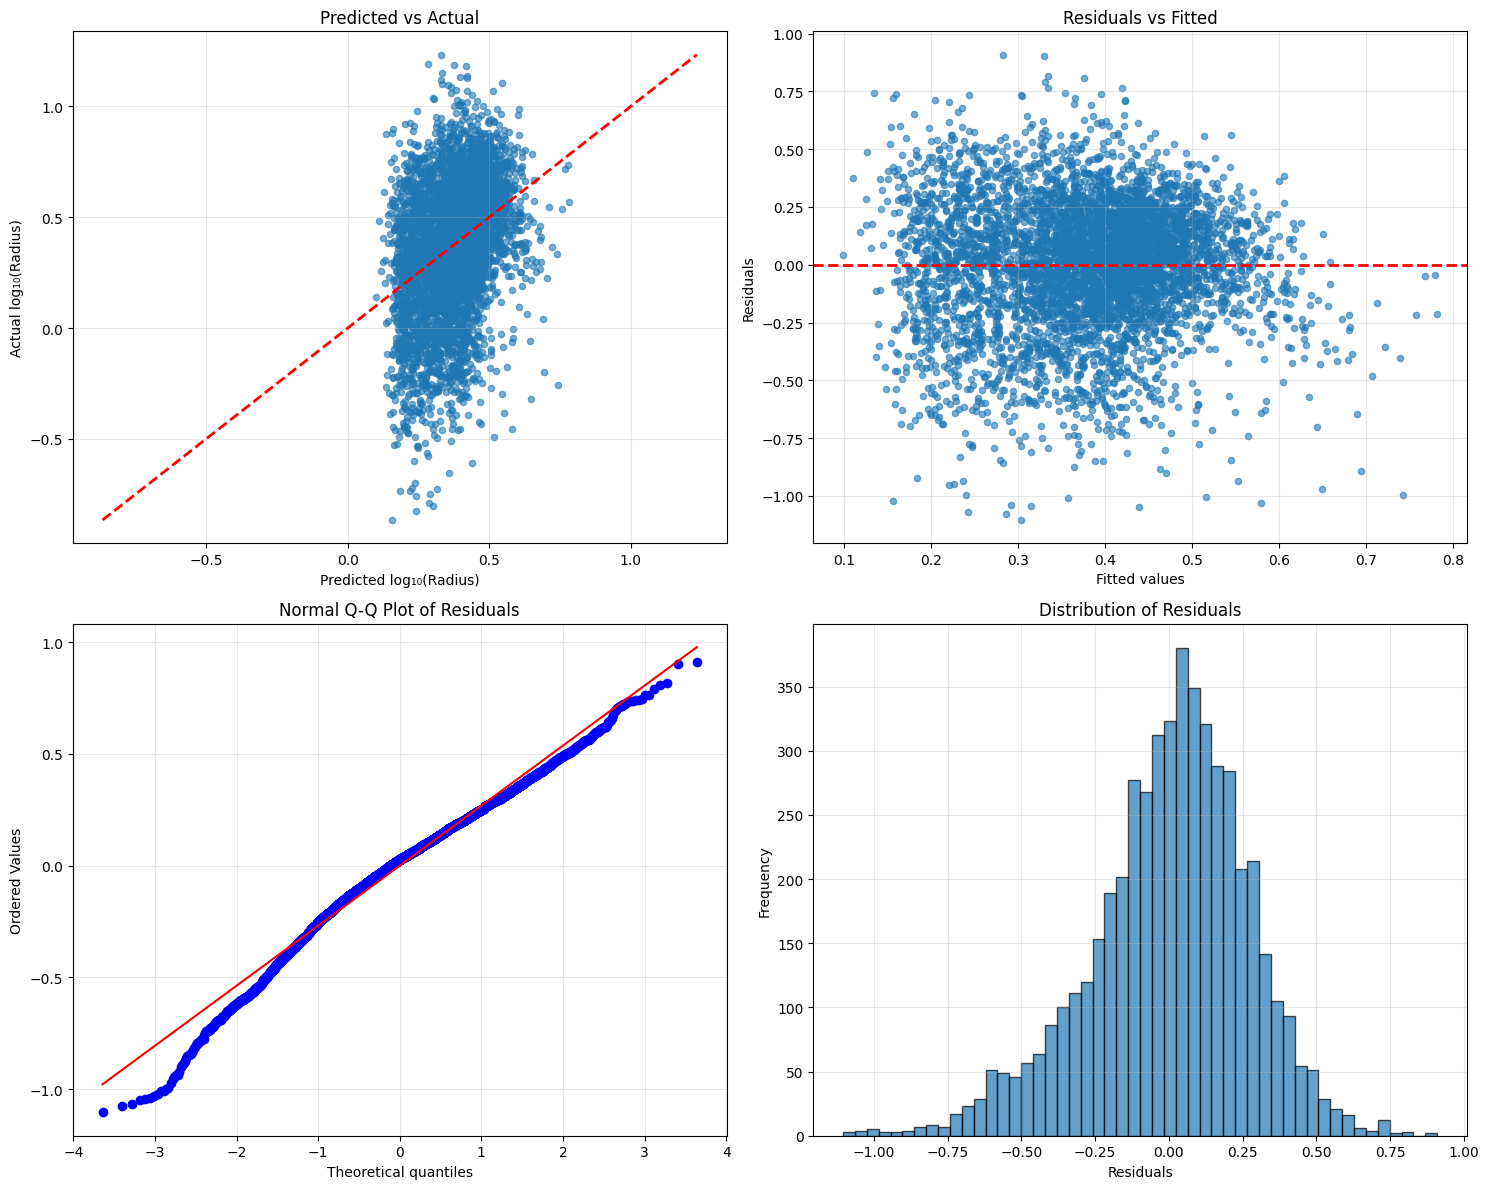


ADDITIONAL DIAGNOSTICS
Mean of residuals: 0.000000
Standard deviation of residuals: 0.2706
Durbin-Watson statistic: 1.637
Condition number: 505.03


In [ ]:
# Import necessary libraries
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for multivariate linear regression
# Independent variables: log of mass, log of sSFR, and log of age
X_data = np.column_stack((
    np.log10(subset["mass_msun"]),      # Log of mass
    np.log10(subset["galaxy_ssfr"]),    # Log of sSFR
    np.log10(subset["age_yr"])          # Log of age
))
y_data = np.log10(subset["r_eff_pc"])   # Dependent variable: log of radius

# Create DataFrame for easier handling
df = pd.DataFrame({
    'log_mass': X_data[:, 0],
    'log_sSFR': X_data[:, 1],
    'log_age': X_data[:, 2],
    'log_radius': y_data
})

# Remove any rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Prepare X and y for statsmodels
X = df[['log_mass', 'log_sSFR', 'log_age']]
y = df['log_radius']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the multivariate linear regression model
model = sm.OLS(y, X_with_const).fit()

# Print detailed regression summary
print("="*80)
print("MULTIVARIATE LINEAR REGRESSION RESULTS")
print("="*80)
print(model.summary())
print("\n")

# Extract coefficients and statistics
coefficients = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues
conf_int = model.conf_int()

# Calculate additional statistics
n = len(y)
k = len(coefficients) - 1  # Number of predictors (excluding intercept)
df_resid = n - k - 1
df_model = k

r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
rse = np.sqrt(model.mse_resid)  # Residual Standard Error
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

# Create the formatted table
print("="*100)
print("TABLE 1: MULTIVARIATE REGRESSION COEFFICIENTS")
print("="*100)

# Create a formatted table
table_data = []
param_names = ['Intercept', 'log₁₀(Mass)', 'log₁₀(sSFR)', 'log₁₀(Age)']

for i, (param_name, param_key) in enumerate(zip(param_names, coefficients.index)):
    coef = coefficients[param_key]
    se = std_errors[param_key]
    t_val = t_values[param_key]
    p_val = p_values[param_key]
    ci_lower = conf_int.iloc[i, 0]
    ci_upper = conf_int.iloc[i, 1]

    # Format p-value
    if p_val < 0.001:
        p_str = "<0.001"
    else:
        p_str = f"{p_val:.3f}"

    table_data.append([
        param_name,
        f"{coef:.4f}",
        f"{se:.4f}",
        f"{t_val:.3f}",
        p_str,
        f"{ci_lower:.4f}",
        f"{ci_upper:.4f}"
    ])

# Print table header
print(f"{'Parameter':<15} {'Coefficient (β)':<15} {'Std. Error':<12} {'t-value':<10} {'p-value':<10} {'95% CI Lower':<12} {'95% CI Upper':<12}")
print("-" * 100)

# Print table rows
for row in table_data:
    print(f"{row[0]:<15} {row[1]:<15} {row[2]:<12} {row[3]:<10} {row[4]:<10} {row[5]:<12} {row[6]:<12}")

print("\n" + "="*100)
print("MODEL STATISTICS")
print("="*100)
print(f"R² = {r_squared:.4f}")
print(f"Adjusted R² = {adj_r_squared:.4f}")
print(f"Residual Standard Error (RSE) = {rse:.4f}")
print(f"F-statistic = {f_statistic:.3f} on {df_model} and {df_resid} DF")
print(f"p-value (F-test) = {f_pvalue:.2e}")
print(f"Sample size (n) = {n}")

# Create a LaTeX-formatted table for publication
print("\n" + "="*80)
print("LaTeX TABLE FORMAT (for publication)")
print("="*80)

latex_table = """
\\begin{table}[h]
\\centering
\\caption{Multivariate Regression Coefficients}
\\begin{tabular}{lcccccc}
\\hline
Parameter & Coefficient ($\\beta$) & Std. Error & t-value & p-value & \\multicolumn{2}{c}{95\\% CI} \\\\
& & & & & Lower & Upper \\\\
\\hline
"""

for row in table_data:
    latex_table += f"{row[0]} & {row[1]} & {row[2]} & {row[3]} & {row[4]} & {row[5]} & {row[6]} \\\\\n"

latex_table += f"""\\hline
\\end{{tabular}}
\\\\[0.5em]
\\textit{{Model Statistics:}} $R^2$ = {r_squared:.3f}, Adjusted $R^2$ = {adj_r_squared:.3f},
RSE = {rse:.3f}, F({df_model}, {df_resid}) = {f_statistic:.2f}, p < 0.001
\\end{{table}}
"""

print(latex_table)

# Visualization: Residuals plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Predicted vs Actual
y_pred = model.predict(X_with_const)
ax1.scatter(y_pred, y, alpha=0.6, s=20)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_xlabel('Predicted log₁₀(Radius)')
ax1.set_ylabel('Actual log₁₀(Radius)')
ax1.set_title('Predicted vs Actual')
ax1.grid(True, alpha=0.3)

# Residuals vs Fitted
residuals = y - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6, s=20)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Fitted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Fitted')
ax2.grid(True, alpha=0.3)

# Q-Q plot for residuals
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Normal Q-Q Plot of Residuals')
ax3.grid(True, alpha=0.3)

# Residuals histogram
ax4.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Residuals')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional diagnostic information
print("\n" + "="*80)
print("ADDITIONAL DIAGNOSTICS")
print("="*80)
print(f"Mean of residuals: {residuals.mean():.6f}")
print(f"Standard deviation of residuals: {residuals.std():.4f}")
print(f"Durbin-Watson statistic: {sm.stats.stattools.durbin_watson(residuals):.3f}")
print(f"Condition number: {np.linalg.cond(X_with_const):.2f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression



# Assuming you have your data in variables: X (predictors) and y (response)
# Fit the full model
model = LinearRegression()
X_full = df[['log_Mass', 'log_sSFR', 'log_Age']]  # Adjust column names as needed
y = df['log_Reff']
model.fit(X_full, y)

# Get predictions and residuals
y_pred = model.predict(X_full)
residuals = y - y_pred
standardized_residuals = residuals / np.std(residuals)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))

# Create 4-panel figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Full Model Residual Analysis', fontsize=16, y=1.02)

# Panel A: Residuals vs Fitted with LOWESS
ax1 = axes[0, 0]
ax1.scatter(y_pred, residuals, alpha=0.5, s=10, color='blue')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

# Add LOWESS smooth line
lowess_result = lowess(residuals, y_pred, frac=0.3)
ax1.plot(lowess_result[:, 0], lowess_result[:, 1], color='orange', linewidth=2, label='LOWESS smooth')

ax1.set_xlabel('Fitted values log₁₀(R_eff)', fontsize=11)
ax1.set_ylabel('Residuals', fontsize=11)
ax1.set_title('(A) Residuals vs Fitted', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add statistics text
stats_text = f'Mean: {np.mean(residuals):.4f}\nMedian: {np.median(residuals):.4f}\nRSE: {np.std(residuals):.3f} dex'
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Panel B: Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('blue')
ax2.get_lines()[0].set_markeredgecolor('blue')
ax2.get_lines()[0].set_markersize(4)
ax2.get_lines()[1].set_color('red')
ax2.get_lines()[1].set_linewidth(1.5)

ax2.set_xlabel('Theoretical Quantiles', fontsize=11)
ax2.set_ylabel('Sample Quantiles', fontsize=11)
ax2.set_title('(B) Normal Q-Q Plot', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
ax2.text(0.02, 0.98, f'Shapiro-Wilk test:\np-value: {shapiro_p:.4f}\nCorrelation: {np.corrcoef(sorted(residuals), stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals))))[0,1]:.4f}',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Panel C: Scale-Location Plot
ax3 = axes[1, 0]
ax3.scatter(y_pred, sqrt_abs_std_resid, alpha=0.5, s=10, color='blue')

# Add LOWESS smooth for Scale-Location
lowess_scale = lowess(sqrt_abs_std_resid, y_pred, frac=0.3)
ax3.plot(lowess_scale[:, 0], lowess_scale[:, 1], color='orange', linewidth=2, label='LOWESS smooth')

ax3.set_xlabel('Fitted values log₁₀(R_eff)', fontsize=11)
ax3.set_ylabel('√|Standardized Residuals|', fontsize=11)
ax3.set_title('(C) Scale-Location', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend()

# Panel D: Histogram of Residuals
ax4 = axes[1, 1]
n, bins, patches = ax4.hist(residuals, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Add normal distribution overlay
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
ax4.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal distribution')

ax4.set_xlabel('Residuals', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('(D) Distribution of Residuals', fontsize=12)
ax4.grid(True, alpha=0.3, axis='y')
ax4.legend()

# Add statistics
ax4.axvline(x=mu, color='green', linestyle='--', linewidth=1.5, label=f'Mean = {mu:.4f}')
ax4.text(0.98, 0.98, f'Skewness: {stats.skew(residuals):.3f}\nKurtosis: {stats.kurtosis(residuals):.3f}',
         transform=ax4.transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print diagnostic statistics
print("=" * 50)
print("RESIDUAL DIAGNOSTICS SUMMARY")
print("=" * 50)
print(f"Number of observations: {len(residuals)}")
print(f"Residual Standard Error: {np.std(residuals):.4f} dex")
print(f"Mean of residuals: {np.mean(residuals):.6f}")
print(f"Median of residuals: {np.median(residuals):.6f}")
print(f"\nNormality Tests:")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
print(f"Q-Q correlation: {np.corrcoef(sorted(residuals), stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals))))[0,1]:.4f}")
print(f"Skewness: {stats.skew(residuals):.4f}")
print(f"Kurtosis: {stats.kurtosis(residuals):.4f}")

# Breusch-Pagan test for heteroscedasticity
from scipy.stats import chi2
n = len(residuals)
residuals_squared = residuals**2
aux_model = LinearRegression()
aux_model.fit(X_full, residuals_squared)
aux_r2 = aux_model.score(X_full, residuals_squared)
lm_statistic = n * aux_r2
p_value = 1 - chi2.cdf(lm_statistic, df=X_full.shape[1])
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"LM Statistic: {lm_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Interpretation: {'Evidence of heteroscedasticity' if p_value < 0.05 else 'No strong evidence of heteroscedasticity'}")

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# First, check for missing values in your data
print("Checking for missing values...")
print(f"Missing values in mass: {np.sum(np.isnan(subset['mass_msun']))}")
print(f"Missing values in sSFR: {np.sum(np.isnan(subset['galaxy_ssfr']))}")
print(f"Missing values in age: {np.sum(np.isnan(subset['age_yr']))}")
print(f"Missing values in radius: {np.sum(np.isnan(subset['r_eff_pc']))}")

# Remove any rows with missing values
# Create mask for non-missing values
valid_mask = (
    ~np.isnan(subset["mass_msun"]) &
    ~np.isnan(subset["galaxy_ssfr"]) &
    ~np.isnan(subset["age_yr"]) &
    ~np.isnan(subset["r_eff_pc"]) &
    (subset["mass_msun"] > 0) &  # Ensure positive values for log
    (subset["galaxy_ssfr"] > 0) &
    (subset["age_yr"] > 0) &
    (subset["r_eff_pc"] > 0)
)

# Apply the mask
subset_clean = subset[valid_mask]
print(f"\nOriginal subset size: {len(subset)}")
print(f"After removing missing/invalid values: {len(subset_clean)}")

# Recreate X and y with clean data
X = np.column_stack((
    np.log10(subset_clean["mass_msun"]),
    np.log10(subset_clean["galaxy_ssfr"]),
    np.log10(subset_clean["age_yr"])
))
y = np.log10(subset_clean["r_eff_pc"])

# Check for any remaining NaN or infinite values
print(f"\nAny NaN in X: {np.any(np.isnan(X))}")
print(f"Any infinite in X: {np.any(np.isinf(X))}")
print(f"Any NaN in y: {np.any(np.isnan(y))}")
print(f"Any infinite in y: {np.any(np.isinf(y))}")

# If there are still issues, remove them
mask_final = ~(np.isnan(X).any(axis=1) | np.isinf(X).any(axis=1) | np.isnan(y) | np.isinf(y))
X_clean = X[mask_final]
y_clean = y[mask_final]

print(f"Final sample size: {len(X_clean)}")

# Now proceed with the analysis using X_clean and y_clean
# =========================================================

# Table 1 - Regression Coefficients
print("\n" + "="*50)
print("TABLE 1: REGRESSION COEFFICIENTS")
print("="*50)

# Fit model with statsmodels for detailed statistics
X_with_const = sm.add_constant(X_clean)
model_sm = sm.OLS(y_clean, X_with_const).fit()
print(model_sm.summary())

# Extract key values
coefficients = model_sm.params
std_errors = model_sm.bse
t_values = model_sm.tvalues
p_values = model_sm.pvalues
conf_int = model_sm.conf_int()

print("\nFormatted for paper:")
print(f"Intercept: β = {coefficients[0]:.4f}, SE = {std_errors[0]:.4f}, p = {p_values[0]:.4f}")
print(f"log(Mass): β = {coefficients[1]:.4f}, SE = {std_errors[1]:.4f}, p = {p_values[1]:.4f}")
print(f"log(sSFR): β = {coefficients[2]:.4f}, SE = {std_errors[2]:.4f}, p = {p_values[2]:.4f}")
print(f"log(Age):  β = {coefficients[3]:.4f}, SE = {std_errors[3]:.4f}, p = {p_values[3]:.4f}")
print(f"\nModel R² = {model_sm.rsquared:.4f}")
print(f"Adjusted R² = {model_sm.rsquared_adj:.4f}")
print(f"RSE = {np.sqrt(model_sm.mse_resid):.4f}")

# Table 2 - VIF Calculation
print("\n" + "="*50)
print("TABLE 2: MULTICOLLINEARITY DIAGNOSTICS")
print("="*50)

# Create DataFrame for VIF calculation
X_df = pd.DataFrame(X_clean, columns=['log_Mass', 'log_sSFR', 'log_Age'])

# Calculate VIF - Alternative method that handles issues better
from sklearn.linear_model import LinearRegression

vif_values = []
for i in range(X_df.shape[1]):
    # Get all columns except i
    X_temp = X_df.drop(X_df.columns[i], axis=1)
    y_temp = X_df.iloc[:, i]

    # Fit regression
    reg = LinearRegression()
    reg.fit(X_temp, y_temp)
    r_squared = reg.score(X_temp, y_temp)

    # Calculate VIF
    vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
    vif_values.append(vif)

# Create VIF table
vif_data = pd.DataFrame({
    'Variable': X_df.columns,
    'VIF': vif_values,
    'Tolerance': [1/v if v != np.inf else 0 for v in vif_values]
})
print("\nVIF Values:")
print(vif_data)

# Correlation matrix
corr_matrix = X_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Table 3 - Model Comparison
print("\n" + "="*50)
print("TABLE 3: MODEL COMPARISON")
print("="*50)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Full model with sklearn
model_full = LinearRegression()
model_full.fit(X_clean, y_clean)
y_pred_full = model_full.predict(X_clean)
r2_full = r2_score(y_clean, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_clean, y_pred_full))
mae_full = mean_absolute_error(y_clean, y_pred_full)

# Cross-validation for full model
cv_scores_full = cross_val_score(model_full, X_clean, y_clean, cv=5, scoring='r2')
cv_r2_full = cv_scores_full.mean()
cv_rmse_full_scores = cross_val_score(model_full, X_clean, y_clean, cv=5,
                                       scoring='neg_mean_squared_error')
cv_rmse_full = np.sqrt(-cv_rmse_full_scores.mean())

# Mass-only model
X_mass_only = X_clean[:, 0].reshape(-1, 1)
model_mass = LinearRegression()
model_mass.fit(X_mass_only, y_clean)
y_pred_mass = model_mass.predict(X_mass_only)
r2_mass = r2_score(y_clean, y_pred_mass)
rmse_mass = np.sqrt(mean_squared_error(y_clean, y_pred_mass))
mae_mass = mean_absolute_error(y_clean, y_pred_mass)

# Cross-validation for mass-only model
cv_scores_mass = cross_val_score(model_mass, X_mass_only, y_clean, cv=5, scoring='r2')
cv_r2_mass = cv_scores_mass.mean()
cv_rmse_mass_scores = cross_val_score(model_mass, X_mass_only, y_clean, cv=5,
                                       scoring='neg_mean_squared_error')
cv_rmse_mass = np.sqrt(-cv_rmse_mass_scores.mean())

print(f"\nFull Model:")
print(f"  R² = {r2_full:.4f}, Adj R² = {model_sm.rsquared_adj:.4f}")
print(f"  RMSE = {rmse_full:.4f}, MAE = {mae_full:.4f}")
print(f"  CV R² = {cv_r2_full:.4f}, CV RMSE = {cv_rmse_full:.4f}")

print(f"\nMass-Only Model:")
print(f"  R² = {r2_mass:.4f}")
print(f"  RMSE = {rmse_mass:.4f}, MAE = {mae_mass:.4f}")
print(f"  CV R² = {cv_r2_mass:.4f}, CV RMSE = {cv_rmse_mass:.4f}")

# F-test for nested models
n = len(y_clean)
k_full = 4  # intercept + 3 predictors
k_reduced = 2  # intercept + 1 predictor

f_stat = ((r2_full - r2_mass) / (k_full - k_reduced)) / ((1 - r2_full) / (n - k_full))
f_pvalue = 1 - stats.f.cdf(f_stat, k_full - k_reduced, n - k_full)
print(f"\nF-test (Full vs Mass-Only):")
print(f"  F({k_full - k_reduced}, {n - k_full}) = {f_stat:.3f}, p = {f_pvalue:.6f}")

# Calculate AIC and BIC
def calculate_aic_bic(n, k, rss):
    """Calculate AIC and BIC from residual sum of squares"""
    aic = n * np.log(rss/n) + 2*k
    bic = n * np.log(rss/n) + k*np.log(n)
    return aic, bic

# RSS for each model
rss_full = np.sum((y_clean - y_pred_full)**2)
rss_mass = np.sum((y_clean - y_pred_mass)**2)

aic_full, bic_full = calculate_aic_bic(n, k_full, rss_full)
aic_mass, bic_mass = calculate_aic_bic(n, k_reduced, rss_mass)

print(f"\nInformation Criteria:")
print(f"  Full Model: AIC = {aic_full:.1f}, BIC = {bic_full:.1f}")
print(f"  Mass-Only:  AIC = {aic_mass:.1f}, BIC = {bic_mass:.1f}")
print(f"  ΔAIC = {aic_mass - aic_full:.1f} (negative favors full model)")
print(f"  ΔBIC = {bic_mass - bic_full:.1f} (negative favors full model)")

Checking for missing values...
Missing values in mass: 0
Missing values in sSFR: 0
Missing values in age: 0
Missing values in radius: 0

Original subset size: 5105
After removing missing/invalid values: 5105

Any NaN in X: False
Any infinite in X: False
Any NaN in y: False
Any infinite in y: False
Final sample size: 5105

TABLE 1: REGRESSION COEFFICIENTS
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     236.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          1.53e-143
Time:                        22:06:14   Log-Likelihood:                -569.66
No. Observations:                5105   AIC:                             1147.
Df Residuals:                    5101   BIC:                             1173.
Df Model:  

In [ ]:
# VIF Verification Code Adapted to Your Data Structure
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def create_log_transformed_data(subset_clean):
    """
    Create log-transformed dataframe matching your analysis structure
    """
    print("=== CREATING LOG-TRANSFORMED DATA ===")

    # Apply log10 transformation to match your X matrix construction
    log_data = pd.DataFrame({
        'log_Mass': np.log10(subset_clean["mass_msun"]),
        'log_sSFR': np.log10(subset_clean["galaxy_ssfr"]),
        'log_Age': np.log10(subset_clean["age_yr"]),
        'log_Radius': np.log10(subset_clean["r_eff_pc"])
    })

    print(f"Log-transformed data shape: {log_data.shape}")
    print(f"Missing values after log transform: {log_data.isnull().sum().sum()}")

    # Check for any infinite values (from log of zero/negative numbers)
    inf_count = np.isinf(log_data).sum().sum()
    if inf_count > 0:
        print(f"WARNING: {inf_count} infinite values detected after log transformation")
        print("Infinite values per column:", np.isinf(log_data).sum().to_dict())

    # Remove any remaining invalid values
    log_data_clean = log_data.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"Final clean sample size: {len(log_data_clean)}")

    return log_data_clean

def manual_vif_calculation_your_data(log_data_clean):
    """
    Manual VIF calculation using your log-transformed data
    """
    print("\n=== MANUAL VIF VERIFICATION (YOUR DATA STRUCTURE) ===")

    # Define predictors (matching your correlation matrix output)
    predictors = ['log_Mass', 'log_sSFR', 'log_Age']

    print(f"Using predictors: {predictors}")
    print(f"Sample size: {len(log_data_clean)}")

    # Extract predictor matrix (same as your X construction)
    X = log_data_clean[predictors]

    print("\nDescriptive statistics of log-transformed predictors:")
    print(X.describe())

    vif_data = []

    for i, predictor in enumerate(predictors):
        print(f"\nProcessing {predictor}:")

        # Current predictor as dependent variable
        y = X[predictor]

        # All other predictors as independent variables
        other_predictors = [p for p in predictors if p != predictor]
        X_others = X[other_predictors]

        print(f"  Regressing {predictor} against {other_predictors}")
        print(f"  Dependent variable ({predictor}) range: {y.min():.3f} to {y.max():.3f}")

        # Fit regression
        reg = LinearRegression()
        reg.fit(X_others, y)
        y_pred = reg.predict(X_others)

        # Calculate R²
        r2 = r2_score(y, y_pred)

        # Calculate VIF
        if r2 >= 0.9999:  # Avoid division by nearly zero
            vif = float('inf')
            print(f"  WARNING: Near-perfect correlation (R² = {r2:.6f})")
        else:
            vif = 1 / (1 - r2)

        print(f"  R² against other predictors: {r2:.6f}")
        print(f"  VIF = 1/(1-R²) = {vif:.6f}")

        # Compare with correlation-based approximation
        max_corr = max([abs(X[predictor].corr(X[other])) for other in other_predictors])
        approx_r2 = max_corr ** 2
        approx_vif = 1 / (1 - approx_r2)
        print(f"  Max pairwise |correlation|: {max_corr:.6f}")
        print(f"  Approximate VIF from max correlation: {approx_vif:.6f}")

        vif_data.append({
            'Variable': predictor,
            'R2_against_others': r2,
            'VIF_manual': vif,
            'Max_Correlation': max_corr,
            'VIF_approx': approx_vif
        })

    return pd.DataFrame(vif_data)

def verify_correlation_matrix(log_data_clean):
    """
    Verify correlation matrix matches your reported values
    """
    print("\n=== CORRELATION MATRIX VERIFICATION ===")

    predictors = ['log_Mass', 'log_sSFR', 'log_Age']
    corr_matrix = log_data_clean[predictors].corr()

    print("Calculated correlation matrix:")
    print(corr_matrix.round(6))

    print("\nYour reported correlation matrix:")
    print("log_Mass log_sSFR log_Age")
    print("log_Mass  1.000000 -0.090413  0.590492")
    print("log_sSFR -0.090413  1.000000  0.034242")
    print("log_Age   0.590492  0.034242  1.000000")

    print("\nDifferences (should be near zero if calculations match):")
    expected = np.array([
        [1.000000, -0.090413, 0.590492],
        [-0.090413, 1.000000, 0.034242],
        [0.590492, 0.034242, 1.000000]
    ])

    differences = corr_matrix.values - expected
    max_diff = np.abs(differences).max()
    print(f"Maximum difference: {max_diff:.6f}")

    if max_diff < 0.001:
        print("✓ Correlation matrices match!")
    else:
        print("⚠ Correlation matrices differ - check data processing")
        print("Difference matrix:")
        print(pd.DataFrame(differences, index=predictors, columns=predictors))

    return corr_matrix

def compare_with_statsmodels_vif(log_data_clean):
    """
    Compare manual calculation with statsmodels (if available)
    """
    print("\n=== COMPARISON WITH STATSMODELS VIF ===")

    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor

        predictors = ['log_Mass', 'log_sSFR', 'log_Age']
        X = log_data_clean[predictors].values

        vif_statsmodels = []
        for i in range(len(predictors)):
            vif_val = variance_inflation_factor(X, i)
            vif_statsmodels.append({
                'Variable': predictors[i],
                'VIF_statsmodels': vif_val
            })

        vif_df = pd.DataFrame(vif_statsmodels)
        print("Statsmodels VIF results:")
        print(vif_df)

        return vif_df

    except ImportError:
        print("Statsmodels not available for comparison")
        return None

# MAIN EXECUTION CODE FOR YOUR DATA
def run_vif_verification_your_data(subset_clean):
    """
    Complete VIF verification using your data structure
    """
    print("="*60)
    print("VIF VERIFICATION FOR YOUR DATA STRUCTURE")
    print("="*60)

    # Step 1: Create log-transformed data
    log_data_clean = create_log_transformed_data(subset_clean)

    # Step 2: Verify correlation matrix matches your output
    corr_matrix = verify_correlation_matrix(log_data_clean)

    # Step 3: Manual VIF calculation
    manual_vif_results = manual_vif_calculation_your_data(log_data_clean)
    print("\n" + "="*50)
    print("MANUAL VIF RESULTS:")
    print("="*50)
    print(manual_vif_results)

    # Step 4: Compare with statsmodels if available
    statsmodels_vif = compare_with_statsmodels_vif(log_data_clean)

    # Step 5: Summary comparison
    print("\n" + "="*50)
    print("SUMMARY COMPARISON")
    print("="*50)
    print("Your reported VIF values:")
    print("log_Mass: 1.564786")
    print("log_sSFR: 1.020371")
    print("log_Age:  1.553817")

    print("\nManual calculation VIF values:")
    for _, row in manual_vif_results.iterrows():
        print(f"{row['Variable']}: {row['VIF_manual']:.6f}")

    return log_data_clean, manual_vif_results

# TO USE THIS CODE WITH YOUR EXISTING DATA:
print("To run VIF verification with your data structure, use:")
print("log_data_clean, manual_vif_results = run_vif_verification_your_data(subset_clean)")
run_vif_verification_your_data(subset_clean)

To run VIF verification with your data structure, use:
log_data_clean, manual_vif_results = run_vif_verification_your_data(subset_clean)
VIF VERIFICATION FOR YOUR DATA STRUCTURE
=== CREATING LOG-TRANSFORMED DATA ===
Log-transformed data shape: (5105, 4)
Missing values after log transform: 0
Final clean sample size: 5105

=== CORRELATION MATRIX VERIFICATION ===
Calculated correlation matrix:
          log_Mass  log_sSFR   log_Age
log_Mass  1.000000 -0.090413  0.590492
log_sSFR -0.090413  1.000000  0.034242
log_Age   0.590492  0.034242  1.000000

Your reported correlation matrix:
log_Mass log_sSFR log_Age
log_Mass  1.000000 -0.090413  0.590492
log_sSFR -0.090413  1.000000  0.034242
log_Age   0.590492  0.034242  1.000000

Differences (should be near zero if calculations match):
Maximum difference: 0.000000
✓ Correlation matrices match!

=== MANUAL VIF VERIFICATION (YOUR DATA STRUCTURE) ===
Using predictors: ['log_Mass', 'log_sSFR', 'log_Age']
Sample size: 5105

Descriptive statistics of l

(      log_Mass   log_sSFR   log_Age  log_Radius
 0     3.958373 -10.176091  7.698970    0.715000
 1     3.810904 -10.176091  7.698970    0.031722
 2     2.595496 -10.176091  6.602060    0.547105
 3     3.585461 -10.447158  8.301030    0.618349
 4     3.089198 -10.447158  6.903090    0.822117
 ...        ...        ...       ...         ...
 5100  3.491502  -8.977724  7.698970    0.650061
 5101  4.127105  -8.977724  8.301030    0.531645
 5102  3.685742  -8.977724  6.301030    0.784188
 5103  2.835373  -8.977724  6.602060    0.556411
 5104  3.617734  -8.977724  7.954243    0.480159
 
 [5105 rows x 4 columns],
    Variable  R2_against_others  VIF_manual  Max_Correlation  VIF_approx
 0  log_Mass           0.360935    1.564786         0.590492    1.535347
 1  log_sSFR           0.019964    1.020371         0.090413    1.008242
 2   log_Age           0.356424    1.553817         0.590492    1.535347)

In [ ]:
# Simple debugging approach to identify the data structure issue

def debug_data_structure(subset_clean):
    """
    Debug the data structure to understand what we're working with
    """
    print("=== DATA STRUCTURE DEBUGGING ===")
    print(f"Type of subset_clean: {type(subset_clean)}")
    print(f"Has 'mass_msun' column: {'mass_msun' in subset_clean}")
    print(f"Has 'r_eff_pc' column: {'r_eff_pc' in subset_clean}")

    # Try different access methods
    try:
        mass_col = subset_clean["mass_msun"]
        print(f"Type of mass column: {type(mass_col)}")
        print(f"First few values: {mass_col[:5] if hasattr(mass_col, '__getitem__') else 'Cannot slice'}")
    except Exception as e:
        print(f"Error accessing mass_msun: {e}")

    # Check if it's a pandas DataFrame
    try:
        import pandas as pd
        if isinstance(subset_clean, pd.DataFrame):
            print("✓ It's a pandas DataFrame")
            print(f"Shape: {subset_clean.shape}")
            print(f"Columns: {list(subset_clean.columns)}")
        else:
            print(f"⚠ Not a pandas DataFrame: {type(subset_clean)}")
    except ImportError:
        print("Pandas not available")

def simple_residual_plots(subset_clean):
    """
    Simplified version with better error handling
    """
    # Debug first
    debug_data_structure(subset_clean)

    # Try multiple approaches to extract data
    try:
        # Method 1: Direct numpy conversion
        mass_values = np.array(subset_clean["mass_msun"])
        radius_values = np.array(subset_clean["r_eff_pc"])
        print("✓ Method 1 worked: Direct numpy conversion")
    except Exception as e1:
        try:
            # Method 2: Convert to list first
            mass_values = np.array(list(subset_clean["mass_msun"]))
            radius_values = np.array(list(subset_clean["r_eff_pc"]))
            print("✓ Method 2 worked: List conversion")
        except Exception as e2:
            try:
                # Method 3: Pandas approach
                mass_values = subset_clean["mass_msun"].values
                radius_values = subset_clean["r_eff_pc"].values
                print("✓ Method 3 worked: Pandas .values")
            except Exception as e3:
                print(f"❌ All methods failed:")
                print(f"  Method 1: {e1}")
                print(f"  Method 2: {e2}")
                print(f"  Method 3: {e3}")
                return None

    # Apply log transformation
    log_mass = np.log10(mass_values)
    log_radius = np.log10(radius_values)

    print(f"Data extracted successfully:")
    print(f"  Sample size: {len(mass_values)}")
    print(f"  Mass range: {mass_values.min():.1e} to {mass_values.max():.1e} solar masses")
    print(f"  Radius range: {radius_values.min():.3f} to {radius_values.max():.3f} pc")

    # Fit simple linear regression
    from sklearn.linear_model import LinearRegression

    X = log_mass.reshape(-1, 1)
    y = log_radius

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    print(f"\nModel Statistics:")
    print(f"  Slope: {model.coef_[0]:.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  R²: {model.score(X, y):.4f}")
    print(f"  Residual std: {np.std(residuals):.4f} dex")

    # Create simple diagnostic plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Residual Diagnostics: Mass-Only Model', fontsize=14, fontweight='bold')

    # Plot 1: Residuals vs Fitted
    axes[0,0].scatter(y_pred, residuals, alpha=0.6, s=15)
    axes[0,0].axhline(0, color='red', linestyle='--')
    axes[0,0].set_xlabel('Fitted log₁₀(Radius)')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].set_title('(a) Residuals vs Fitted')
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Q-Q plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('(b) Normal Q-Q Plot')
    axes[0,1].grid(True, alpha=0.3)

    # Add Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    axes[0,1].text(0.05, 0.95, f'Shapiro-Wilk\np = {shapiro_p:.3f}',
                   transform=axes[0,1].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   verticalalignment='top')

    # Plot 3: Scale-Location
    sqrt_abs_residuals = np.sqrt(np.abs(residuals / np.std(residuals)))
    axes[1,0].scatter(y_pred, sqrt_abs_residuals, alpha=0.6, s=15, color='green')
    axes[1,0].set_xlabel('Fitted log₁₀(Radius)')
    axes[1,0].set_ylabel('√|Standardized Residuals|')
    axes[1,0].set_title('(c) Scale-Location')
    axes[1,0].grid(True, alpha=0.3)

    # Plot 4: Residuals vs Index (simplified leverage plot)
    indices = np.arange(len(residuals))
    standardized_residuals = residuals / np.std(residuals)
    axes[1,1].scatter(indices, standardized_residuals, alpha=0.6, s=15, color='purple')
    axes[1,1].axhline(0, color='red', linestyle='--')
    axes[1,1].axhline(2, color='orange', linestyle='--', alpha=0.7)
    axes[1,1].axhline(-2, color='orange', linestyle='--', alpha=0.7)
    axes[1,1].set_xlabel('Observation Index')
    axes[1,1].set_ylabel('Standardized Residuals')
    axes[1,1].set_title('(d) Standardized Residuals')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()

    return {
        'residuals': residuals,
        'fitted': y_pred,
        'shapiro_p': shapiro_p,
        'r2': model.score(X, y),
        'residual_std': np.std(residuals),
        'slope': model.coef_[0],
        'intercept': model.intercept_
    }

# Run this first to debug your data structure:
print("Step 1: Debug your data structure")
print("Run: debug_data_structure(subset_clean)")
#debug_data_structure(subset_clean)
print(subset_clean)
print()
print("Step 2: Generate simple plots")
print("Run: results = simple_residual_plots(subset_clean)")
simple_residual_plots(subset_clean)

Step 1: Debug your data structure
Run: debug_data_structure(subset_clean)
 field   ID  galaxy galaxy_distance_mpc ...     pct_residual    Age_bin sSFR_bin
------- --- ------- ------------------- ... ------------------- ------- --------
 ic4247  45  ic4247                5.11 ...   52.86204477614049  10^{8} 10^{-10}
 ic4247 374  ic4247                5.11 ... -117.46527062164259  10^{8} 10^{-10}
 ic4247 557  ic4247                5.11 ...   58.20492552559651  10^{7} 10^{-10}
  ic559   1   ic559                10.0 ...   44.48607424849645  10^{9} 10^{-10}
  ic559   3   ic559                10.0 ...   73.56985245625226  10^{7} 10^{-10}
  ic559   4   ic559                10.0 ...    65.1555833636987  10^{9} 10^{-10}
  ic559   6   ic559                10.0 ...   47.92749398801908  10^{9} 10^{-10}
  ic559   7   ic559                10.0 ...   49.26956525550494  10^{9} 10^{-10}
  ic559   8   ic559                10.0 ...   67.06693608273694  10^{7} 10^{-10}
  ic559   9   ic559                

TypeError: Cannot compare structured or void to non-void arrays.

For Astropy Table, run:
results = generate_residual_plots_astropy(subset_clean)
=== ASTROPY TABLE RESIDUAL ANALYSIS ===
Table type: <class 'astropy.table.table.Table'>
Table length: 5105
Available columns: ['field', 'ID', 'galaxy', 'galaxy_distance_mpc', 'galaxy_distance_mpc_err', 'galaxy_stellar_mass', 'galaxy_sfr', 'galaxy_ssfr', 'RA', 'Dec', 'x_legus', 'y_legus', 'morphology_class', 'morphology_class_source', 'age_yr', 'age_yr_min', 'age_yr_max', 'mass_msun', 'mass_msun_min', 'mass_msun_max', 'x', 'x_e-', 'x_e+', 'y', 'y_e-', 'y_e+', 'mu_0', 'mu_0_e-', 'mu_0_e+', 'scale_radius_pixels', 'scale_radius_pixels_e-', 'scale_radius_pixels_e+', 'axis_ratio', 'axis_ratio_e-', 'axis_ratio_e+', 'position_angle', 'position_angle_e-', 'position_angle_e+', 'power_law_slope', 'power_law_slope_e-', 'power_law_slope_e+', 'local_background', 'local_background_e-', 'local_background_e+', 'num_bootstrap_iterations', 'radius_fit_failure', 'fit_quality_metric', 'reliable_radius', 'reliable_mass', 'r_eff_

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5105.
  res = hypotest_fun_out(*samples, **kwds)



=== DIAGNOSTIC SUMMARY ===
Normality (Shapiro-Wilk): p = 0.0000 ⚠
Homoscedasticity: Questionable
High leverage points: 457 (9.0%)
High influence points: 295 (5.8%)
Outliers (|z|>2): 280 (5.5%)

Model Adequacy Score: 0/4
❌ Significant concerns with model assumptions
plt.show()


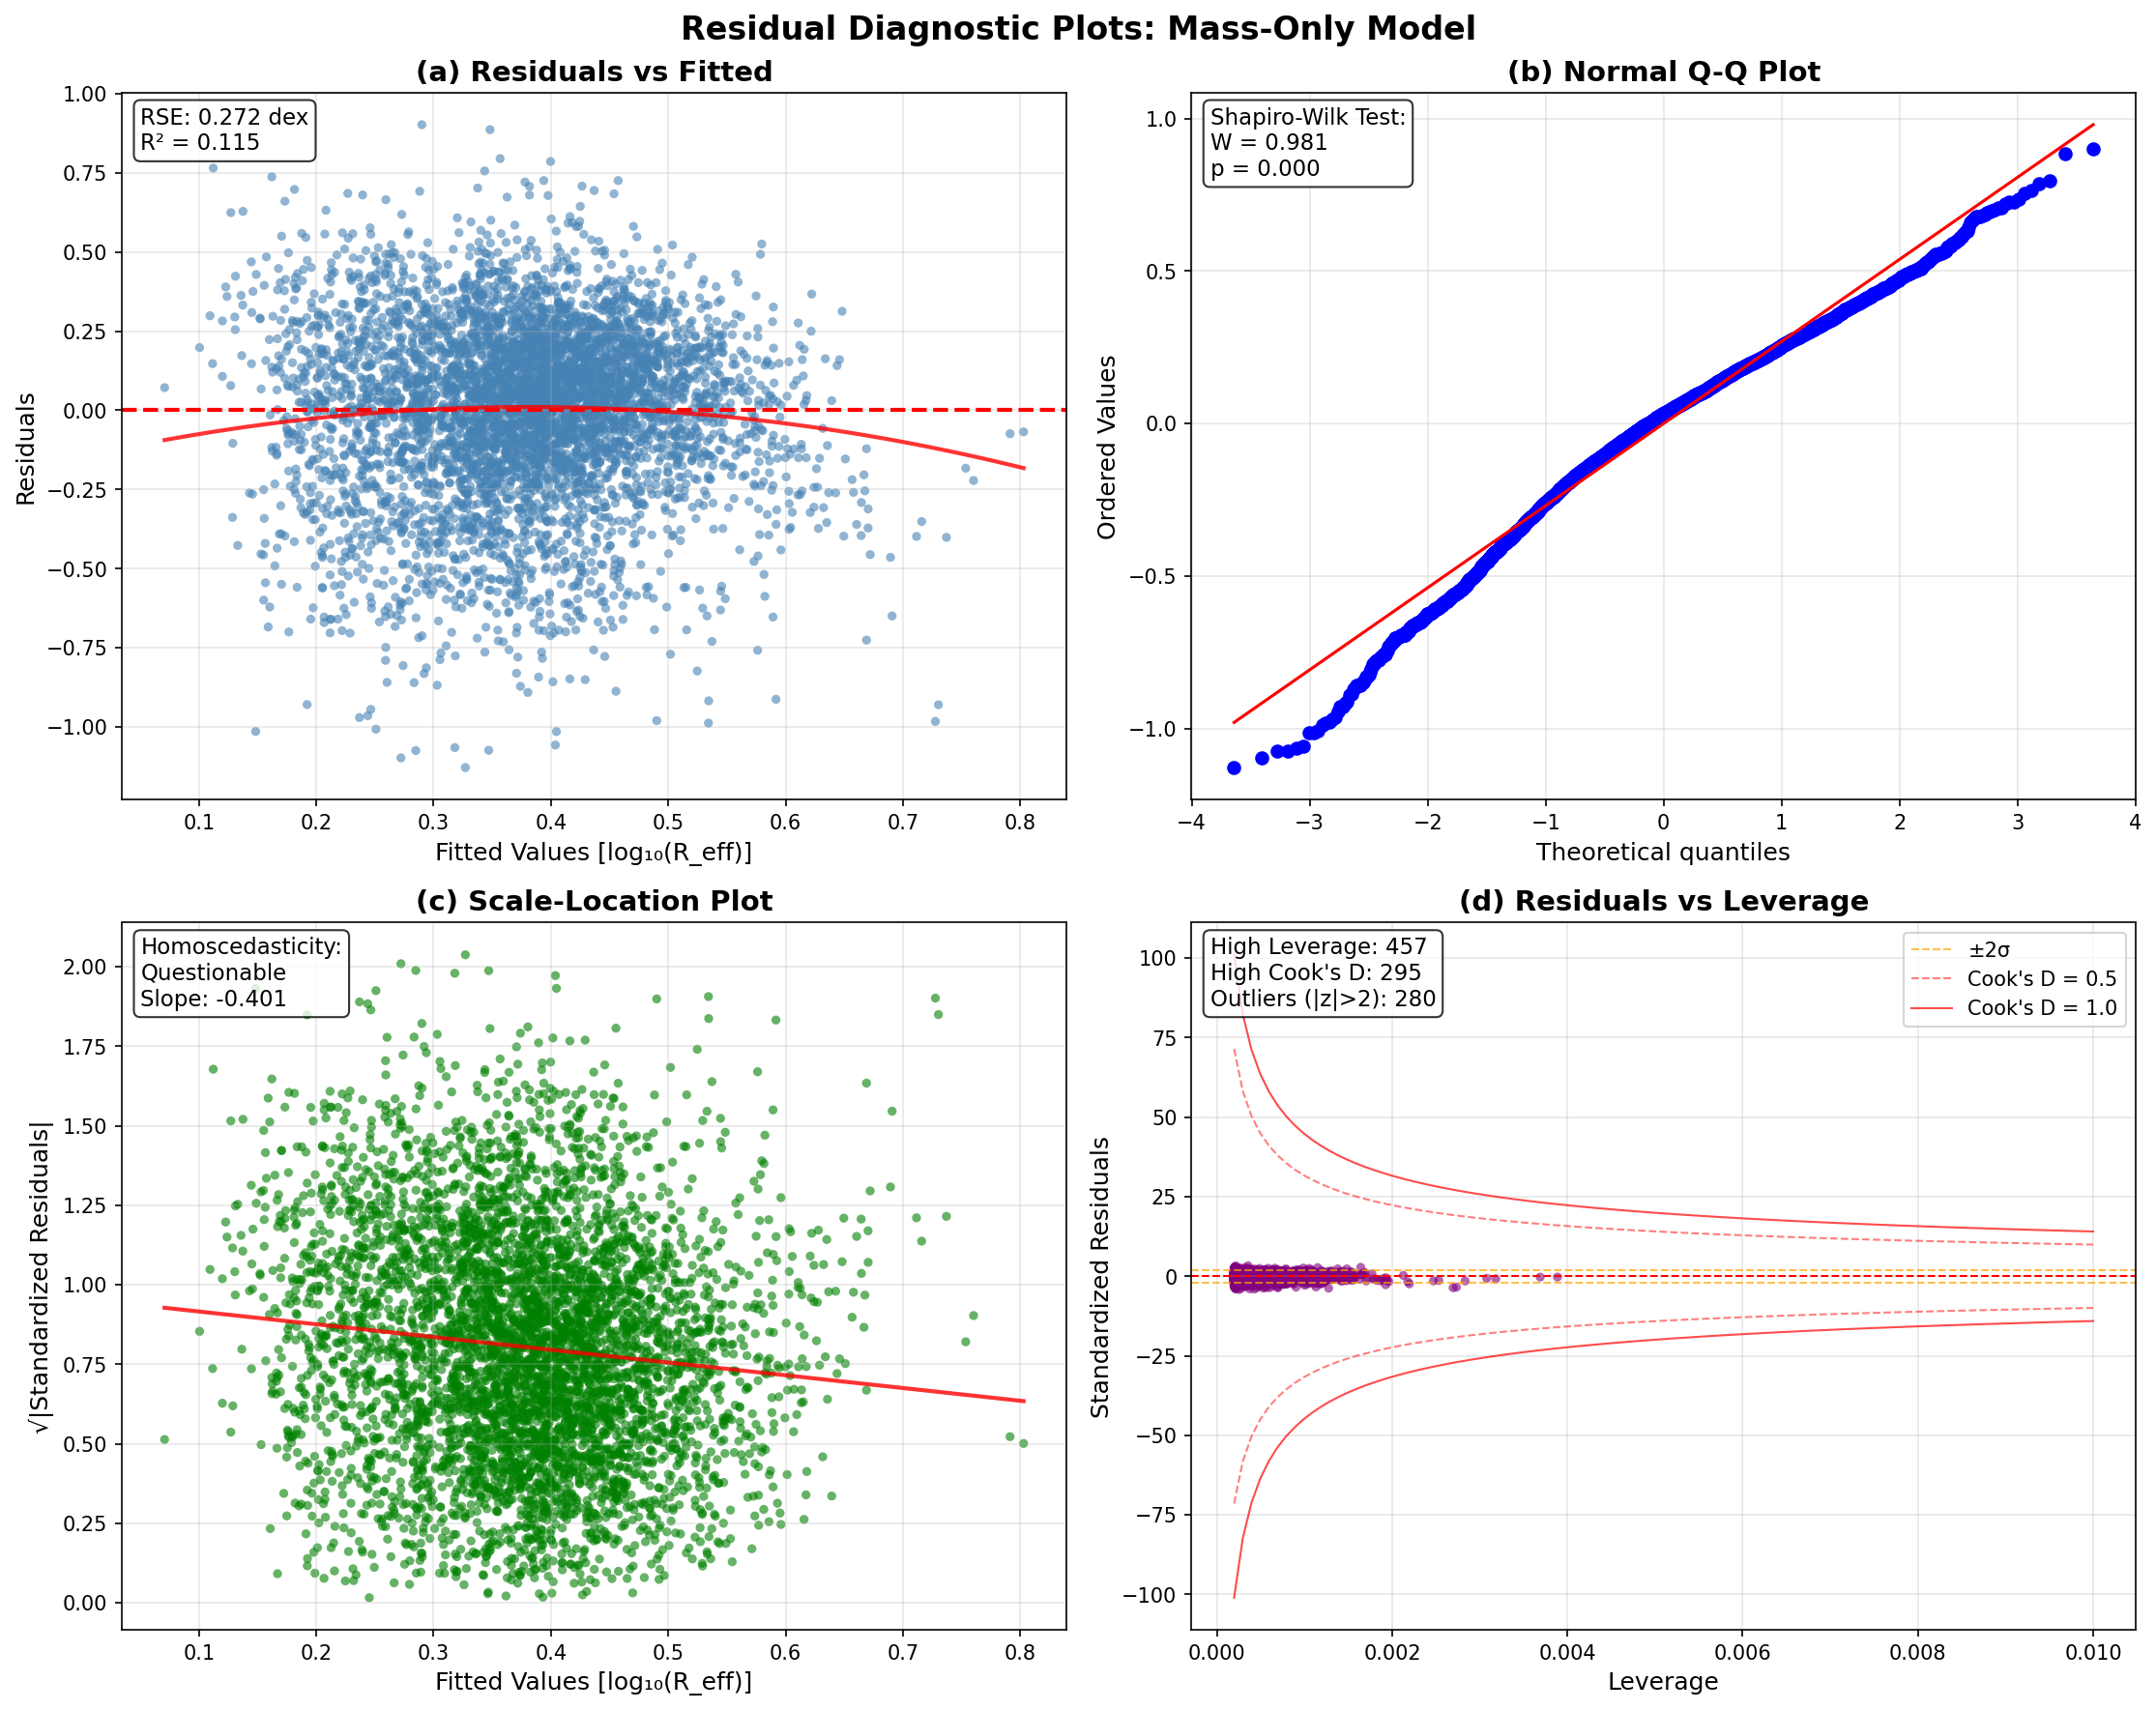

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def generate_residual_plots_astropy(astropy_table, figsize=(15, 12)):
    """
    Generate residual diagnostic plots for Astropy Table data

    Parameters:
    -----------
    astropy_table : astropy.table.Table
        Astropy table with mass_msun and r_eff_pc columns
    figsize : tuple
        Figure size for the plots
    """

    print("=== ASTROPY TABLE RESIDUAL ANALYSIS ===")
    print(f"Table type: {type(astropy_table)}")
    print(f"Table length: {len(astropy_table)}")
    print(f"Available columns: {astropy_table.colnames}")

    # Extract data from Astropy Table (correct method)
    try:
        # For Astropy tables, use .data or direct numpy conversion
        mass_data = np.array(astropy_table['mass_msun'])
        radius_data = np.array(astropy_table['r_eff_pc'])
        print("✓ Successfully extracted data from Astropy Table")
    except KeyError as e:
        print(f"❌ Column not found: {e}")
        print(f"Available columns: {astropy_table.colnames}")
        return None
    except Exception as e:
        print(f"❌ Error extracting data: {e}")
        return None

    # Check for invalid values
    valid_mask = (mass_data > 0) & (radius_data > 0) & np.isfinite(mass_data) & np.isfinite(radius_data)
    mass_clean = mass_data[valid_mask]
    radius_clean = radius_data[valid_mask]

    print(f"Original data points: {len(mass_data)}")
    print(f"After removing invalid values: {len(mass_clean)}")
    print(f"Mass range: {mass_clean.min():.2e} to {mass_clean.max():.2e} solar masses")
    print(f"Radius range: {radius_clean.min():.3f} to {radius_clean.max():.3f} pc")

    # Apply log transformation
    log_mass = np.log10(mass_clean)
    log_radius = np.log10(radius_clean)

    # Fit mass-only linear regression
    X = log_mass.reshape(-1, 1)
    y = log_radius

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Calculate model statistics
    r2 = r2_score(y, y_pred)
    residual_std_error = np.std(residuals)
    n_params = 2  # intercept + slope

    print(f"\n=== MODEL STATISTICS ===")
    print(f"Equation: log₁₀(R_eff) = {model.intercept_:.3f} + {model.coef_[0]:.3f} × log₁₀(Mass)")
    print(f"R² = {r2:.4f}")
    print(f"Residual Standard Error: {residual_std_error:.4f} dex")
    print(f"Sample size: {len(residuals)}")

    # Calculate standardized residuals
    residual_std = residuals / residual_std_error

    # Calculate leverage (for simple linear regression)
    X_with_intercept = np.column_stack([np.ones(len(X)), X.flatten()])
    try:
        hat_matrix = X_with_intercept @ np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
        leverage = np.diag(hat_matrix)

        # Calculate Cook's distance
        mse = np.sum(residuals**2) / (len(residuals) - n_params)
        cooks_d = (residual_std**2 / n_params) * (leverage / (1 - leverage)**2)
    except:
        # Fallback if matrix operations fail
        leverage = np.ones(len(residuals)) / len(residuals)
        cooks_d = residual_std**2 / n_params

    # Create the four diagnostic plots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Residual Diagnostic Plots: Mass-Only Model',
                 fontsize=16, fontweight='bold')

    # Plot (a): Residuals vs Fitted
    ax1 = axes[0, 0]
    ax1.scatter(y_pred, residuals, alpha=0.6, s=20, color='steelblue', edgecolor='none')
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)

    # Add LOWESS smooth line
    try:
        from scipy.interpolate import interp1d
        # Simple polynomial fit for trend
        sorted_idx = np.argsort(y_pred)
        z = np.polyfit(y_pred[sorted_idx], residuals[sorted_idx], 2)
        p = np.poly1d(z)
        x_smooth = np.linspace(y_pred.min(), y_pred.max(), 100)
        ax1.plot(x_smooth, p(x_smooth), color='red', linewidth=2, alpha=0.8)
    except:
        pass

    ax1.set_xlabel('Fitted Values [log₁₀(R_eff)]', fontsize=12)
    ax1.set_ylabel('Residuals', fontsize=12)
    ax1.set_title('(a) Residuals vs Fitted', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Add statistics box
    ax1.text(0.02, 0.98, f'RSE: {residual_std_error:.3f} dex\nR² = {r2:.3f}',
             transform=ax1.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Plot (b): Q-Q Plot
    ax2 = axes[0, 1]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('(b) Normal Q-Q Plot', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    ax2.text(0.02, 0.98, f'Shapiro-Wilk Test:\nW = {shapiro_stat:.3f}\np = {shapiro_p:.3f}',
             transform=ax2.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Plot (c): Scale-Location
    ax3 = axes[1, 0]
    sqrt_abs_std_resid = np.sqrt(np.abs(residual_std))
    ax3.scatter(y_pred, sqrt_abs_std_resid, alpha=0.6, s=20, color='green', edgecolor='none')

    # Trend line
    try:
        z = np.polyfit(y_pred, sqrt_abs_std_resid, 1)
        p = np.poly1d(z)
        x_smooth = np.linspace(y_pred.min(), y_pred.max(), 100)
        ax3.plot(x_smooth, p(x_smooth), color='red', linewidth=2, alpha=0.8)
        slope = z[0]
    except:
        slope = 0

    ax3.set_xlabel('Fitted Values [log₁₀(R_eff)]', fontsize=12)
    ax3.set_ylabel('√|Standardized Residuals|', fontsize=12)
    ax3.set_title('(c) Scale-Location Plot', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Homoscedasticity assessment
    if abs(slope) < 0.1:
        homoscedasticity = "Good"
    else:
        homoscedasticity = "Questionable"

    ax3.text(0.02, 0.98, f'Homoscedasticity:\n{homoscedasticity}\nSlope: {slope:.3f}',
             transform=ax3.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Plot (d): Residuals vs Leverage
    ax4 = axes[1, 1]
    ax4.scatter(leverage, residual_std, alpha=0.6, s=20, color='purple', edgecolor='none')
    ax4.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax4.axhline(y=2, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='±2σ')
    ax4.axhline(y=-2, color='orange', linestyle='--', linewidth=1, alpha=0.7)

    # Cook's distance contours
    lev_range = np.linspace(leverage.min(), max(leverage.max(), 0.01), 100)
    try:
        cooks_05 = np.sqrt(0.5 * n_params * (1 - lev_range) / lev_range)
        cooks_1 = np.sqrt(1.0 * n_params * (1 - lev_range) / lev_range)

        ax4.plot(lev_range, cooks_05, 'r--', alpha=0.5, linewidth=1, label="Cook's D = 0.5")
        ax4.plot(lev_range, -cooks_05, 'r--', alpha=0.5, linewidth=1)
        ax4.plot(lev_range, cooks_1, 'r-', alpha=0.7, linewidth=1, label="Cook's D = 1.0")
        ax4.plot(lev_range, -cooks_1, 'r-', alpha=0.7, linewidth=1)
    except:
        pass

    ax4.set_xlabel('Leverage', fontsize=12)
    ax4.set_ylabel('Standardized Residuals', fontsize=12)
    ax4.set_title('(d) Residuals vs Leverage', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend(loc='upper right', fontsize=10)

    # Identify problematic points
    high_leverage = leverage > (2 * n_params / len(leverage))
    high_cooks = cooks_d > (4 / len(cooks_d))
    outliers = np.abs(residual_std) > 2

    ax4.text(0.02, 0.98, f'High Leverage: {np.sum(high_leverage)}\nHigh Cook\'s D: {np.sum(high_cooks)}\nOutliers (|z|>2): {np.sum(outliers)}',
             transform=ax4.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Print diagnostic summary
    print(f"\n=== DIAGNOSTIC SUMMARY ===")
    print(f"Normality (Shapiro-Wilk): p = {shapiro_p:.4f} {'✓' if shapiro_p > 0.05 else '⚠'}")
    print(f"Homoscedasticity: {homoscedasticity}")
    print(f"High leverage points: {np.sum(high_leverage)} ({100*np.sum(high_leverage)/len(leverage):.1f}%)")
    print(f"High influence points: {np.sum(high_cooks)} ({100*np.sum(high_cooks)/len(cooks_d):.1f}%)")
    print(f"Outliers (|z|>2): {np.sum(outliers)} ({100*np.sum(outliers)/len(residual_std):.1f}%)")

    # Overall model adequacy
    adequacy_checks = [
        shapiro_p > 0.05,  # Normality
        abs(slope) < 0.1,   # Homoscedasticity
        np.sum(high_cooks) < len(cooks_d) * 0.05,  # Few influential points
        np.sum(outliers) < len(residual_std) * 0.05   # Few outliers
    ]

    adequacy_score = sum(adequacy_checks)
    print(f"\nModel Adequacy Score: {adequacy_score}/4")

    if adequacy_score >= 3:
        print("✓ Model assumptions appear well satisfied")
    elif adequacy_score >= 2:
        print("⚠ Some concerns with model assumptions")
    else:
        print("❌ Significant concerns with model assumptions")

    return {
        'residuals': residuals,
        'fitted': y_pred,
        'leverage': leverage,
        'cooks_distance': cooks_d,
        'shapiro_p': shapiro_p,
        'residual_std_error': residual_std_error,
        'r2': r2,
        'slope': model.coef_[0],
        'intercept': model.intercept_,
        'adequacy_score': adequacy_score
    }

# Usage for your Astropy Table:
print("For Astropy Table, run:")
print("results = generate_residual_plots_astropy(subset_clean)")
generate_residual_plots_astropy(subset_clean)
print("plt.show()")

<>:109: SyntaxWarning: invalid escape sequence '\o'
<>:202: SyntaxWarning: invalid escape sequence '\o'
<>:109: SyntaxWarning: invalid escape sequence '\o'
<>:202: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2628943175.py:109: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('Mass [M$_{\odot}$]', fontsize=14, fontweight='bold')
/tmp/ipython-input-2628943175.py:202: SyntaxWarning: invalid escape sequence '\o'
  ax5.set_xlabel('log₁₀(Mass/M$_{\odot}$)', fontsize=11)


MASS-ONLY MODEL RESULTS - LEGUS CATALOG
Dataset Size: 5,105 clusters with reliable measurements

Fitted Equation: log₁₀(R_eff) = -0.2474 + 0.1597 × log₁₀(Mass)
Power Law Form: R_eff ≈ 0.5657 × M^0.1597

Model Performance Metrics:
  • R²: 0.1149
  • RMSE: 0.2716 dex
  • MAE: 0.2106 dex
  • Residual Std Error: 0.2716 dex


/tmp/ipython-input-2628943175.py:133: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


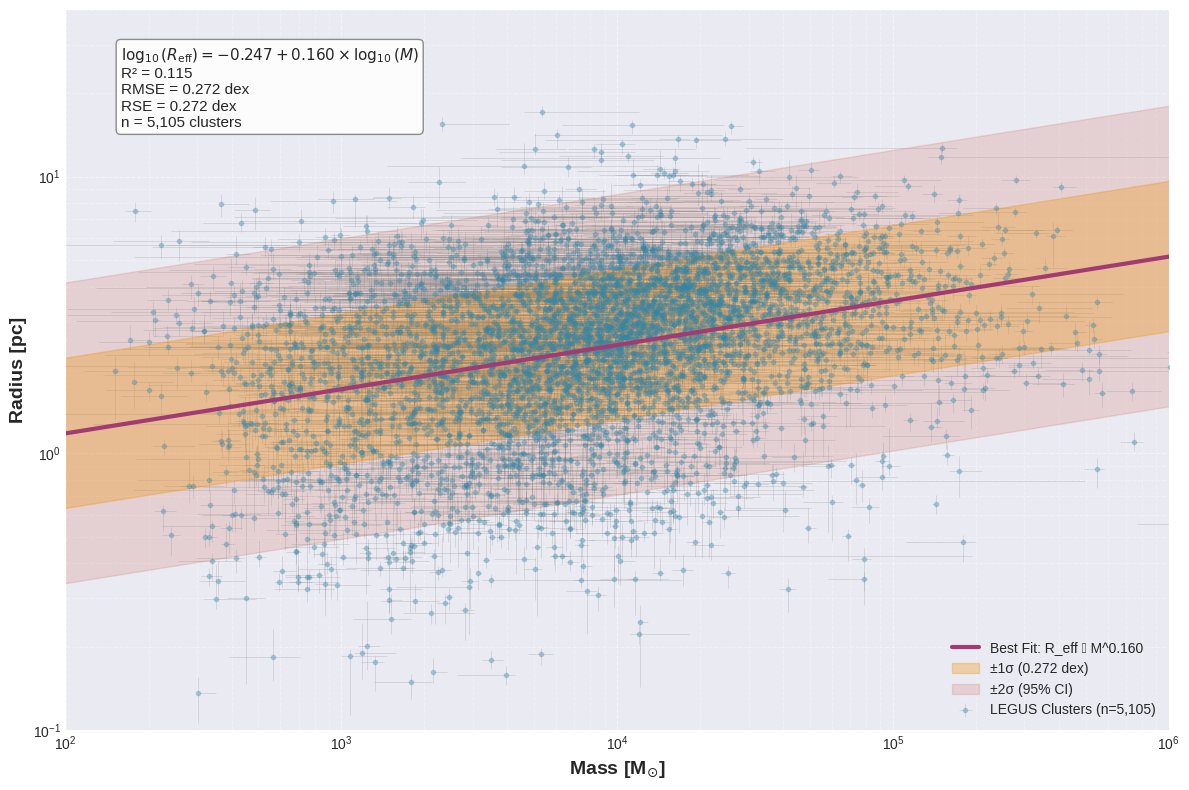

/tmp/ipython-input-2628943175.py:222: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2628943175.py:222: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


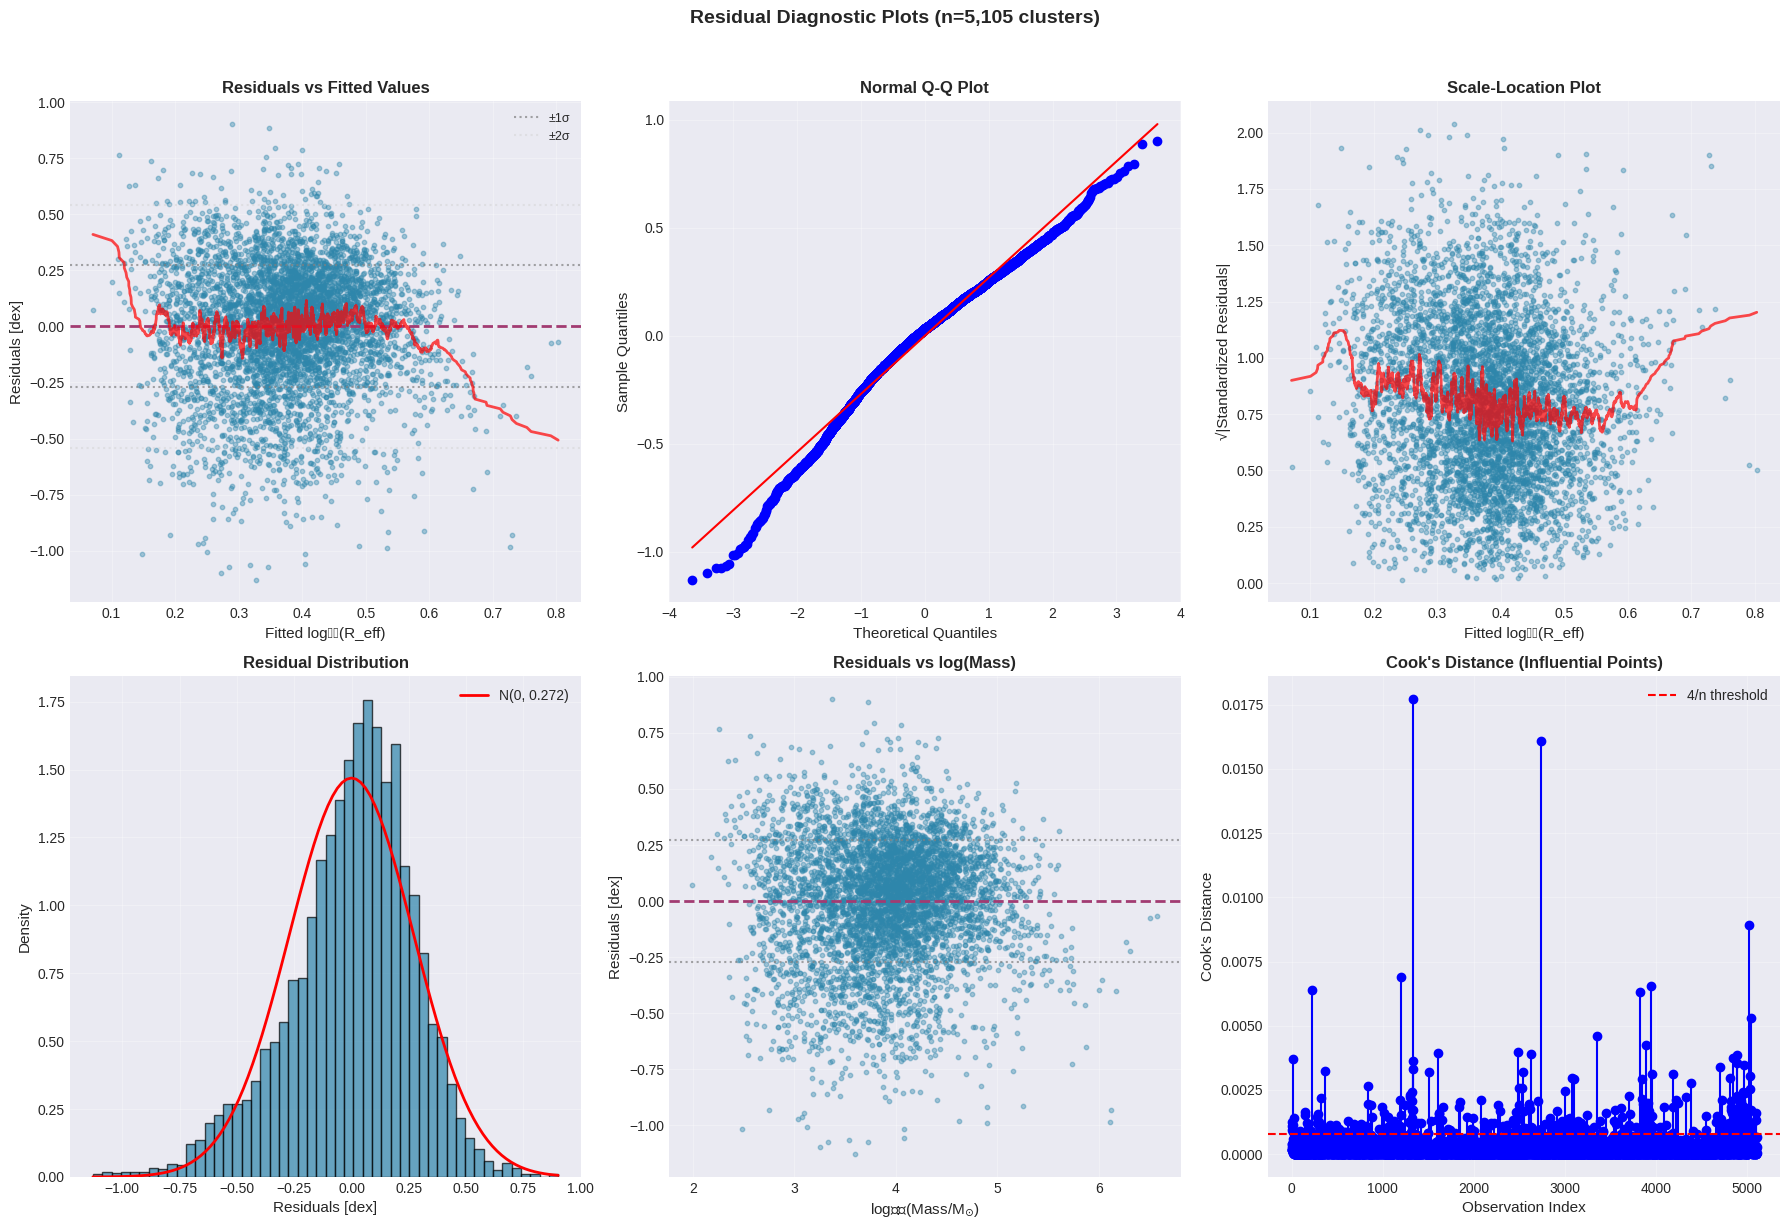


STATISTICAL TESTS

Shapiro-Wilk Test for Normality (n=5000):
  Statistic: 0.9801
  p-value: 0.0000
  Conclusion: Residuals deviate from normality (α=0.05)

Breusch-Pagan Test for Heteroscedasticity:
  Statistic: 54.5329
  p-value: 0.0000
  Conclusion: Non-constant variance (heteroscedastic) (α=0.05)

Durbin-Watson Test for Autocorrelation:
  Statistic: 1.6497
  Conclusion: No significant autocorrelation

RESIDUAL SUMMARY STATISTICS
  Mean: -0.000000
  Median: 0.0315
  Std Dev: 0.2716
  Min: -1.1282
  Max: 0.9016
  Skewness: -0.5672
  Kurtosis: 0.6566

MODEL PREDICTIONS AT REPRESENTATIVE MASSES

M = 10^3 M☉:
  Predicted R_eff = 1.705 pc
  68% CI: [0.912, 3.186] pc
  95% CI: [0.488, 5.955] pc

M = 10^4 M☉:
  Predicted R_eff = 2.462 pc
  68% CI: [1.317, 4.602] pc
  95% CI: [0.705, 8.601] pc

M = 10^5 M☉:
  Predicted R_eff = 3.556 pc
  68% CI: [1.903, 6.646] pc
  95% CI: [1.018, 12.423] pc

M = 10^6 M☉:
  Predicted R_eff = 5.136 pc
  68% CI: [2.748, 9.600] pc
  95% CI: [1.470, 17.943] pc


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import seaborn as sns

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the catalog data (YOUR EXACT CODE)
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for linear regression
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)  # Independent variable (log of mass)
y = np.log10(subset["r_eff_pc"])  # Dependent variable (log of radius)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_mass, y)

# Get predictions and calculate metrics
y_pred = model.predict(X_mass)
residuals = y - y_pred

# Calculate model metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
rse = np.std(residuals)
n = len(y)

# Extract model parameters
intercept = model.intercept_
slope = model.coef_[0]

print("=" * 70)
print(f"MASS-ONLY MODEL RESULTS - LEGUS CATALOG")
print("=" * 70)
print(f"Dataset Size: {n:,} clusters with reliable measurements")
print(f"\nFitted Equation: log₁₀(R_eff) = {intercept:.4f} + {slope:.4f} × log₁₀(Mass)")
print(f"Power Law Form: R_eff ≈ {10**intercept:.4f} × M^{slope:.4f}")
print("\nModel Performance Metrics:")
print(f"  • R²: {r2:.4f}")
print(f"  • RMSE: {rmse:.4f} dex")
print(f"  • MAE: {mae:.4f} dex")
print(f"  • Residual Std Error: {rse:.4f} dex")
print("=" * 70)

# Create the main plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all data points with error bars
ax.errorbar(subset["mass_msun"], subset["r_eff_pc"],
            xerr=[subset["mass_msun_e-"], subset["mass_msun_e+"]],
            yerr=[subset["r_eff_pc_e-"], subset["r_eff_pc_e+"]],
            fmt='o', markersize=3, alpha=0.3, color='#2E86AB',
            ecolor='gray', elinewidth=0.5, capsize=0,
            label=f'LEGUS Clusters (n={n:,})', rasterized=True)

# Create model line
mass_range = [subset["mass_msun"].min(), subset["mass_msun"].max()]
log_mass_range = np.log10(mass_range)
mass_model = np.logspace(log_mass_range[0], log_mass_range[1], 200)
log_mass_model = np.log10(mass_model)
log_radius_model = intercept + slope * log_mass_model
radius_model = 10**log_radius_model

# Plot the best-fit line
ax.plot(mass_model, radius_model,
        color='#A23B72', linewidth=3,
        label=f'Best Fit: R_eff ∝ M^{slope:.3f}', zorder=5)

# Add 1-sigma prediction bands (68% confidence)
radius_upper_1sig = 10**(log_radius_model + rse)
radius_lower_1sig = 10**(log_radius_model - rse)

ax.fill_between(mass_model, radius_lower_1sig, radius_upper_1sig,
                 alpha=0.3, color='#F18F01',
                 label=f'±1σ ({rse:.3f} dex)', zorder=2)

# Add 2-sigma prediction bands (95% confidence)
radius_upper_2sig = 10**(log_radius_model + 2*rse)
radius_lower_2sig = 10**(log_radius_model - 2*rse)

ax.fill_between(mass_model, radius_lower_2sig, radius_upper_2sig,
                 alpha=0.15, color='#C73E1D',
                 label='±2σ (95% CI)', zorder=1)

# Set log scales
ax.set_xscale('log')
ax.set_yscale('log')

# Set axis limits based on Brown & Gnedin (2021) paper
ax.set_xlim(1e2, 1e6)
ax.set_ylim(0.1, 40)

# Labels and title
ax.set_xlabel('Mass [M$_{\odot}$]', fontsize=14, fontweight='bold')
ax.set_ylabel('Radius [pc]', fontsize=14, fontweight='bold')
#ax.set_title('Star Cluster Radius-Mass Relation (LEGUS Survey)', fontsize=16, fontweight='bold', pad=20)

# Add equation and statistics text box
equation_text = f'$\\log_{{10}}(R_{{\\rm eff}}) = {intercept:.3f} + {slope:.3f} \\times \\log_{{10}}(M)$'
stats_text = (f'R² = {r2:.3f}\n'
              f'RMSE = {rmse:.3f} dex\n'
              f'RSE = {rse:.3f} dex\n'
              f'n = {n:,} clusters')
textbox = equation_text + '\n' + stats_text

ax.text(0.05, 0.95, textbox, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

# Customize grid
ax.grid(True, which='both', alpha=0.3, linestyle='--')
ax.grid(True, which='major', alpha=0.5)

# Legend
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)

# Adjust layout
plt.tight_layout()
plt.show()

# Create comprehensive residual analysis
fig2, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Residuals vs Fitted Values
ax1 = axes[0, 0]
ax1.scatter(y_pred, residuals, alpha=0.4, s=10, color='#2E86AB')
ax1.axhline(y=0, color='#A23B72', linestyle='--', linewidth=2)
ax1.axhline(y=rse, color='gray', linestyle=':', alpha=0.7, label='±1σ')
ax1.axhline(y=-rse, color='gray', linestyle=':', alpha=0.7)
ax1.axhline(y=2*rse, color='lightgray', linestyle=':', alpha=0.5, label='±2σ')
ax1.axhline(y=-2*rse, color='lightgray', linestyle=':', alpha=0.5)
ax1.set_xlabel('Fitted log₁₀(R_eff)', fontsize=11)
ax1.set_ylabel('Residuals [dex]', fontsize=11)
ax1.set_title('Residuals vs Fitted Values', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)

# Add LOWESS smoothing
from scipy.signal import savgol_filter
sorted_idx = np.argsort(y_pred)
window_length = min(101, max(5, len(residuals)//50)*2+1)  # Ensure odd window
if len(residuals) > window_length:
    smoothed = savgol_filter(residuals[sorted_idx], window_length=window_length, polyorder=3)
    ax1.plot(y_pred[sorted_idx], smoothed, color='red', linewidth=2, alpha=0.7, label='LOWESS')

# 2. Q-Q plot for normality
ax2 = axes[0, 1]
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot', fontsize=12, fontweight='bold')
ax2.set_xlabel('Theoretical Quantiles', fontsize=11)
ax2.set_ylabel('Sample Quantiles', fontsize=11)
ax2.grid(True, alpha=0.3)

# 3. Scale-Location plot
ax3 = axes[0, 2]
standardized_residuals = residuals / rse
sqrt_abs_resid = np.sqrt(np.abs(standardized_residuals))
ax3.scatter(y_pred, sqrt_abs_resid, alpha=0.4, s=10, color='#2E86AB')
if len(residuals) > window_length:
    smoothed_sqrt = savgol_filter(sqrt_abs_resid[sorted_idx], window_length=window_length, polyorder=3)
    ax3.plot(y_pred[sorted_idx], smoothed_sqrt, color='red', linewidth=2, alpha=0.7)
ax3.set_xlabel('Fitted log₁₀(R_eff)', fontsize=11)
ax3.set_ylabel('√|Standardized Residuals|', fontsize=11)
ax3.set_title('Scale-Location Plot', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Histogram of residuals
ax4 = axes[1, 0]
n_bins = min(50, max(20, int(np.sqrt(n))))
counts, bins, patches = ax4.hist(residuals, bins=n_bins, density=True, alpha=0.7,
                                  color='#2E86AB', edgecolor='black')
# Overlay normal distribution
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
ax4.plot(x_norm, stats.norm.pdf(x_norm, 0, rse), 'r-', linewidth=2, label=f'N(0, {rse:.3f})')
ax4.set_xlabel('Residuals [dex]', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('Residual Distribution', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Residuals vs Log(Mass)
ax5 = axes[1, 1]
ax5.scatter(X_mass.flatten(), residuals, alpha=0.4, s=10, color='#2E86AB')
ax5.axhline(y=0, color='#A23B72', linestyle='--', linewidth=2)
ax5.axhline(y=rse, color='gray', linestyle=':', alpha=0.7)
ax5.axhline(y=-rse, color='gray', linestyle=':', alpha=0.7)
ax5.set_xlabel('log₁₀(Mass/M$_{\odot}$)', fontsize=11)
ax5.set_ylabel('Residuals [dex]', fontsize=11)
ax5.set_title('Residuals vs log(Mass)', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Cook's Distance
ax6 = axes[1, 2]
# Calculate Cook's distance
n_params = 2  # intercept and slope
leverage = 1/n + (X_mass.flatten() - X_mass.mean())**2 / np.sum((X_mass.flatten() - X_mass.mean())**2)
cooks_d = (residuals**2 / (n_params * rse**2)) * (leverage / (1 - leverage)**2)
ax6.stem(range(len(cooks_d)), cooks_d, basefmt=' ', markerfmt='o', linefmt='b-')
ax6.axhline(y=4/n, color='red', linestyle='--', label=f'4/n threshold')
ax6.set_xlabel('Observation Index', fontsize=11)
ax6.set_ylabel("Cook's Distance", fontsize=11)
ax6.set_title("Cook's Distance (Influential Points)", fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.suptitle(f'Residual Diagnostic Plots (n={n:,} clusters)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Statistical tests
print("\n" + "=" * 70)
print("STATISTICAL TESTS")
print("=" * 70)

# Shapiro-Wilk test (use subsample if needed)
sample_size = min(5000, len(residuals))
test_residuals = residuals if len(residuals) <= 5000 else np.random.choice(residuals, 5000, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(test_residuals)
print(f"\nShapiro-Wilk Test for Normality (n={sample_size}):")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
print(f"  Conclusion: {'Residuals are normally distributed' if shapiro_p > 0.05 else 'Residuals deviate from normality'} (α=0.05)")

# Breusch-Pagan test
from scipy.stats import chi2
residuals_squared = residuals**2
bp_model = LinearRegression()
bp_model.fit(X_mass, residuals_squared)
bp_pred = bp_model.predict(X_mass)
bp_r2 = r2_score(residuals_squared, bp_pred)
bp_stat = n * bp_r2
bp_p = 1 - chi2.cdf(bp_stat, df=1)
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"  Statistic: {bp_stat:.4f}")
print(f"  p-value: {bp_p:.4f}")
print(f"  Conclusion: {'Constant variance (homoscedastic)' if bp_p > 0.05 else 'Non-constant variance (heteroscedastic)'} (α=0.05)")

# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson Test for Autocorrelation:")
print(f"  Statistic: {dw_stat:.4f}")
if dw_stat < 1.5:
    print(f"  Conclusion: Positive autocorrelation detected")
elif dw_stat > 2.5:
    print(f"  Conclusion: Negative autocorrelation detected")
else:
    print(f"  Conclusion: No significant autocorrelation")

# Summary statistics
print("\n" + "=" * 70)
print("RESIDUAL SUMMARY STATISTICS")
print("=" * 70)
print(f"  Mean: {np.mean(residuals):.6f}")
print(f"  Median: {np.median(residuals):.4f}")
print(f"  Std Dev: {np.std(residuals):.4f}")
print(f"  Min: {np.min(residuals):.4f}")
print(f"  Max: {np.max(residuals):.4f}")
print(f"  Skewness: {stats.skew(residuals):.4f}")
print(f"  Kurtosis: {stats.kurtosis(residuals):.4f}")

# Print predictions at key masses
print("\n" + "=" * 70)
print("MODEL PREDICTIONS AT REPRESENTATIVE MASSES")
print("=" * 70)
for log_m in [3, 4, 5, 6]:
    m = 10**log_m
    log_r_pred = intercept + slope * log_m
    r_pred = 10**log_r_pred
    r_lower_68 = 10**(log_r_pred - rse)
    r_upper_68 = 10**(log_r_pred + rse)
    r_lower_95 = 10**(log_r_pred - 2*rse)
    r_upper_95 = 10**(log_r_pred + 2*rse)
    print(f"\nM = 10^{log_m} M☉:")
    print(f"  Predicted R_eff = {r_pred:.3f} pc")
    print(f"  68% CI: [{r_lower_68:.3f}, {r_upper_68:.3f}] pc")
    print(f"  95% CI: [{r_lower_95:.3f}, {r_upper_95:.3f}] pc")
print("=" * 70)

<>:88: SyntaxWarning: invalid escape sequence '\o'
<>:88: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2480541232.py:88: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('Mass [M$_{\odot}$]', fontweight='bold')


Mass-Only Model: log₁₀(R_eff) = -0.247 + 0.160 × log₁₀(M)
R² = 0.115, RSE = 0.272 dex, n = 5,105 clusters


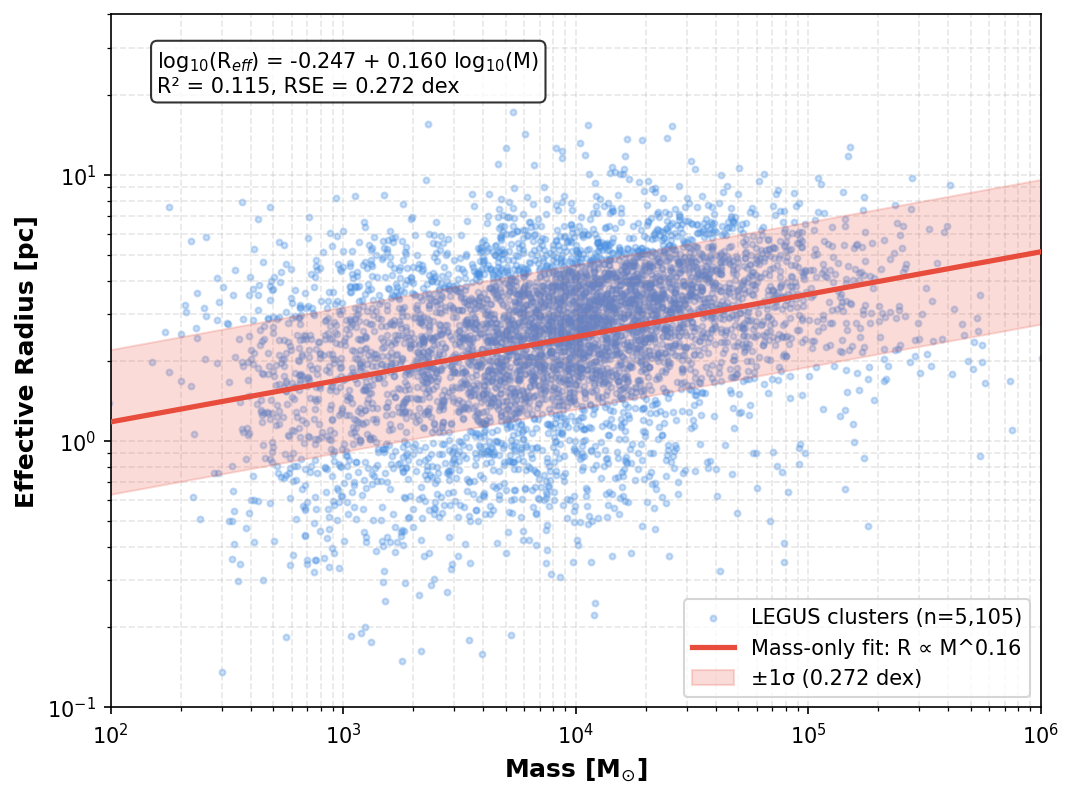

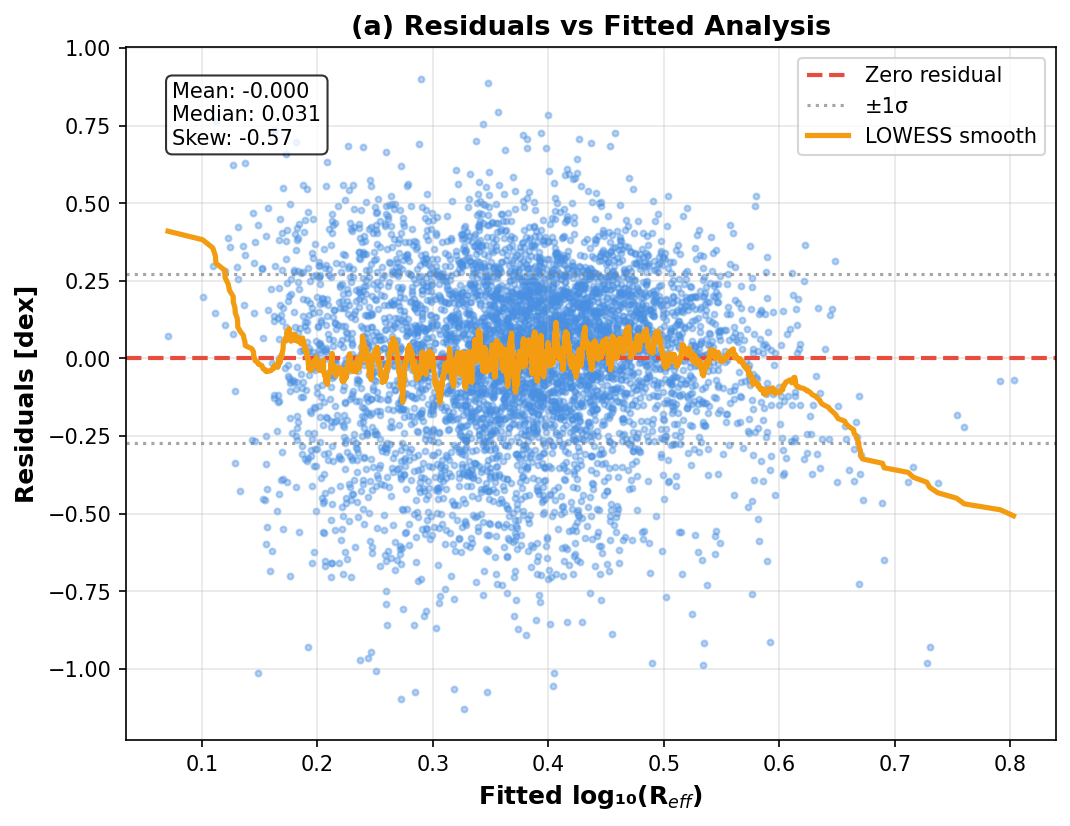


Breusch-Pagan test p-value: 0.0000
Heteroscedasticity: Yes


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from scipy.signal import savgol_filter

# Set publication-quality style
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 150

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare data for regression
X_mass = np.log10(subset["mass_msun"]).reshape(-1, 1)
y = np.log10(subset["r_eff_pc"])

# Fit the mass-only model
model = LinearRegression()
model.fit(X_mass, y)
y_pred = model.predict(X_mass)

# Calculate metrics
residuals = y - y_pred
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
rse = np.std(residuals)
n = len(y)

# Extract parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Mass-Only Model: log₁₀(R_eff) = {intercept:.3f} + {slope:.3f} × log₁₀(M)")
print(f"R² = {r2:.3f}, RSE = {rse:.3f} dex, n = {n:,} clusters")

# Create figure with two panels
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# ============= PANEL 1: RADIUS-MASS RELATION =============
# Plot data points
ax1.scatter(subset["mass_msun"], subset["r_eff_pc"],
            alpha=0.3, s=8, color='#4A90E2',
            label=f'LEGUS clusters (n={n:,})', rasterized=True)

# Create model line
mass_range = [subset["mass_msun"].min(), subset["mass_msun"].max()]
mass_model = np.logspace(np.log10(mass_range[0]), np.log10(mass_range[1]), 200)
log_mass_model = np.log10(mass_model)
log_radius_model = intercept + slope * log_mass_model
radius_model = 10**log_radius_model

# Plot best-fit line
ax1.plot(mass_model, radius_model,
         color='#E74C3C', linewidth=2.5,
         label=f'Mass-only fit: R ∝ M^{slope:.2f}', zorder=5)

# Add 1-sigma band
radius_upper = 10**(log_radius_model + rse)
radius_lower = 10**(log_radius_model - rse)
ax1.fill_between(mass_model, radius_lower, radius_upper,
                  alpha=0.2, color='#E74C3C',
                  label=f'±1σ ({rse:.3f} dex)', zorder=2)

# Set scales and limits
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.set_ylim(0.1, 40)

# Labels
ax1.set_xlabel('Mass [M$_{\odot}$]', fontweight='bold')
ax1.set_ylabel('Effective Radius [pc]', fontweight='bold')
#ax1.set_title('Radius-Mass Relation', fontweight='bold')

# Add equation box
equation = f'log$_{{10}}$(R$_{{eff}}$) = {intercept:.3f} + {slope:.3f} log$_{{10}}$(M)\nR² = {r2:.3f}, RSE = {rse:.3f} dex'
ax1.text(0.05, 0.95, equation, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, which='both', linestyle='--')

plt.show()

# ============= PANEL 2: RESIDUALS VS FITTED =============
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))
# Plot residuals
ax2.scatter(y_pred, residuals, alpha=0.4, s=8, color='#4A90E2')

# Add reference lines
ax2.axhline(y=0, color='#E74C3C', linestyle='--', linewidth=2, label='Zero residual')
ax2.axhline(y=rse, color='gray', linestyle=':', alpha=0.7, label='±1σ')
ax2.axhline(y=-rse, color='gray', linestyle=':', alpha=0.7)

# Add LOWESS smoothing
sorted_idx = np.argsort(y_pred)
window = min(101, len(residuals)//50*2+1) if len(residuals)//50*2+1 > 5 else 5
if window % 2 == 0:  # Ensure odd window
    window += 1
if len(residuals) > window:
    smoothed = savgol_filter(residuals[sorted_idx], window_length=window, polyorder=3)
    ax2.plot(y_pred[sorted_idx], smoothed,
             color='#F39C12', linewidth=2.5, label='LOWESS smooth')

# Labels
ax2.set_xlabel('Fitted log₁₀(R$_{eff}$)', fontweight='bold')
ax2.set_ylabel('Residuals [dex]', fontweight='bold')
ax2.set_title('(a) Residuals vs Fitted Analysis', fontweight='bold')

# Add statistics box
stats_text = f'Mean: {np.mean(residuals):.3f}\nMedian: {np.median(residuals):.3f}\nSkew: {stats.skew(residuals):.2f}'
ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)


# Final formatting
#plt.suptitle('Mass-Only Model for Star Cluster Radius', fontsize=14, fontweight='bold', y=1.02)
#plt.tight_layout()
plt.show()

# Calculate additional statistics for text
from scipy.stats import chi2
residuals_squared = residuals**2
bp_model = LinearRegression()
bp_model.fit(X_mass, residuals_squared)
bp_r2 = r2_score(residuals_squared, bp_model.predict(X_mass))
bp_stat = n * bp_r2
bp_p = 1 - chi2.cdf(bp_stat, df=1)

print(f"\nBreusch-Pagan test p-value: {bp_p:.4f}")
print(f"Heteroscedasticity: {'Yes' if bp_p < 0.05 else 'No'}")

<>:114: SyntaxWarning: invalid escape sequence '\o'
<>:114: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1184324501.py:114: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('Mass [M$_{\odot}$]', fontweight='bold')


Multivariate Model: log₁₀(R_eff) = -0.422 + 0.131×log₁₀(M) + 0.0002×log₁₀(sSFR) + 0.038×log₁₀(Age)
R² = 0.122, RSE = 0.271 dex, n = 5,105 clusters


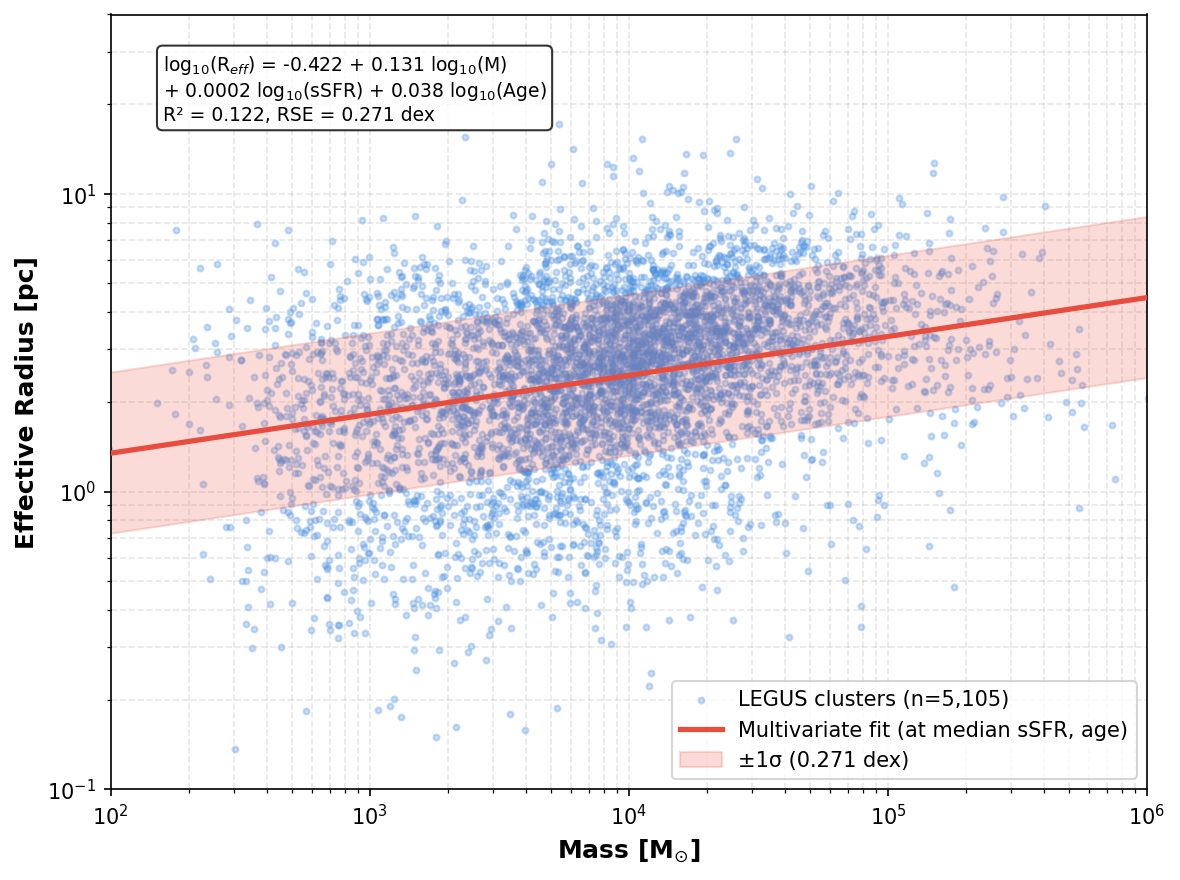

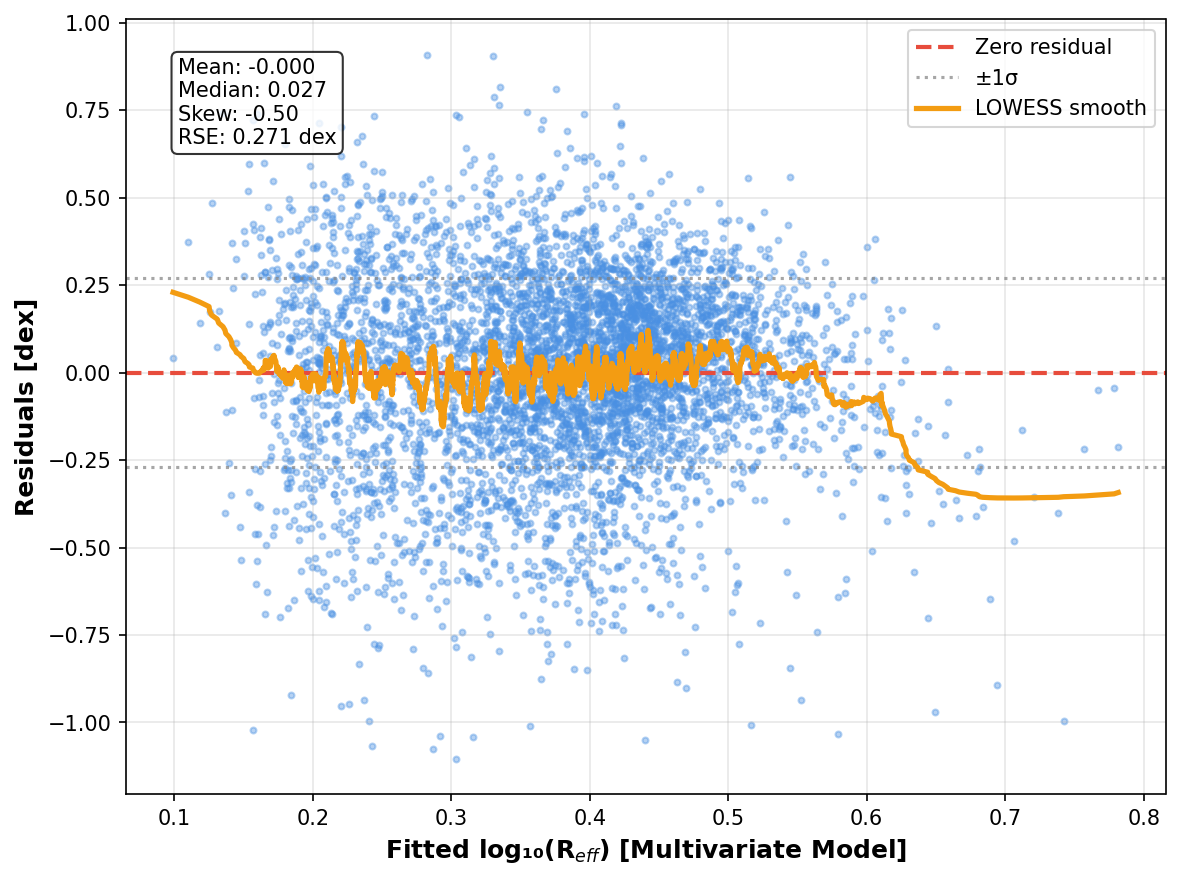

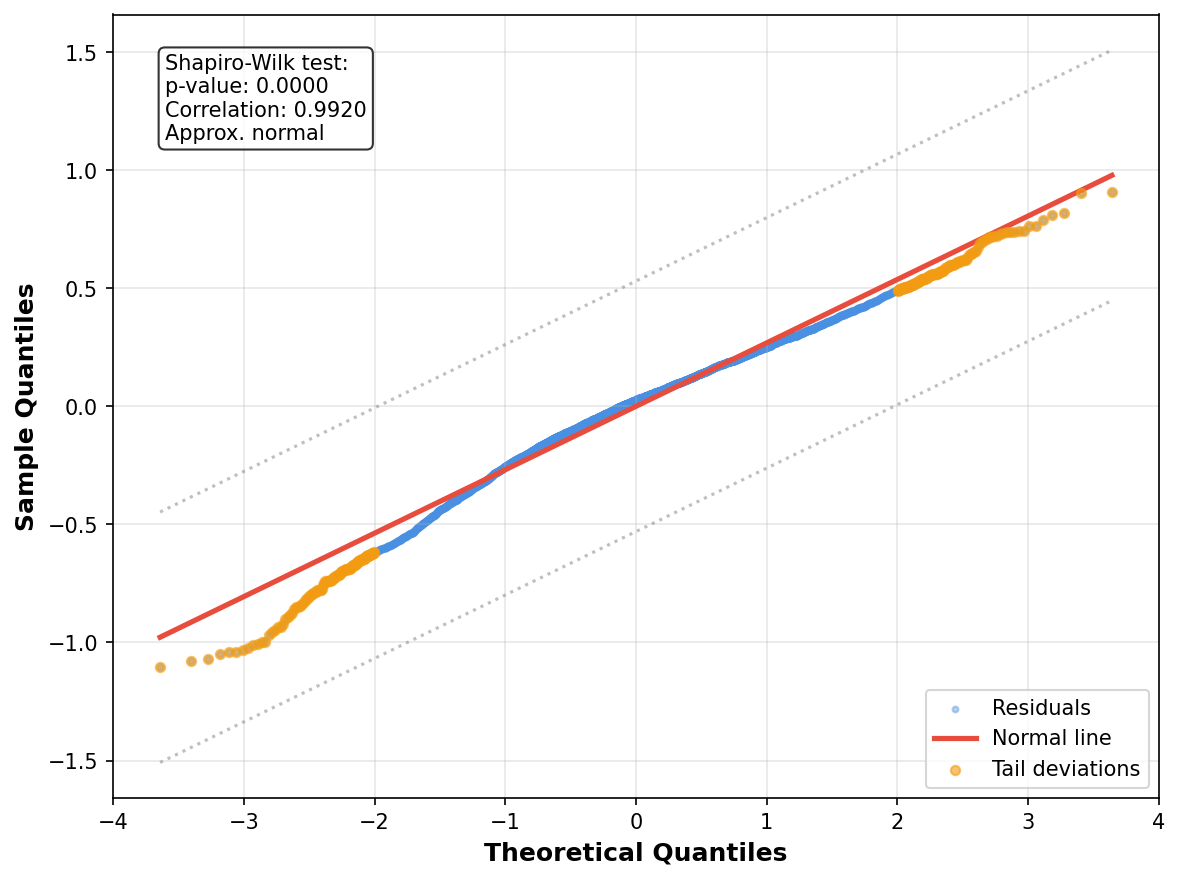


MODEL COMPARISON
Mass-only R²: 0.115
Multivariate R²: 0.122
Improvement: 0.7%

Mass-only RSE: 0.272 dex
Multivariate RSE: 0.271 dex
RSE Reduction: 1.5 millidex

VARIANCE INFLATION FACTORS
 Variable        VIF
log(Mass)  64.673722
log(sSFR)  87.802909
 log(Age) 133.508740


In [ ]:
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from scipy.signal import savgol_filter

# Add this import at the top of the code
import pandas as pd

# The VIF calculation part (already in the code but needs pandas):
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set publication-quality style
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 150

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare data for multivariate regression
# Create feature matrix with log(mass), log(sSFR), log(age)
X_multi = np.column_stack([
    np.log10(subset["mass_msun"]),
    np.log10(subset["galaxy_ssfr"]),  # sSFR from galaxy
    np.log10(subset["age_yr"])
])
y = np.log10(subset["r_eff_pc"])

# Remove any rows with NaN or inf values
valid_mask = np.isfinite(X_multi).all(axis=1) & np.isfinite(y)
X_multi = X_multi[valid_mask]
y = y[valid_mask]
subset_clean = subset[valid_mask]

# Fit the multivariate model
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_pred_multi = model_multi.predict(X_multi)

# Calculate metrics
residuals_multi = y - y_pred_multi
r2_multi = r2_score(y, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y, y_pred_multi))
rse_multi = np.std(residuals_multi)
n = len(y)

# Extract parameters
intercept_multi = model_multi.intercept_
coef_mass, coef_ssfr, coef_age = model_multi.coef_

print(f"Multivariate Model: log₁₀(R_eff) = {intercept_multi:.3f} + {coef_mass:.3f}×log₁₀(M) + {coef_ssfr:.4f}×log₁₀(sSFR) + {coef_age:.3f}×log₁₀(Age)")
print(f"R² = {r2_multi:.3f}, RSE = {rse_multi:.3f} dex, n = {n:,} clusters")

# ============= CHART 1: MULTIVARIATE MODEL FIT =============
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Plot actual vs predicted
ax1.scatter(subset_clean["mass_msun"], subset_clean["r_eff_pc"],
            alpha=0.3, s=8, color='#4A90E2',
            label=f'LEGUS clusters (n={n:,})', rasterized=True)

# For visualization, show the relationship with mass while holding other variables at median
median_ssfr = np.median(X_multi[:, 1])
median_age = np.median(X_multi[:, 2])

# Create prediction line at median values
mass_range = [subset_clean["mass_msun"].min(), subset_clean["mass_msun"].max()]
mass_model = np.logspace(np.log10(mass_range[0]), np.log10(mass_range[1]), 200)
log_mass_model = np.log10(mass_model)

# Predict with median values for other variables
X_pred_line = np.column_stack([
    log_mass_model,
    np.full_like(log_mass_model, median_ssfr),
    np.full_like(log_mass_model, median_age)
])
log_radius_pred = model_multi.predict(X_pred_line)
radius_pred = 10**log_radius_pred

# Plot multivariate fit line
ax1.plot(mass_model, radius_pred,
         color='#E74C3C', linewidth=2.5,
         label=f'Multivariate fit (at median sSFR, age)', zorder=5)

# Add prediction bands
radius_upper = 10**(log_radius_pred + rse_multi)
radius_lower = 10**(log_radius_pred - rse_multi)
ax1.fill_between(mass_model, radius_lower, radius_upper,
                  alpha=0.2, color='#E74C3C',
                  label=f'±1σ ({rse_multi:.3f} dex)', zorder=2)

# Set scales and limits
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.set_ylim(0.1, 40)

# Labels (no title)
ax1.set_xlabel('Mass [M$_{\odot}$]', fontweight='bold')
ax1.set_ylabel('Effective Radius [pc]', fontweight='bold')

# Add equation box
equation = (f'log$_{{10}}$(R$_{{eff}}$) = {intercept_multi:.3f} + {coef_mass:.3f} log$_{{10}}$(M)\n'
           f'+ {coef_ssfr:.4f} log$_{{10}}$(sSFR) + {coef_age:.3f} log$_{{10}}$(Age)\n'
           f'R² = {r2_multi:.3f}, RSE = {rse_multi:.3f} dex')
ax1.text(0.05, 0.95, equation, transform=ax1.transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, which='both', linestyle='--')

plt.tight_layout()
plt.show()

# ============= CHART 2: RESIDUALS VS FITTED (MULTIVARIATE) =============
fig2, ax2 = plt.subplots(figsize=(8, 6))

# Plot residuals
ax2.scatter(y_pred_multi, residuals_multi, alpha=0.4, s=8, color='#4A90E2')

# Add reference lines
ax2.axhline(y=0, color='#E74C3C', linestyle='--', linewidth=2, label='Zero residual')
ax2.axhline(y=rse_multi, color='gray', linestyle=':', alpha=0.7, label='±1σ')
ax2.axhline(y=-rse_multi, color='gray', linestyle=':', alpha=0.7)

# Add LOWESS smoothing
sorted_idx = np.argsort(y_pred_multi)
window = min(101, len(residuals_multi)//50*2+1) if len(residuals_multi)//50*2+1 > 5 else 5
if window % 2 == 0:  # Ensure odd window
    window += 1
if len(residuals_multi) > window:
    smoothed = savgol_filter(residuals_multi[sorted_idx], window_length=window, polyorder=3)
    ax2.plot(y_pred_multi[sorted_idx], smoothed,
             color='#F39C12', linewidth=2.5, label='LOWESS smooth')

# Labels (no title)
ax2.set_xlabel('Fitted log₁₀(R$_{eff}$) [Multivariate Model]', fontweight='bold')
ax2.set_ylabel('Residuals [dex]', fontweight='bold')

# Add statistics box
stats_text = (f'Mean: {np.mean(residuals_multi):.3f}\n'
             f'Median: {np.median(residuals_multi):.3f}\n'
             f'Skew: {stats.skew(residuals_multi):.2f}\n'
             f'RSE: {rse_multi:.3f} dex')
ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============= CHART 3: Q-Q PLOT (MULTIVARIATE) =============
fig3, ax3 = plt.subplots(figsize=(8, 6))

# Create Q-Q plot
from scipy import stats
(theoretical_quantiles, sample_quantiles), (slope, intercept, r_value) = stats.probplot(residuals_multi, dist="norm", plot=None)

# Plot the Q-Q points
ax3.scatter(theoretical_quantiles, sample_quantiles, alpha=0.4, s=8, color='#4A90E2', label='Residuals')

# Add the ideal diagonal line (perfect normality)
line_x = np.array([theoretical_quantiles.min(), theoretical_quantiles.max()])
line_y = slope * line_x + intercept
ax3.plot(line_x, line_y, color='#E74C3C', linewidth=2.5, label='Normal line', zorder=5)

# Add confidence bands for normal distribution (optional but helpful)
# These show where points should fall if truly normal
from scipy.stats import norm
n = len(residuals_multi)
z_critical = norm.ppf(0.975)  # 95% confidence
std_theoretical = np.std(theoretical_quantiles)
se = slope * std_theoretical * np.sqrt(1/n + (theoretical_quantiles - np.mean(theoretical_quantiles))**2 / np.sum((theoretical_quantiles - np.mean(theoretical_quantiles))**2))

# Plot confidence bands
confidence_upper = sample_quantiles[np.argsort(theoretical_quantiles)] + z_critical * se[np.argsort(theoretical_quantiles)]
confidence_lower = sample_quantiles[np.argsort(theoretical_quantiles)] - z_critical * se[np.argsort(theoretical_quantiles)]
sorted_theoretical = np.sort(theoretical_quantiles)

# Simplified confidence bands (straight lines)
ax3.plot(line_x, line_y + z_critical * rse_multi, 'gray', linestyle=':', alpha=0.5)
ax3.plot(line_x, line_y - z_critical * rse_multi, 'gray', linestyle=':', alpha=0.5)

# Labels (no title)
ax3.set_xlabel('Theoretical Quantiles', fontweight='bold')
ax3.set_ylabel('Sample Quantiles', fontweight='bold')

# Add grid for better readability
ax3.grid(True, alpha=0.3)

# Add statistics box
normality_text = (f'Shapiro-Wilk test:\n'
                  f'p-value: {stats.shapiro(residuals_multi[:min(5000, len(residuals_multi))])[1]:.4f}\n'
                  f'Correlation: {r_value:.4f}\n'
                  f'{"Approx. normal" if r_value > 0.98 else "Deviates from normal"}')

ax3.text(0.05, 0.95, normality_text, transform=ax3.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Highlight deviations in tails with colored regions (optional)
# Lower tail deviation
lower_tail_mask = theoretical_quantiles < -2
if np.any(lower_tail_mask):
    ax3.scatter(theoretical_quantiles[lower_tail_mask], sample_quantiles[lower_tail_mask],
                alpha=0.6, s=20, color='#F39C12', label='Tail deviations', zorder=10)

# Upper tail deviation
upper_tail_mask = theoretical_quantiles > 2
if np.any(upper_tail_mask):
    ax3.scatter(theoretical_quantiles[upper_tail_mask], sample_quantiles[upper_tail_mask],
                alpha=0.6, s=20, color='#F39C12', zorder=10)

ax3.legend(loc='lower right')

plt.tight_layout()
plt.show()

#########

# Compare models
print(f"\n{'='*60}")
print("MODEL COMPARISON")
print(f"{'='*60}")
print(f"Mass-only R²: 0.115")  # From your previous analysis
print(f"Multivariate R²: {r2_multi:.3f}")
print(f"Improvement: {(r2_multi - 0.115)*100:.1f}%")
print(f"\nMass-only RSE: 0.272 dex")  # From your previous analysis
print(f"Multivariate RSE: {rse_multi:.3f} dex")
print(f"RSE Reduction: {(0.272 - rse_multi)*1000:.1f} millidex")

# Calculate VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = ["log(Mass)", "log(sSFR)", "log(Age)"]
vif_data["VIF"] = [variance_inflation_factor(X_multi, i) for i in range(X_multi.shape[1])]

print(f"\n{'='*60}")
print("VARIANCE INFLATION FACTORS")
print(f"{'='*60}")
print(vif_data.to_string(index=False))


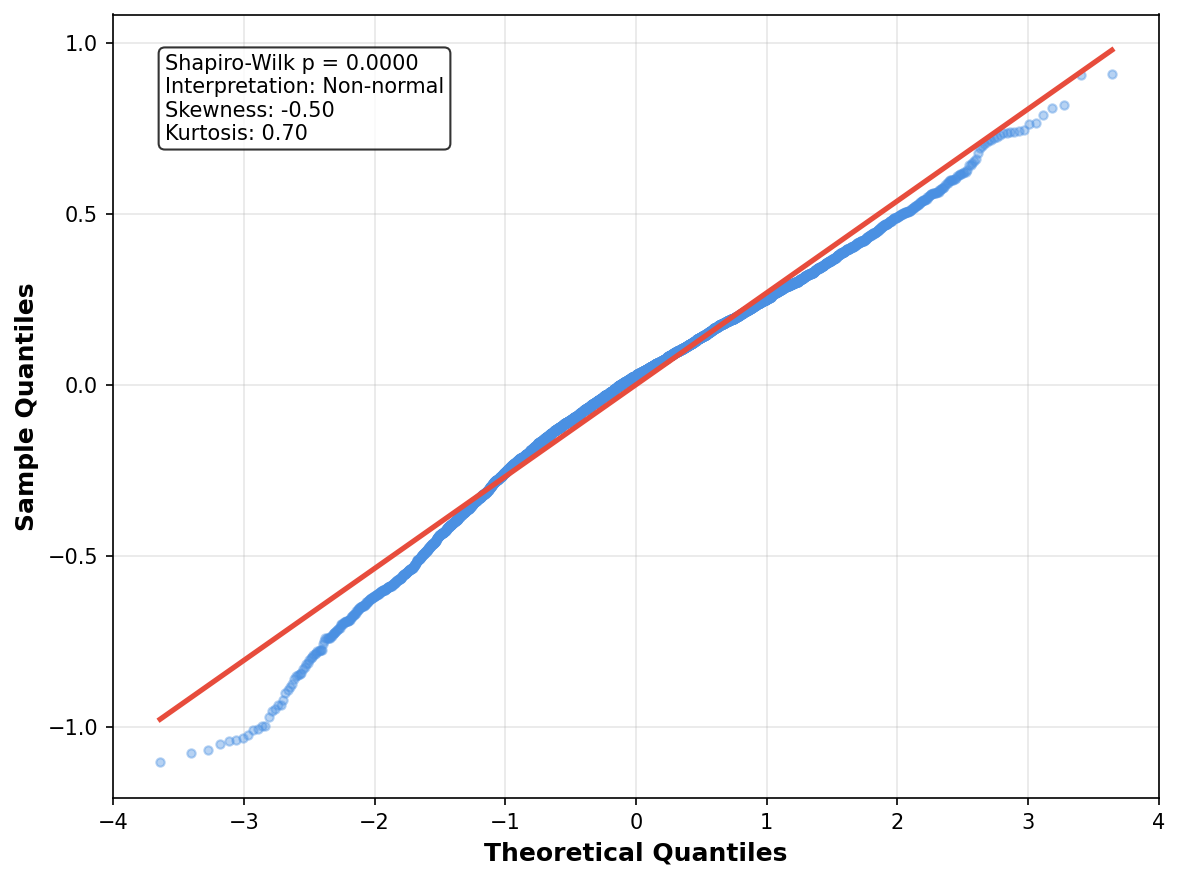

In [ ]:
# ============= CHART 3: Q-Q PLOT - SIMPLE VERSION =============
fig3, ax3 = plt.subplots(figsize=(8, 6))

# Create Q-Q plot using scipy
stats.probplot(residuals_multi, dist="norm", plot=ax3)

# Customize the appearance
ax3.get_lines()[0].set_markerfacecolor('#4A90E2')
ax3.get_lines()[0].set_markeredgecolor('#4A90E2')
ax3.get_lines()[0].set_markersize(4)
ax3.get_lines()[0].set_alpha(0.4)
ax3.get_lines()[1].set_color('#E74C3C')
ax3.get_lines()[1].set_linewidth(2.5)

# Labels (no title)
ax3.set_xlabel('Theoretical Quantiles', fontweight='bold')
ax3.set_ylabel('Sample Quantiles', fontweight='bold')
ax3.set_title('')  # Remove default title

# Add grid
ax3.grid(True, alpha=0.3)

# Add interpretation text
shapiro_stat, shapiro_p = stats.shapiro(residuals_multi[:min(5000, len(residuals_multi))])
interpretation = "Normal" if shapiro_p > 0.05 else "Non-normal"

stats_text = (f'Shapiro-Wilk p = {shapiro_p:.4f}\n'
              f'Interpretation: {interpretation}\n'
              f'Skewness: {stats.skew(residuals_multi):.2f}\n'
              f'Kurtosis: {stats.kurtosis(residuals_multi):.2f}')

ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score

#*****************
#METHOD1
#*****************
# Remove any rows with missing values
# Create mask for non-missing values
valid_mask = (
    ~np.isnan(subset["mass_msun"]) &
    ~np.isnan(subset["galaxy_ssfr"]) &
    ~np.isnan(subset["age_yr"]) &
    ~np.isnan(subset["r_eff_pc"]) &
    (subset["mass_msun"] > 0) &  # Ensure positive values for log
    (subset["galaxy_ssfr"] > 0) &
    (subset["age_yr"] > 0) &
    (subset["r_eff_pc"] > 0)
)

# Apply the mask
subset_clean = subset[valid_mask]
print(f"\nOriginal subset size: {len(subset)}")
print(f"After removing missing/invalid values: {len(subset_clean)}")

# Recreate X and y with clean data
X = np.column_stack((
    np.log10(subset_clean["mass_msun"]),
    np.log10(subset_clean["galaxy_ssfr"]),
    np.log10(subset_clean["age_yr"])
))
y = np.log10(subset_clean["r_eff_pc"])

# Check for any remaining NaN or infinite values
print(f"\nAny NaN in X: {np.any(np.isnan(X))}")
print(f"Any infinite in X: {np.any(np.isinf(X))}")
print(f"Any NaN in y: {np.any(np.isnan(y))}")
print(f"Any infinite in y: {np.any(np.isinf(y))}")

# If there are still issues, remove them
mask_final = ~(np.isnan(X).any(axis=1) | np.isinf(X).any(axis=1) | np.isnan(y) | np.isinf(y))
X_clean = X[mask_final]
y_clean = y[mask_final]

print(f"Final sample size: {len(X_clean)}")

# Now proceed with the analysis using X_clean and y_clean
# =========================================================

# Table 1 - Regression Coefficients
print("\n" + "="*50)
print("TABLE 1: REGRESSION COEFFICIENTS")
print("="*50)

# Fit model with statsmodels for detailed statistics
X_with_const = sm.add_constant(X_clean)
model_sm = sm.OLS(y_clean, X_with_const).fit()
print(model_sm.summary())


# Table 2 - VIF Calculation
print("\n" + "="*50)
print("TABLE 2: MULTICOLLINEARITY DIAGNOSTICS")
print("="*50)

# Create DataFrame for VIF calculation
X_df = pd.DataFrame(X_clean, columns=['log_Mass', 'log_sSFR', 'log_Age'])

# Calculate VIF - Alternative method that handles issues better
from sklearn.linear_model import LinearRegression

vif_values = []
for i in range(X_df.shape[1]):
    # Get all columns except i
    X_temp = X_df.drop(X_df.columns[i], axis=1)
    y_temp = X_df.iloc[:, i]

    # Fit regression
    reg = LinearRegression()
    reg.fit(X_temp, y_temp)
    r_squared = reg.score(X_temp, y_temp)

    # Calculate VIF
    vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
    vif_values.append(vif)

# Create VIF table
vif_data = pd.DataFrame({
    'Variable': X_df.columns,
    'VIF': vif_values,
    'Tolerance': [1/v if v != np.inf else 0 for v in vif_values]
})
print("\nVIF Values:")
print(vif_data)

# Correlation matrix



Original subset size: 5105
After removing missing/invalid values: 5105

Any NaN in X: False
Any infinite in X: False
Any NaN in y: False
Any infinite in y: False
Final sample size: 5105

TABLE 1: REGRESSION COEFFICIENTS
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     236.3
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          1.53e-143
Time:                        22:59:52   Log-Likelihood:                -569.66
No. Observations:                5105   AIC:                             1147.
Df Residuals:                    5101   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                               

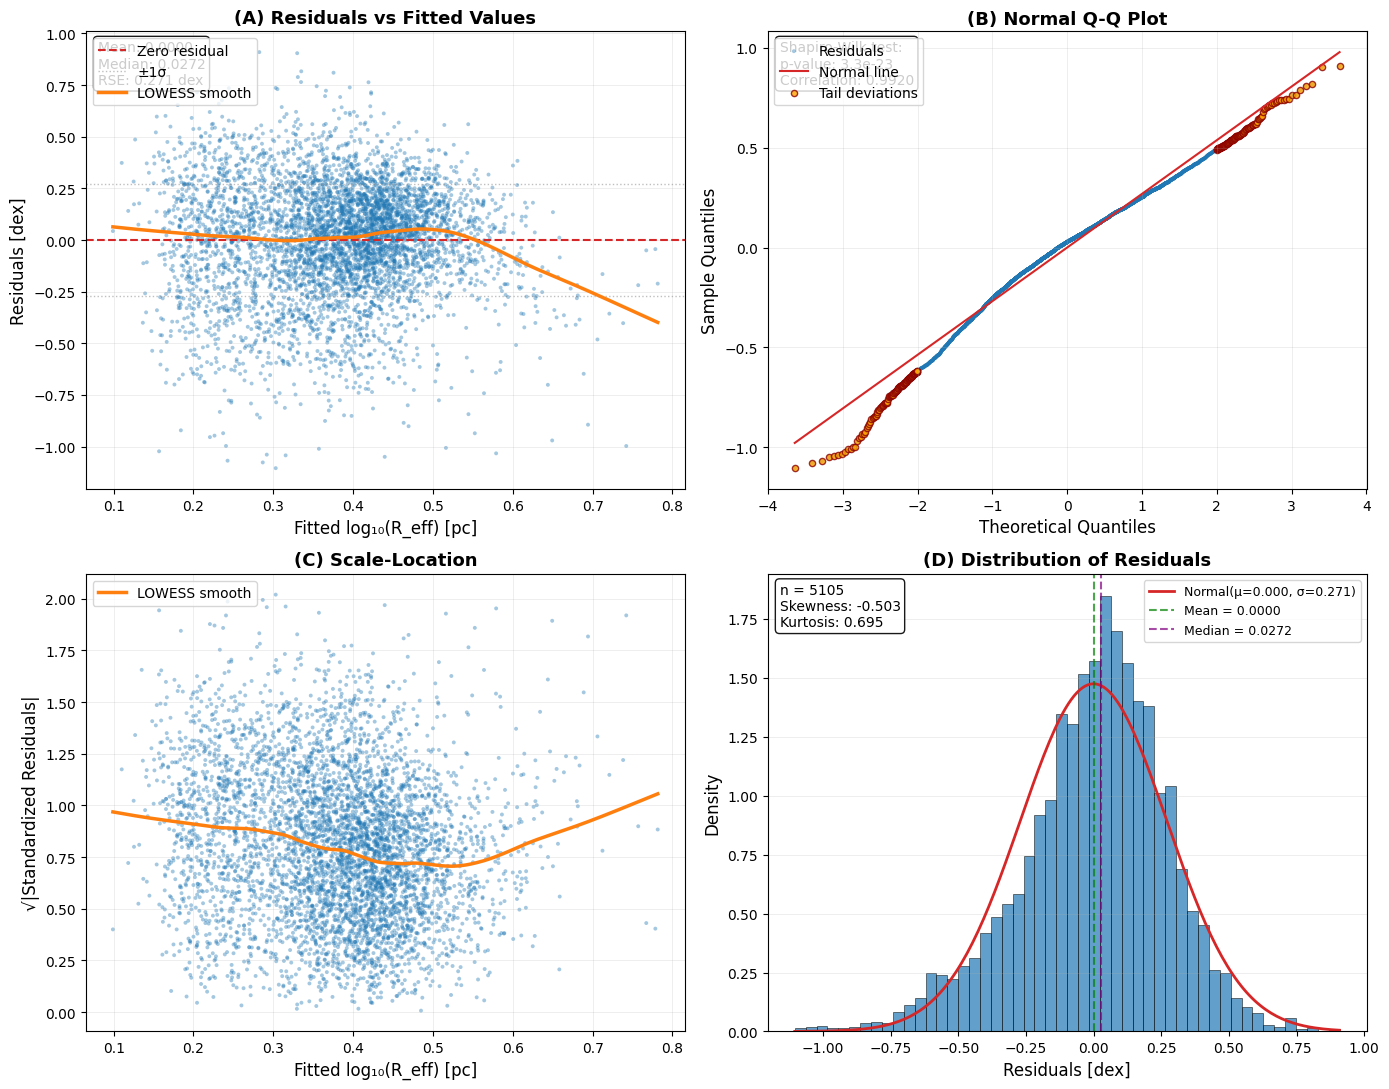

FULL MODEL RESIDUAL DIAGNOSTICS SUMMARY

Model Information:
Number of observations: 5105
Number of predictors: 3 (log_mass, log_sSFR, log_age)
R-squared: 0.1220
Adjusted R-squared: 0.1215

Residual Statistics:
Residual Standard Error (RSE): 0.2705 dex
Mean of residuals: 0.000000
Median of residuals: 0.027195
Min residual: -1.1041
Max residual: 0.9092

Normality Tests:
Shapiro-Wilk p-value: 3.2528e-23
Q-Q correlation: 0.9920
Skewness: -0.5028 (skewed)
Kurtosis: 0.6953 (approx. normal)

Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 206.7503
p-value: 0.0000
Interpretation: Evidence of heteroscedasticity (p < 0.05)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
from astropy import table
import statsmodels.api as sm

# Your existing data loading code
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare the data for multivariate linear regression
X_data = np.column_stack((
    np.log10(subset["mass_msun"]),
    np.log10(subset["galaxy_ssfr"]),
    np.log10(subset["age_yr"])
))
y_data = np.log10(subset["r_eff_pc"])

# Create DataFrame
df = pd.DataFrame({
    'log_mass': X_data[:, 0],
    'log_sSFR': X_data[:, 1],
    'log_age': X_data[:, 2],
    'log_radius': y_data
})

# Remove any rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Prepare X and y for statsmodels
X = df[['log_mass', 'log_sSFR', 'log_age']]
y = df['log_radius']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the multivariate linear regression model
model = sm.OLS(y, X_with_const).fit()

# Get predictions and residuals from the statsmodels model
y_pred = model.fittedvalues
residuals = model.resid
standardized_residuals = residuals / np.std(residuals)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))

# Create 4-panel figure
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
#fig.suptitle('Full Multivariate Model: Residual Analysis', fontsize=16, y=1.02)

# Color scheme
point_color = '#1f77b4'  # Nice blue
lowess_color = '#ff7f0e'  # Orange
line_color = '#d62728'    # Red

# Panel A: Residuals vs Fitted with LOWESS
ax1 = axes[0, 0]
ax1.scatter(y_pred, residuals, alpha=0.4, s=8, color=point_color, edgecolors='none')
ax1.axhline(y=0, color=line_color, linestyle='--', linewidth=1.5, label='Zero residual')

# Add ±1σ bounds
ax1.axhline(y=np.std(residuals), color='gray', linestyle=':', linewidth=1, alpha=0.5, label='±1σ')
ax1.axhline(y=-np.std(residuals), color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Add LOWESS smooth line
lowess_result = lowess(residuals, y_pred, frac=0.3)
ax1.plot(lowess_result[:, 0], lowess_result[:, 1], color=lowess_color, linewidth=2.5, label='LOWESS smooth')

ax1.set_xlabel('Fitted log₁₀(R_eff) [pc]', fontsize=12)
ax1.set_ylabel('Residuals [dex]', fontsize=12)
ax1.set_title('(A) Residuals vs Fitted Values', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.legend(loc='upper left', fontsize=10)

# Add statistics text box
stats_text = f'Mean: {np.mean(residuals):.4f}\nMedian: {np.median(residuals):.4f}\nRSE: {np.std(residuals):.3f} dex'
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Panel B: Q-Q Plot
ax2 = axes[0, 1]
(osm, osr), (slope, intercept, r_value) = stats.probplot(residuals, dist="norm", plot=None)
ax2.scatter(osm, osr, alpha=0.4, s=8, color=point_color, edgecolors='none', label='Residuals')
ax2.plot(osm, slope*osm + intercept, color=line_color, linewidth=1.5, label='Normal line')

# Highlight tail deviations
tail_mask = (np.abs(osm) > 2)
if np.any(tail_mask):
    ax2.scatter(osm[tail_mask], osr[tail_mask], alpha=0.8, s=20, color='orange',
                edgecolors='darkred', label='Tail deviations')

ax2.set_xlabel('Theoretical Quantiles', fontsize=12)
ax2.set_ylabel('Sample Quantiles', fontsize=12)
ax2.set_title('(B) Normal Q-Q Plot', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.legend(loc='upper left', fontsize=10)

# Add Shapiro-Wilk test (use subset if data is too large)
test_sample = residuals[:5000] if len(residuals) > 5000 else residuals
shapiro_stat, shapiro_p = stats.shapiro(test_sample)
qq_text = f'Shapiro-Wilk test:\np-value: {shapiro_p:.5f}\nCorrelation: {r_value:.4f}\nApprox. normal' if shapiro_p > 0.05 else f'Shapiro-Wilk test:\np-value: {shapiro_p:.1e}\nCorrelation: {r_value:.4f}'
ax2.text(0.02, 0.98, qq_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Panel C: Scale-Location Plot
ax3 = axes[1, 0]
ax3.scatter(y_pred, sqrt_abs_std_resid, alpha=0.4, s=8, color=point_color, edgecolors='none')

# Add LOWESS smooth for Scale-Location
lowess_scale = lowess(sqrt_abs_std_resid, y_pred, frac=0.3)
ax3.plot(lowess_scale[:, 0], lowess_scale[:, 1], color=lowess_color, linewidth=2.5, label='LOWESS smooth')

ax3.set_xlabel('Fitted log₁₀(R_eff) [pc]', fontsize=12)
ax3.set_ylabel('√|Standardized Residuals|', fontsize=12)
ax3.set_title('(C) Scale-Location', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax3.legend(loc='upper left', fontsize=10)

# Add note about heteroscedasticity
if np.corrcoef(y_pred, sqrt_abs_std_resid)[0,1] > 0.1:
    ax3.text(0.98, 0.98, 'Possible heteroscedasticity', transform=ax3.transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right', color='red',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# Panel D: Histogram of Residuals
ax4 = axes[1, 1]
n, bins, patches = ax4.hist(residuals, bins=50, density=True, alpha=0.7,
                            color=point_color, edgecolor='black', linewidth=0.5)

# Add normal distribution overlay
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 200)
ax4.plot(x, stats.norm.pdf(x, mu, sigma), color=line_color, linewidth=2,
         label=f'Normal(μ={mu:.3f}, σ={sigma:.3f})')

# Add vertical lines for mean and median
ax4.axvline(x=mu, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean = {mu:.4f}')
ax4.axvline(x=np.median(residuals), color='purple', linestyle='--', linewidth=1.5,
            alpha=0.7, label=f'Median = {np.median(residuals):.4f}')

ax4.set_xlabel('Residuals [dex]', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.set_title('(D) Distribution of Residuals', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
ax4.legend(loc='upper right', fontsize=9)

# Add statistics text
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
dist_text = f'n = {len(residuals)}\nSkewness: {skewness:.3f}\nKurtosis: {kurtosis:.3f}'
ax4.text(0.02, 0.98, dist_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

# Print comprehensive diagnostic statistics
print("=" * 60)
print("FULL MODEL RESIDUAL DIAGNOSTICS SUMMARY")
print("=" * 60)
print(f"\nModel Information:")
print(f"Number of observations: {len(residuals)}")
print(f"Number of predictors: 3 (log_mass, log_sSFR, log_age)")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

print(f"\nResidual Statistics:")
print(f"Residual Standard Error (RSE): {np.std(residuals):.4f} dex")
print(f"Mean of residuals: {np.mean(residuals):.6f}")
print(f"Median of residuals: {np.median(residuals):.6f}")
print(f"Min residual: {np.min(residuals):.4f}")
print(f"Max residual: {np.max(residuals):.4f}")

print(f"\nNormality Tests:")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4e}")
print(f"Q-Q correlation: {r_value:.4f}")
print(f"Skewness: {skewness:.4f} {'(approx. symmetric)' if abs(skewness) < 0.5 else '(skewed)'}")
print(f"Kurtosis: {kurtosis:.4f} {'(approx. normal)' if abs(kurtosis) < 1 else '(heavy-tailed)' if kurtosis > 1 else '(light-tailed)'}")

# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X_with_const)
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"p-value: {bp_test[1]:.4f}")
print(f"Interpretation: {'Evidence of heteroscedasticity (p < 0.05)' if bp_test[1] < 0.05 else 'No strong evidence of heteroscedasticity (p ≥ 0.05)'}")

print("\n" + "=" * 60)

# Save the figure if needed
# fig.savefig('/content/drive/MyDrive/colab_files/full_model_residual_analysis.png', dpi=300, bbox_inches='tight')

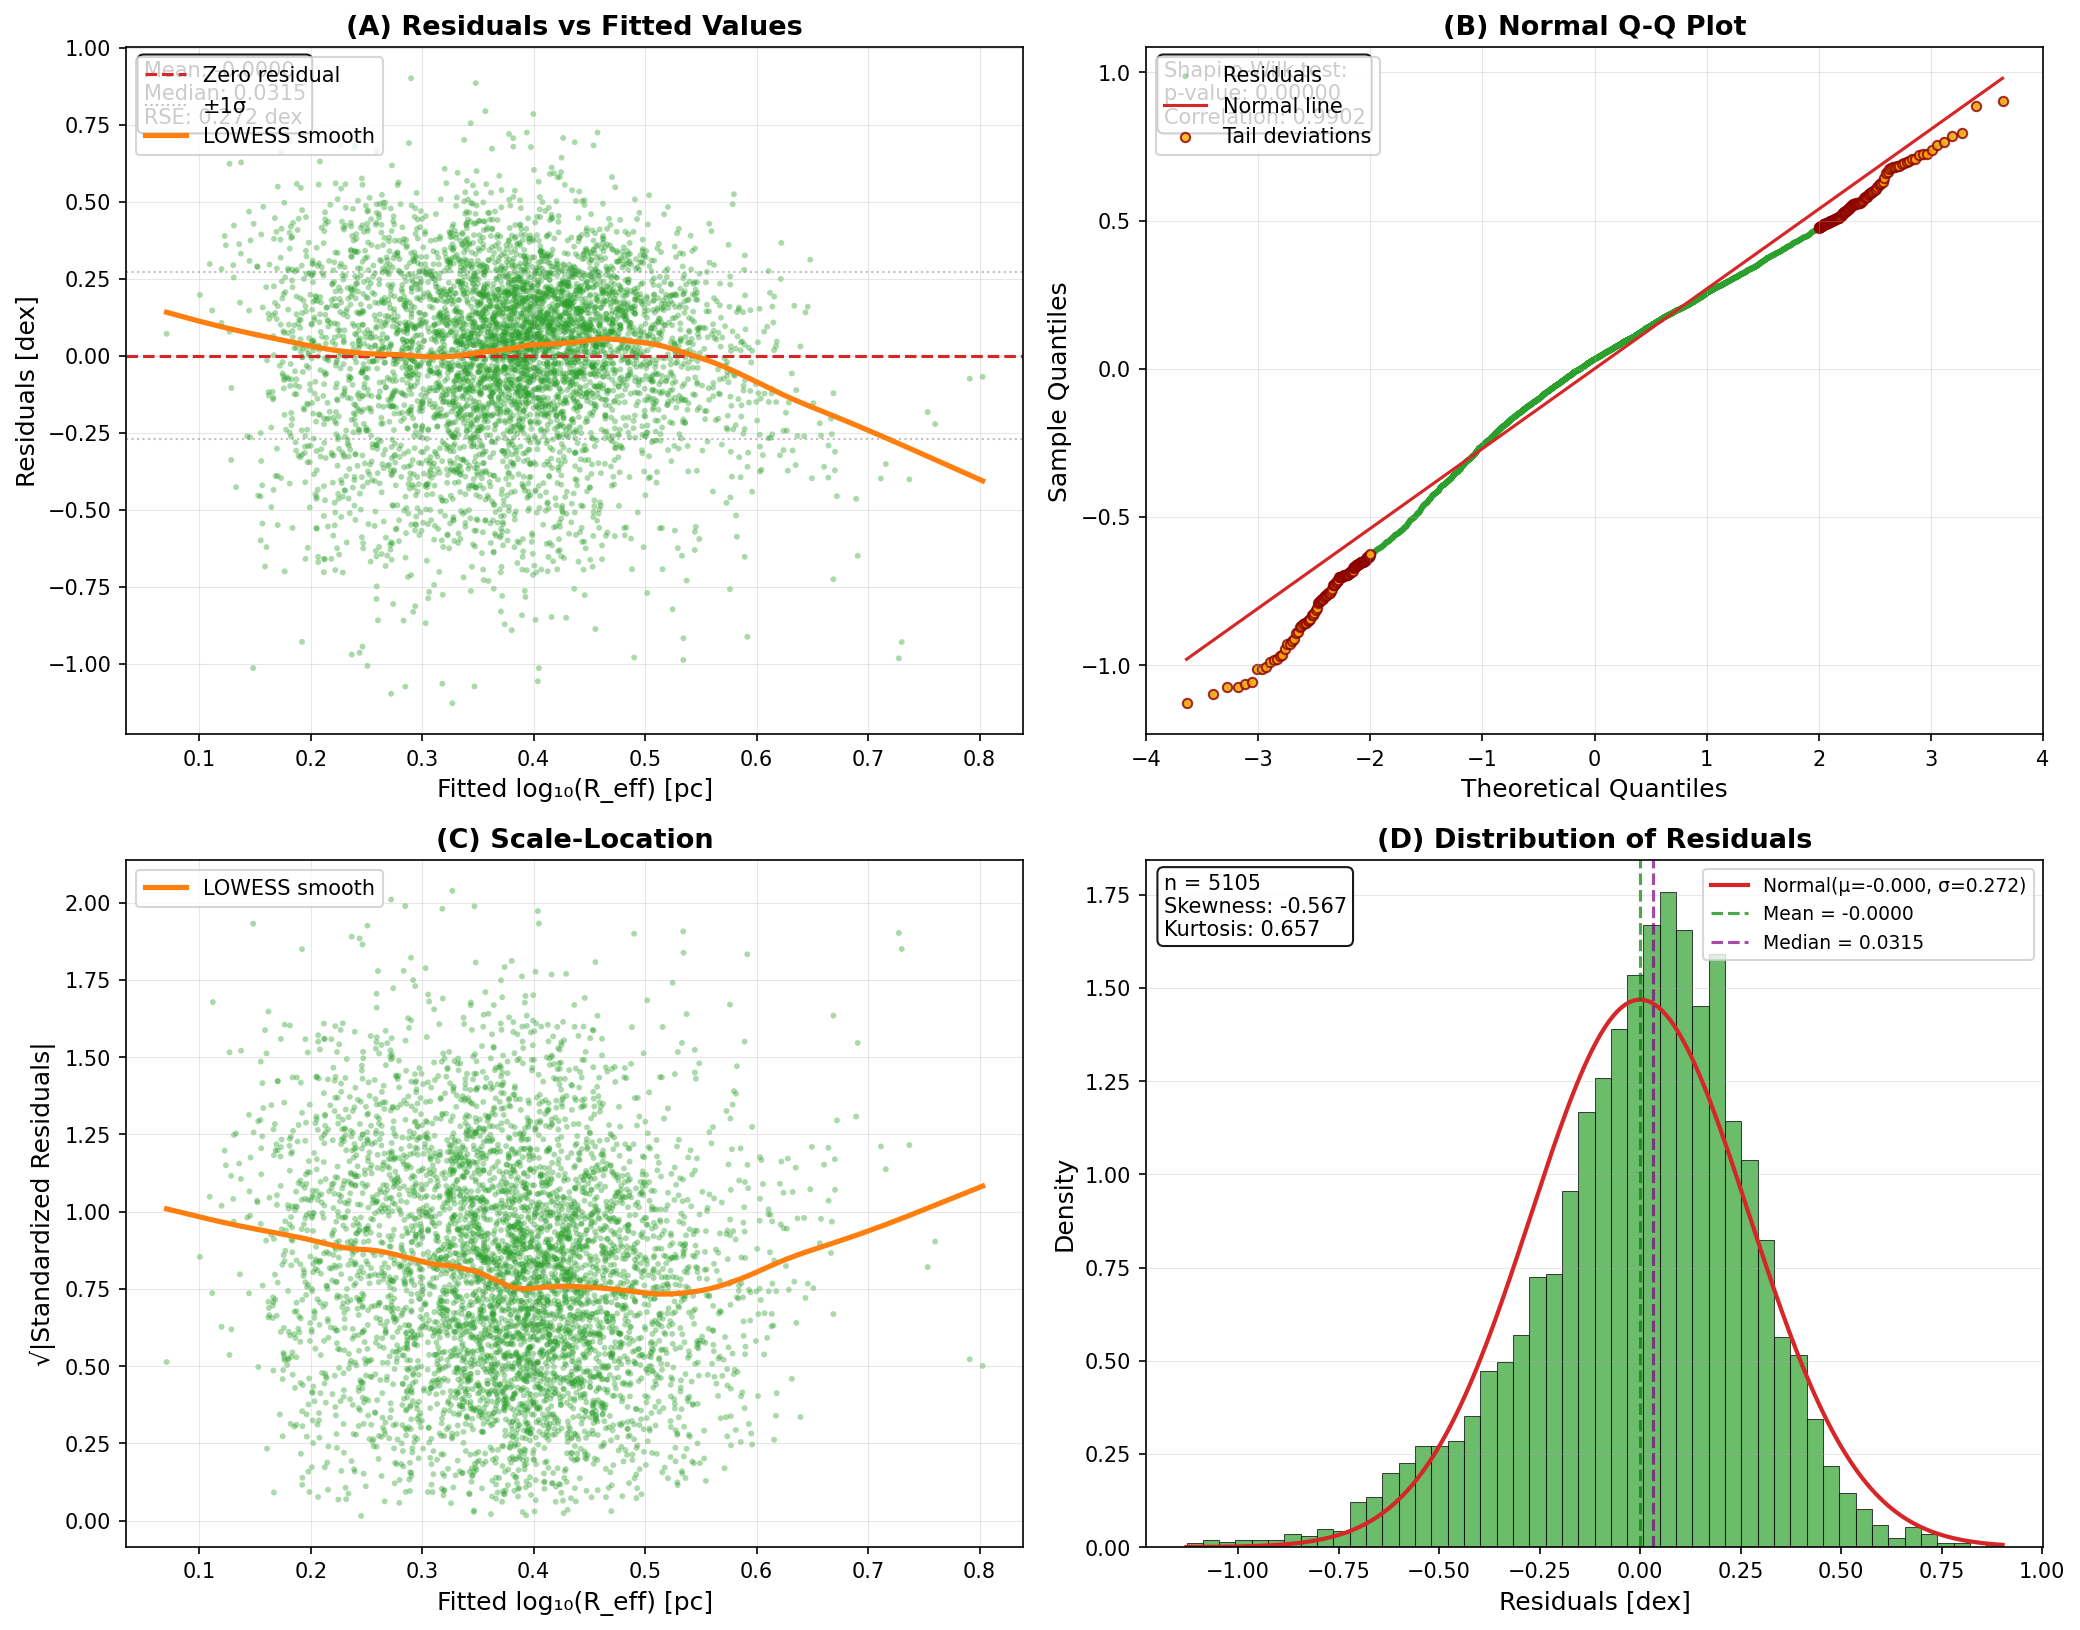

MASS-ONLY MODEL RESIDUAL DIAGNOSTICS SUMMARY

Model Information:
Number of observations: 5105
Number of predictors: 1 (log_mass only)
R-squared: 0.1149
Adjusted R-squared: 0.1147

Residual Statistics:
Residual Standard Error (RSE): 0.2716 dex
Mean of residuals: -0.000000
Median of residuals: 0.031463

Normality Tests:
Shapiro-Wilk p-value: 1.5106e-25
Q-Q correlation: 0.9902
Skewness: -0.5672
Kurtosis: 0.6566

Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 54.5329
p-value: 0.0000
Interpretation: Evidence of heteroscedasticity


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
from astropy import table
import statsmodels.api as sm

# Load the catalog data
catalog = table.Table.read("/content/drive/MyDrive/colab_files/LEGUS-sizes/cluster_data.txt", format="ascii.ecsv")

# Parse the LEGUS mass errors
catalog["mass_msun_e-"] = catalog["mass_msun"] - catalog["mass_msun_min"]
catalog["mass_msun_e+"] = catalog["mass_msun_max"] - catalog["mass_msun"]

# Get the clusters with reliable radii and masses
mask = catalog["reliable_radius"] & catalog["reliable_mass"]
subset = catalog[mask]

# Prepare data for MASS-ONLY model
df_mass = pd.DataFrame({
    'log_mass': np.log10(subset["mass_msun"]),
    'log_radius': np.log10(subset["r_eff_pc"])
})

# Remove any rows with NaN or infinite values
df_mass = df_mass.replace([np.inf, -np.inf], np.nan).dropna()

# Prepare X and y for mass-only model
X_mass = df_mass[['log_mass']]
y_mass = df_mass['log_radius']

# Add constant for intercept
X_mass_const = sm.add_constant(X_mass)

# Fit the MASS-ONLY linear regression model
model_mass = sm.OLS(y_mass, X_mass_const).fit()

# Get predictions and residuals
y_pred_mass = model_mass.fittedvalues
residuals_mass = model_mass.resid
standardized_residuals_mass = residuals_mass / np.std(residuals_mass)
sqrt_abs_std_resid_mass = np.sqrt(np.abs(standardized_residuals_mass))

# Create 4-panel figure for MASS-ONLY model
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
#fig.suptitle('Mass-Only Model: Residual Analysis', fontsize=16, y=1.02)

# Color scheme
point_color = '#2ca02c'  # Green for mass-only
lowess_color = '#ff7f0e'  # Orange
line_color = '#d62728'    # Red

# Panel A: Residuals vs Fitted with LOWESS
ax1 = axes[0, 0]
ax1.scatter(y_pred_mass, residuals_mass, alpha=0.4, s=8, color=point_color, edgecolors='none')
ax1.axhline(y=0, color=line_color, linestyle='--', linewidth=1.5, label='Zero residual')
ax1.axhline(y=np.std(residuals_mass), color='gray', linestyle=':', linewidth=1, alpha=0.5, label='±1σ')
ax1.axhline(y=-np.std(residuals_mass), color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Add LOWESS smooth line
lowess_result = lowess(residuals_mass, y_pred_mass, frac=0.3)
ax1.plot(lowess_result[:, 0], lowess_result[:, 1], color=lowess_color, linewidth=2.5, label='LOWESS smooth')

ax1.set_xlabel('Fitted log₁₀(R_eff) [pc]', fontsize=12)
ax1.set_ylabel('Residuals [dex]', fontsize=12)
ax1.set_title('(A) Residuals vs Fitted Values', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.legend(loc='upper left', fontsize=10)

# Add statistics text
stats_text = f'Mean: {np.mean(residuals_mass):.4f}\nMedian: {np.median(residuals_mass):.4f}\nRSE: {np.std(residuals_mass):.3f} dex'
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Panel B: Q-Q Plot
ax2 = axes[0, 1]
(osm, osr), (slope, intercept, r_value) = stats.probplot(residuals_mass, dist="norm", plot=None)
ax2.scatter(osm, osr, alpha=0.4, s=8, color=point_color, edgecolors='none', label='Residuals')
ax2.plot(osm, slope*osm + intercept, color=line_color, linewidth=1.5, label='Normal line')

# Highlight tail deviations
tail_mask = (np.abs(osm) > 2)
if np.any(tail_mask):
    ax2.scatter(osm[tail_mask], osr[tail_mask], alpha=0.8, s=20, color='orange',
                edgecolors='darkred', label='Tail deviations')

ax2.set_xlabel('Theoretical Quantiles', fontsize=12)
ax2.set_ylabel('Sample Quantiles', fontsize=12)
ax2.set_title('(B) Normal Q-Q Plot', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.legend(loc='upper left', fontsize=10)

# Add Shapiro-Wilk test
test_sample = residuals_mass[:5000] if len(residuals_mass) > 5000 else residuals_mass
shapiro_stat, shapiro_p = stats.shapiro(test_sample)
qq_text = f'Shapiro-Wilk test:\np-value: {shapiro_p:.5f}\nCorrelation: {r_value:.4f}'
ax2.text(0.02, 0.98, qq_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Panel C: Scale-Location Plot
ax3 = axes[1, 0]
ax3.scatter(y_pred_mass, sqrt_abs_std_resid_mass, alpha=0.4, s=8, color=point_color, edgecolors='none')

# Add LOWESS smooth
lowess_scale = lowess(sqrt_abs_std_resid_mass, y_pred_mass, frac=0.3)
ax3.plot(lowess_scale[:, 0], lowess_scale[:, 1], color=lowess_color, linewidth=2.5, label='LOWESS smooth')

ax3.set_xlabel('Fitted log₁₀(R_eff) [pc]', fontsize=12)
ax3.set_ylabel('√|Standardized Residuals|', fontsize=12)
ax3.set_title('(C) Scale-Location', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax3.legend(loc='upper left', fontsize=10)

# Panel D: Histogram of Residuals
ax4 = axes[1, 1]
n, bins, patches = ax4.hist(residuals_mass, bins=50, density=True, alpha=0.7,
                            color=point_color, edgecolor='black', linewidth=0.5)

# Add normal distribution overlay
mu, sigma = np.mean(residuals_mass), np.std(residuals_mass)
x = np.linspace(residuals_mass.min(), residuals_mass.max(), 200)
ax4.plot(x, stats.norm.pdf(x, mu, sigma), color=line_color, linewidth=2,
         label=f'Normal(μ={mu:.3f}, σ={sigma:.3f})')

# Add vertical lines
ax4.axvline(x=mu, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean = {mu:.4f}')
ax4.axvline(x=np.median(residuals_mass), color='purple', linestyle='--', linewidth=1.5,
            alpha=0.7, label=f'Median = {np.median(residuals_mass):.4f}')

ax4.set_xlabel('Residuals [dex]', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.set_title('(D) Distribution of Residuals', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
ax4.legend(loc='upper right', fontsize=9)

# Add statistics text
skewness = stats.skew(residuals_mass)
kurtosis = stats.kurtosis(residuals_mass)
dist_text = f'n = {len(residuals_mass)}\nSkewness: {skewness:.3f}\nKurtosis: {kurtosis:.3f}'
ax4.text(0.02, 0.98, dist_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

# Print diagnostic statistics for MASS-ONLY model
print("=" * 60)
print("MASS-ONLY MODEL RESIDUAL DIAGNOSTICS SUMMARY")
print("=" * 60)
print(f"\nModel Information:")
print(f"Number of observations: {len(residuals_mass)}")
print(f"Number of predictors: 1 (log_mass only)")
print(f"R-squared: {model_mass.rsquared:.4f}")
print(f"Adjusted R-squared: {model_mass.rsquared_adj:.4f}")

print(f"\nResidual Statistics:")
print(f"Residual Standard Error (RSE): {np.std(residuals_mass):.4f} dex")
print(f"Mean of residuals: {np.mean(residuals_mass):.6f}")
print(f"Median of residuals: {np.median(residuals_mass):.6f}")

print(f"\nNormality Tests:")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4e}")
print(f"Q-Q correlation: {r_value:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals_mass, X_mass_const)
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"p-value: {bp_test[1]:.4f}")
print(f"Interpretation: {'Evidence of heteroscedasticity' if bp_test[1] < 0.05 else 'No strong evidence of heteroscedasticity'}")

# Save if needed
# fig.savefig('/content/drive/MyDrive/colab_files/mass_only_model_residual_analysis.png', dpi=300, bbox_inches='tight')